## Importing Packages for NLP

In [186]:
#Basic Packages
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import dtale

#Stats Packages
from scipy import sparse
import scipy.stats as ss

#Vizualisation Packages
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
#from PIL import Image

#Packages required for NLP
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
#import spacy
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import textblob
import xgboost
from textblob import TextBlob

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Packages for Feature Engineering and Model Building
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import imblearn.over_sampling as over_sampling
from sklearn.feature_selection import RFE,SelectKBest,f_classif

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.naive_bayes import BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import LinearSVC

#Packages for topic mining
import gensim
from gensim import corpora
from sklearn.decomposition import LatentDirichletAllocation

#Packages for segmentation
from sklearn.cluster import KMeans

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\itsfe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\itsfe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Importing dataset

In [2]:
#Establishing the directory
%cd "C:\Users\itsfe\Downloads\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform"

C:\Users\itsfe\Downloads\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform


In [3]:
rev=pd.read_excel('Womens Clothing Reviews Data.xlsx')
rev.head()

Product ID        Category Subcategory1 SubCategory2   Location Channel  \
0         767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080         General      Dresses      Dresses  Bangalore  Mobile   
2        1077         General      Dresses      Dresses    Gurgaon  Mobile   
3        1049  General Petite      Bottoms        Pants    Chennai     Web   
4         847         General         Tops      Blouses  Bangalore     Web   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   
3            50         My favorite buy!   
4            47         Flattering shirt   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0  
3  I love, love, love this jumpsuit. it's fun, fl...       5               1  
4  This shirt is very flattering to all due to th...       5               1

In [4]:
##Changing of column names
rev.columns=rev.columns.str.replace(' ','')
rev.columns

Index(['ProductID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'CustomerAge', 'ReviewTitle', 'ReviewText', 'Rating',
       'RecommendFlag'],
      dtype='object')

### Understanding and Preprocessing of Data

In [5]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductID      23486 non-null  int64 
 1   Category       23472 non-null  object
 2   Subcategory1   23472 non-null  object
 3   SubCategory2   23472 non-null  object
 4   Location       23486 non-null  object
 5   Channel        23486 non-null  object
 6   CustomerAge    23486 non-null  int64 
 7   ReviewTitle    19676 non-null  object
 8   ReviewText     22641 non-null  object
 9   Rating         23486 non-null  int64 
 10  RecommendFlag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [6]:
#Understanding shape of the data
rev.shape

(23486, 11)

In [7]:
#Understanding distribution of review ratings
rev.Rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [8]:
rev.Rating.value_counts(normalize=True)

5    0.559099
4    0.216171
3    0.122243
2    0.066635
1    0.035851
Name: Rating, dtype: float64

In [9]:
#Sorting data on rating
rev.sort_values(by='Rating')

ProductID        Category Subcategory1 SubCategory2   Location Channel  \
20289       1035  General Petite      Bottoms        Jeans     Mumbai     Web   
14201       1129         General      Jackets    Outerwear  Bangalore     Web   
22346        316         General      Bottoms       Shorts  Bangalore     Web   
23019       1009         General      Bottoms       Skirts     Mumbai     Web   
18740       1086         General      Dresses      Dresses    Chennai  Mobile   
...          ...             ...          ...          ...        ...     ...   
10078        498  General Petite     Intimate       Lounge  Bangalore  Mobile   
10079        498  General Petite     Intimate       Lounge    Chennai     Web   
10080        863         General         Tops        Knits    Gurgaon  Mobile   
10082        835         General         Tops      Blouses     Mumbai     Web   
23485       1104  General Petite      Dresses      Dresses    Chennai  Mobile   

       CustomerAge                          ReviewTitle  \
20289           37  They look great but are poorly made   
14201           26                                Awful   
22346           30       Bigger than my first apartment   
23019           30                        Disappointing   
18740           37                         Disappointed   
...            ...                                  ...   
10078           44                     Love the petite!   
10079           36                                 Soft   
10080           66               Nice tee - flattering!   
10082           39                 Wasn't sure at first   
23485           52      Please make more like this one!   

                                              ReviewText  Rating  \
20289  I purchased these in january and today i am go...       1   
14201  This coat is awful, just awful. i bought it ba...       1   
22346  I followed the other reviews and sized down. n...       1   
23019  This skirt is definitely not what i was expect...       1   
18740  Quality was not what you expect from retailer,...       1   
...                                                  ...     ...   
10078  This is the perfect tank. it's super soft, gre...       5   
10079  These tanks are very soft. i have two black an...       5   
10080  Love the cut of this t-shirt. just loose enoug...       5   
10082  But when i saw this top in person, urged by my...       5   
23485  This dress in a lovely platinum is feminine an...       5   

       RecommendFlag  
20289              0  
14201              0  
22346              0  
23019              0  
18740              0  
...              ...  
10078              1  
10079              1  
10080              1  
10082              1  
23485              1  

[23486 rows x 11 columns]

In [10]:
#Checking for missing values
rev.isna().sum()

ProductID           0
Category           14
Subcategory1       14
SubCategory2       14
Location            0
Channel             0
CustomerAge         0
ReviewTitle      3810
ReviewText        845
Rating              0
RecommendFlag       0
dtype: int64

In [11]:
#Taking rows with ReviewText 
rev_new=rev[~rev.ReviewText.isna()]

### Basic EDA

In [12]:
rev_final=rev_new[['ProductID','ReviewText','Rating']]
rev_final.head()

ProductID                                         ReviewText  Rating
0        767  Absolutely wonderful - silky and sexy and comf...       4
1       1080  Love this dress!  it's sooo pretty.  i happene...       5
2       1077  I had such high hopes for this dress and reall...       3
3       1049  I love, love, love this jumpsuit. it's fun, fl...       5
4        847  This shirt is very flattering to all due to th...       5

In [13]:
rev_final.shape

(22641, 3)

In [14]:
nltk.download ('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itsfe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itsfe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\itsfe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
#Establishing stopwords to be removed from text
eng_stopwords=stopwords.words('english')
stop=eng_stopwords+['would','get','wear','im','make','say','_xd_','looks','one','without','still','and','also','etc','could']

In [16]:
rev_final['ReviewText'] = rev_final['ReviewText'].astype(str)
rev_final['count_sent']=rev_final["ReviewText"].apply(lambda x: len(re.findall("\n",str(x)))+1)

#Word count in each comment:
rev_final['count_word']=rev_final["ReviewText"].apply(lambda x: len(str(x).split()))

#Unique word count
rev_final['count_unique_word']=rev_final["ReviewText"].apply(lambda x: len(set(str(x).split())))

#Letter count
rev_final['count_letters']=rev_final["ReviewText"].apply(lambda x: len(str(x)))

#Word density

rev_final['word_density'] = rev_final['count_letters'] / (rev_final['count_word']+1)

#punctuation count
rev_final["count_punctuations"] =rev_final["ReviewText"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
rev_final["count_words_upper"] = rev_final["ReviewText"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#upper case words count
rev_final["count_words_lower"] = rev_final["ReviewText"].apply(lambda x: len([w for w in str(x).split() if w.islower()]))

#title case words count
rev_final["count_words_title"] = rev_final["ReviewText"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
rev_final["count_stopwords"] = rev_final["ReviewText"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
rev_final["mean_word_len"] = rev_final["ReviewText"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Number of numeric
rev_final['numeric'] = rev_final['ReviewText'].apply(lambda x :len([x for x in x.split() if x.isdigit()]))

#Number of alphanumeric
rev_final['alphanumeric'] = rev_final['ReviewText'].apply(lambda x :len([x for x in x.split() if x.isalnum()]))

#Number of alphabetics
rev_final['alphabets'] = rev_final['ReviewText'].apply(lambda x :len([x for x in x.split() if x.isalpha()]))

#Number of alphabetics
rev_final['Spaces'] = rev_final['ReviewText'].apply(lambda x :len([x for x in x.split() if x.isspace()]))

#Number of Words ends with
rev_final['words_ends_with_et'] = rev_final['ReviewText'].apply(lambda x :len([x for x in x.lower().split() if x.endswith('et')]))

#Number of Words ends with
rev_final['words_start_with_no'] = rev_final['ReviewText'].apply(lambda x :len([x for x in x.lower().split() if x.startswith('no')]))

# Count the occurences of all words
rev_final['wordcounts'] = rev_final['ReviewText'].apply(lambda x :dict([ [t, x.split().count(t)] for t in set(x.split()) ]))

In [17]:
rev_final.head(2)

ProductID                                         ReviewText  Rating  \
0        767  Absolutely wonderful - silky and sexy and comf...       4   
1       1080  Love this dress!  it's sooo pretty.  i happene...       5   

   count_sent  count_word  count_unique_word  count_letters  word_density  \
0           1           8                  7             53      5.888889   
1           1          62                 47            303      4.809524   

   count_punctuations  count_words_upper  ...  count_words_title  \
0                   1                  0  ...                  1   
1                  13                  0  ...                  1   

   count_stopwords  mean_word_len  numeric  alphanumeric  alphabets  Spaces  \
0                2       5.750000        0             7          7       0   
1               30       3.822581        0            51         51       0   

   words_ends_with_et  words_start_with_no  \
0                   0                    0   
1                   0                    0   

                                          wordcounts  
0  {'sexy': 1, 'Absolutely': 1, '-': 1, 'and': 2,...  
1  {'did': 1, 'ordered': 1, 'hits': 1, 'and': 2, ...  

[2 rows x 21 columns]

## Sentiment Analysis

In [18]:
#Cleaning and preprocessing of text 
def clean_text(text):
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    text = text.strip()
    text = text.lower()
    text = " ".join(x for x in text.split() if x not in stop)
    text = " ".join([WordNetLemmatizer().lemmatize(word) for word in text.split()]) #lemmatization
    text = " ".join(word for word, pos in pos_tag(text.split()) if pos not in ['NN','NNS','NNP','NNPS'])
    return(text)

In [19]:
#Applying cleaning of text
rev_final['cleaned_text']=rev_final.ReviewText.apply(clean_text)

In [20]:
rev_final.cleaned_text[:11]

0                absolutely wonderful silky comfortable
1     love pretty happened find never ordered online...
2     high really wanted initially ordered petite sm...
3                      love flirty fabulous every great
4     flattering due adjustable perfect legging slee...
5     love reese petite usually p pretty long full o...
6     aded last see look like went teh really gorgeo...
7     ordered pick always try used top went really n...
8     love usually run little snug ordered flatterin...
9     ordered petite sure long typically x regular s...
10    run small esp zipper ordered sp typically fit ...
Name: cleaned_text, dtype: object

In [21]:
#Calcualting polarity for sentiment analysis using Lexican Method
rev_final['sentiment_score'] = rev_final["cleaned_text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [22]:
#Allocation of sentiment type according to sentiment score
rev_final['sentiment'] = np.where(rev_final.sentiment_score>0.2,'Positive',np.where(rev_final.sentiment_score<-0.002, 'Negative', 'Neutral'))

In [23]:
#Checking correlation between rating and sentiment score
rev_final['Rating'].corr(rev_final['sentiment_score'])

0.33504922216639416

In [24]:
#Checking the distribution of sentiment wrt to given ratings
pd.crosstab(rev_final.Rating, rev_final.sentiment)

sentiment  Negative  Neutral  Positive
Rating                                
1               239      383       199
2               300      763       486
3               417     1291      1115
4               332     2009      2567
5               432     3535      8573

In [25]:
rev_final.head()

ProductID                                         ReviewText  Rating  \
0        767  Absolutely wonderful - silky and sexy and comf...       4   
1       1080  Love this dress!  it's sooo pretty.  i happene...       5   
2       1077  I had such high hopes for this dress and reall...       3   
3       1049  I love, love, love this jumpsuit. it's fun, fl...       5   
4        847  This shirt is very flattering to all due to th...       5   

   count_sent  count_word  count_unique_word  count_letters  word_density  \
0           1           8                  7             53      5.888889   
1           1          62                 47            303      4.809524   
2           1          98                 72            500      5.050505   
3           1          22                 20            124      5.391304   
4           1          36                 28            192      5.189189   

   count_punctuations  count_words_upper  ...  numeric  alphanumeric  \
0                   1                  0  ...        0             7   
1                  13                  0  ...        0            51   
2                  14                  1  ...        0            85   
3                   9                  1  ...        0            13   
4                   5                  0  ...        0            33   

   alphabets  Spaces  words_ends_with_et  words_start_with_no  \
0          7       0                   0                    0   
1         51       0                   0                    0   
2         85       0                   1                    1   
3         13       0                   1                    1   
4         33       0                   0                    0   

                                          wordcounts  \
0  {'sexy': 1, 'Absolutely': 1, '-': 1, 'and': 2,...   
1  {'did': 1, 'ordered': 1, 'hits': 1, 'and': 2, ...   
2  {'ordered': 1, 'I': 1, 'nicely,': 1, 'several'...   
3  {'nothing': 1, 'I': 1, 'fun,': 1, 'and': 1, 'i...   
4  {'any': 1, 'all': 1, 'and': 1, 'This': 1, 'thi...   

                                        cleaned_text  sentiment_score  \
0             absolutely wonderful silky comfortable         0.700000   
1  love pretty happened find never ordered online...         0.228125   
2  high really wanted initially ordered petite sm...         0.112838   
3                   love flirty fabulous every great         0.566667   
4  flattering due adjustable perfect legging slee...         0.458333   

   sentiment  
0   Positive  
1   Positive  
2    Neutral  
3   Positive  
4   Positive  

[5 rows x 24 columns]

In [26]:
#Reviews with neutral rating but negative sentiment
negativesent_score3 = rev_final[((rev_final.sentiment == 'Negative') & (rev_final.Rating ==3))]

In [27]:
negativesent_score3.ReviewText

10       Dress runs small esp where the zipper area run...
14       This is a nice choice for holiday gatherings. ...
84       I received this shirt in my typical xs and it ...
124      I was so excited to try out this top since it ...
154      I love the metallic colors of this top and fig...
                               ...                        
23259    So small! i was a solid size 12 in skirts but ...
23305    This dress is only suitable for a beach cover-...
23364    I love the pattern and style of the dress, but...
23449    I tried these on because the color is really p...
23475    Cute dress but not for me.  the waist is too h...
Name: ReviewText, Length: 417, dtype: object

In [28]:
 negativesent_score3.ReviewText[10]

'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'

In [29]:
negativesent_score3.ReviewText[154]

"I love the metallic colors of this top and figured i could wear it under a ruched jacket and circle skirt for work. welp, that's out the window. this design is poor. for one, this is not a piece for a petite woman with no torso and i don't know how anyone with a longer torso wears t his. this hits above my belly botton on and i got apetite 2. i have no torso. so, without a jacket, i would never wear this. it's very low cut..the back is very low..it's a little loose but i run between a 2 and a 4."

In [30]:
negativesent_score3.ReviewText[23475]

'Cute dress but not for me.  the waist is too high and the sleeves are tight.  maybe on a different body type this dress would be perfect.  i returned it.'

These reviews are where customers are not very satisfied with the product either due to fitting or design. They can be grouped as 'Negative Reviews' only. 

In [31]:
#Reviews with positive rating but negative sentiment
negativesent_score4 = rev_final[((rev_final.sentiment == 'Negative') & (rev_final.Rating >=4))]

In [32]:
negativesent_score4.ReviewText

8        I love this dress. i usually get an xs but it ...
44       Tried this on today at my local retailer and h...
72       I have a short torso and this works well for m...
78       I usually size up with this brand. small was p...
105      I bought this lovely silk/velvet shirt in the ...
                               ...                        
23269    I like this blouse very much but my work is ex...
23273    Being six feet tall, i'm always combing review...
23279    I bought this in the green plaid for travel si...
23332    So i typically avoid jumpsuits, rompers, etc. ...
23414    The front and back materials differ. the back ...
Name: ReviewText, Length: 764, dtype: object

In [33]:
negativesent_score4.ReviewText[8]

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [34]:
negativesent_score4.ReviewText[105]

'I bought this lovely silk/velvet shirt in the &quot;sky&quot; color but it is more on the teal blue side than sky blue, which disappointed me. it is definitely darker than appears in photo. still a luxurious well-made beauty with sassy appeal. it drapes like a snake slithering down your body. it comes with attitude.'

In [35]:
negativesent_score4.ReviewText[23279]

'I bought this in the green plaid for travel since i don\'t wear long pants of this fabric weight here in honolulu. it is styled so that you can roll the bottoms up for a more casual look, showing some ankle and wearing dress flats . would be a perfect casual work look with a navy tee. since i\'m only 5\'3" and this is travel-wear, i got it in a regular rather than petite because i wanted to keep the cuffed-look but cover my ankles. i tend toward adventure travel and these held up well on a recent t'

Eventhough the sentiment analysis is predicted 'Negative' for these reviews, they appear to be 'Positive' . Hence they can be grouped along with Positive Reviews.

In [36]:
#Reviews with neutral rating but positive sentiment
positivesent_score3 = rev_final[((rev_final.sentiment == 'Positive') & (rev_final.Rating ==3))]

In [37]:
positivesent_score3.ReviewText

23       Cute little dress fits tts. it is a little hig...
25       Loved the material, but i didnt really look at...
52       Love the color and style, but material snags e...
57       This tank fit well and i loved the ruffle in t...
99       I am in need of easy comfortable tops for ever...
                               ...                        
23447    I really wanted to like this dress and was enc...
23450    I wanted to love this jacket. so soft and grea...
23462    The pattern of this skirt is adorable and look...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
Name: ReviewText, Length: 1115, dtype: object

In [38]:
positivesent_score3.ReviewText[57]

'This tank fit well and i loved the ruffle in the back and how it layed. but the front was not a good look and i will be retuning it.'

In [39]:
positivesent_score3.ReviewText[23484]

"I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and shoulders. if i wanted to spend the money, i could get it tailored, but i just felt like it might not be worth it. side note - this dress was delivered to me with a nordstrom tag on it and i found it much cheaper there after looking!"

Eventhough the sentiment analysis is predicted 'Positive' for these reviews, they appear to be 'Negative' . Hence they can be grouped along with Negative Reviews.

In [40]:
#Reviews with negative rating but positive sentiment
positivesent_score2 = rev_final[((rev_final.sentiment == 'Positive') & (rev_final.Rating <=2))]

In [41]:
positivesent_score2.ReviewText

56       I am pregnant and i thought this would be a gr...
71       Why do designers keep making crop tops??!! i c...
88       Really cute piece, but it's huge. i ordered an...
103      The fabric felt cheap and i didn't find it to ...
178      The colors are vivid and perfectly autumnal bu...
                               ...                        
22989    The reason for the title above is this skirt d...
23020    I wanted to love this jumpsuit. it looks adora...
23032    I had such high hopes for this shirt! i got it...
23375    I love this dress but i will return it because...
23405    I'm petite, and i knew buying this that it wou...
Name: ReviewText, Length: 685, dtype: object

In [42]:
positivesent_score2.ReviewText[56]

"I am pregnant and i thought this would be a great sleep bra. it's soft and fits okay, but it has zero support or shape. i would only buy if you are a b cup or smaller and can get away without support. if i would have seen this is the store, i would have passed over it. however, i was too lazy to return so i am wearing it. it's comfortable so that's a redeeming quality. i would not recommend for larger chested ladies, though!"

In [43]:
positivesent_score2.ReviewText[22989]

"The reason for the title above is this skirt doesn't wow me. i felt like i could find this anywhere, and i don't go to retailer for such things. they have definitely mainstreamed more and more over the years...._x000D_\n___________x000D_\npros:_x000D_\n- tts. i tried on a large (and i'm normally either a 10 or 12) and it fit well and hung well on my hourglass and wider hips without billowing out._x000D_\n- flows nicely! it does have a great movement to it._x000D_\n- a good everyday skirt._x000D_\n- not sheer at all. it is lined._x000D_\n- when y"

Eventhough the sentiment analysis is predicted 'Positive' for these reviews, they appear to be 'Negative' . Hence they can be grouped along with Negative Reviews.

From all above, it is clear that reviews with ratings 4 or above can be grouped into "Positve" and the rest into 'Negative' categories.

In [44]:
#Grouping into Positive and Negative Reviews
Positive_review = rev_final.ReviewText[rev_final.Rating>=4]
Negative_review = rev_final.ReviewText[rev_final.Rating<4]

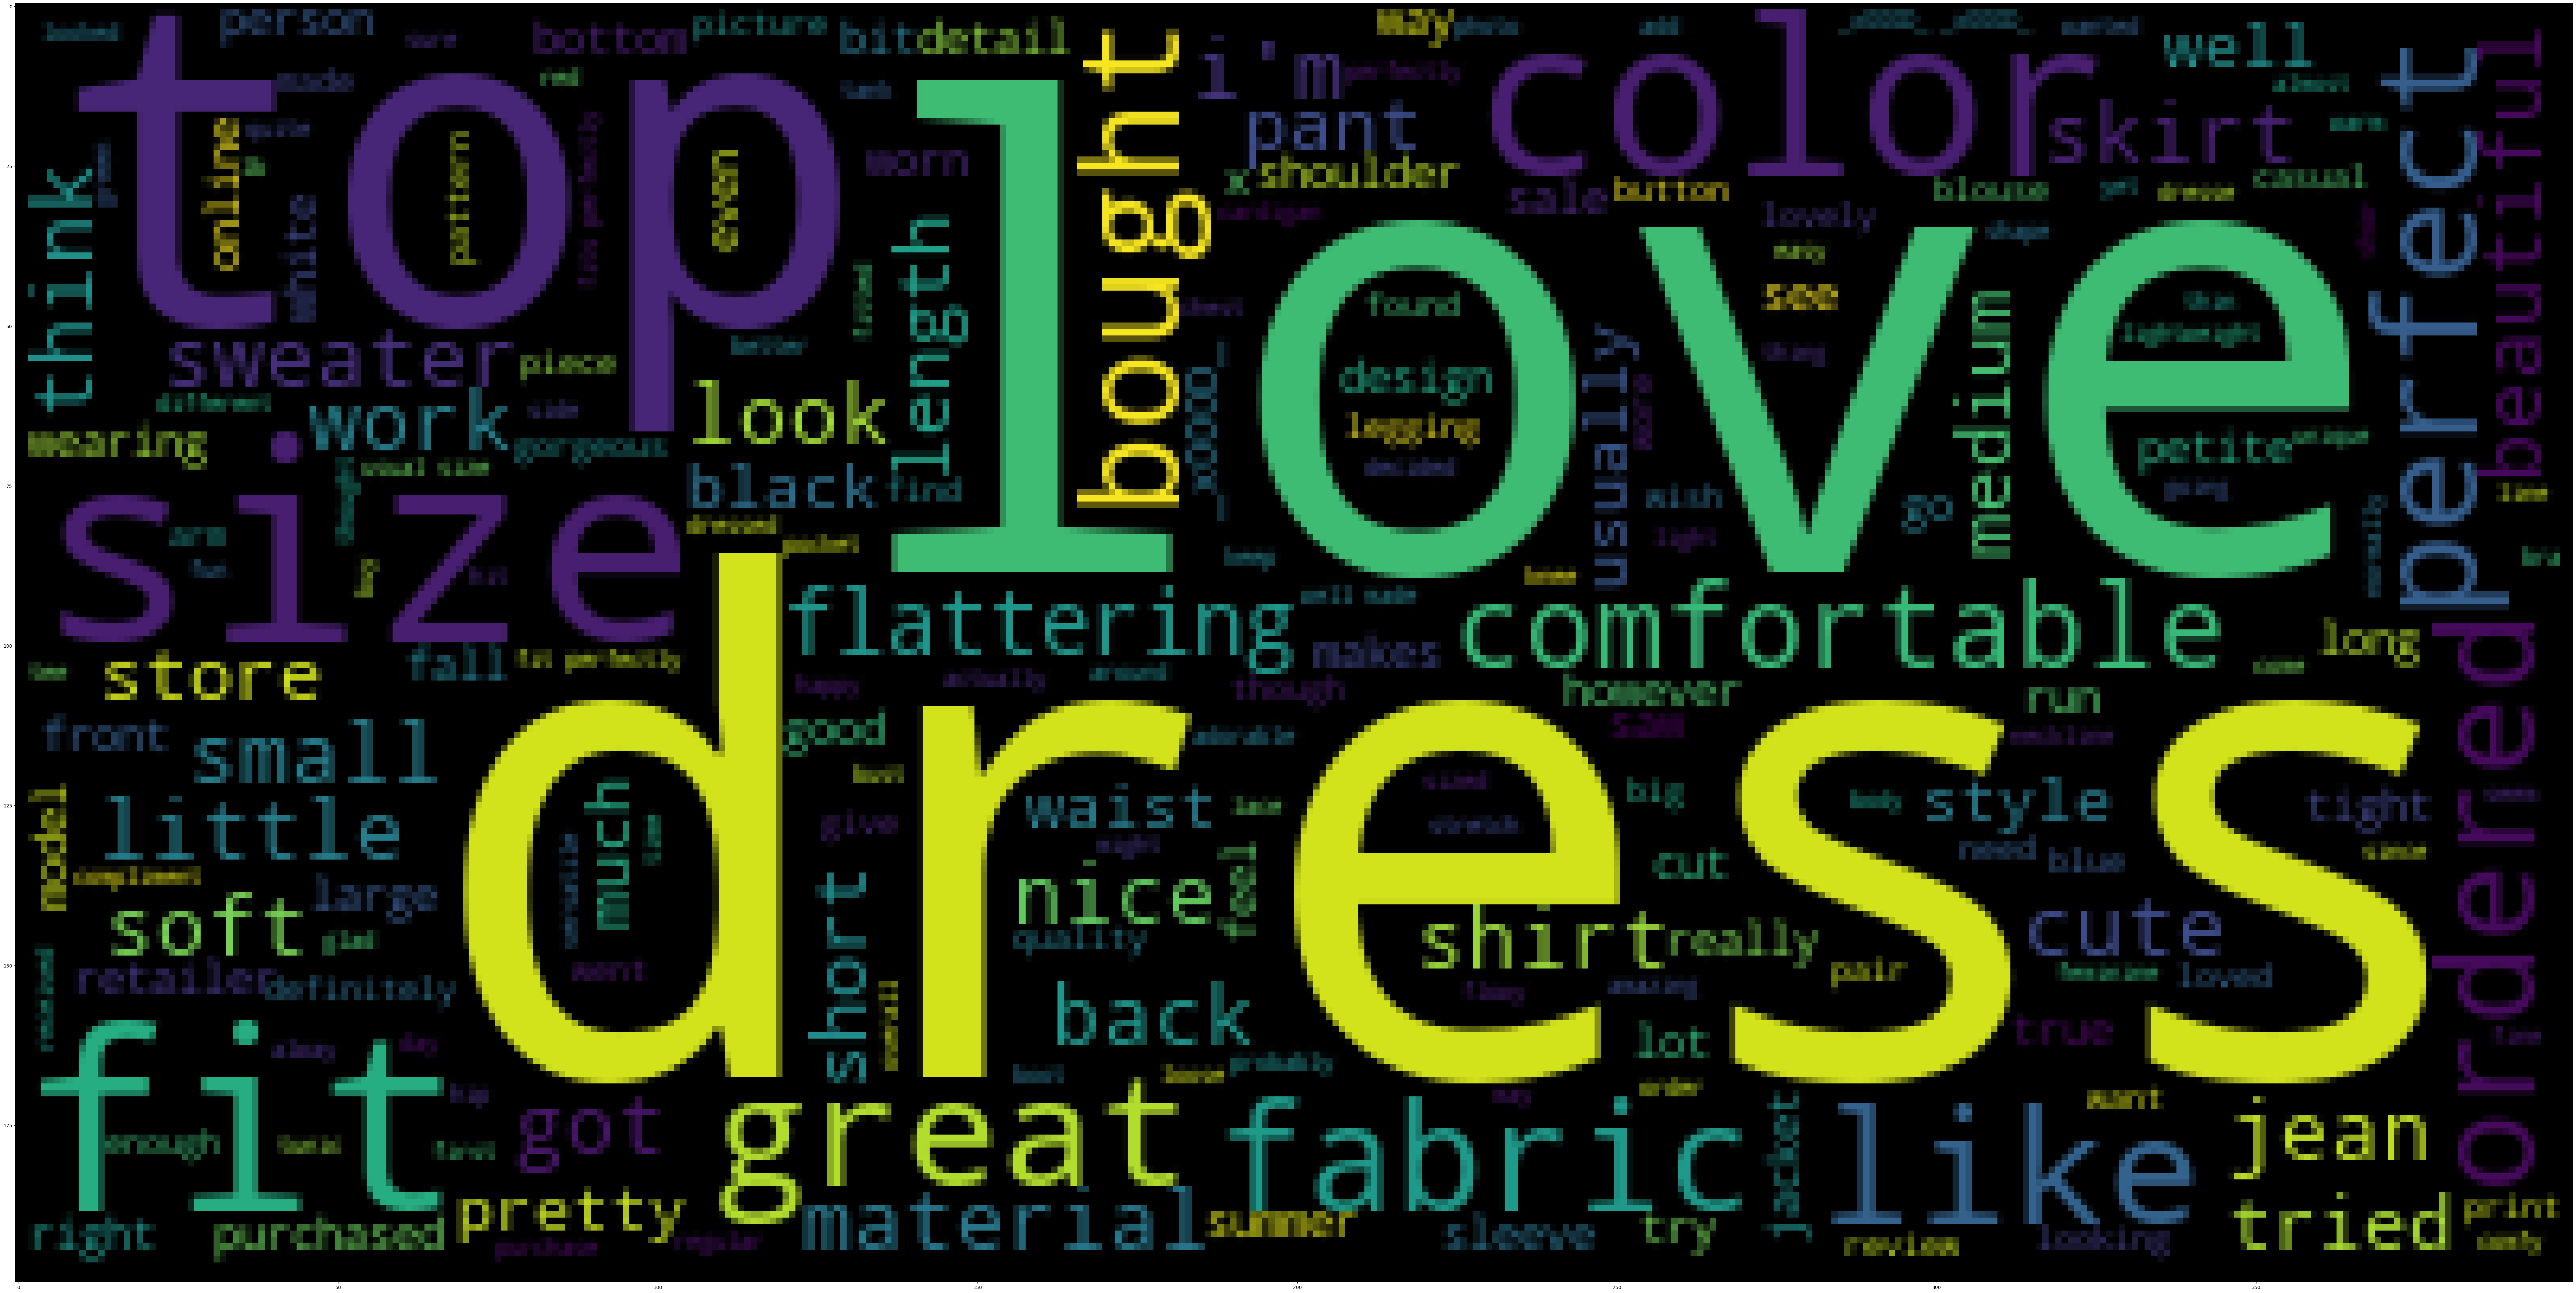

In [45]:
#Wordcloud for Positive Reviews
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Positive_review.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

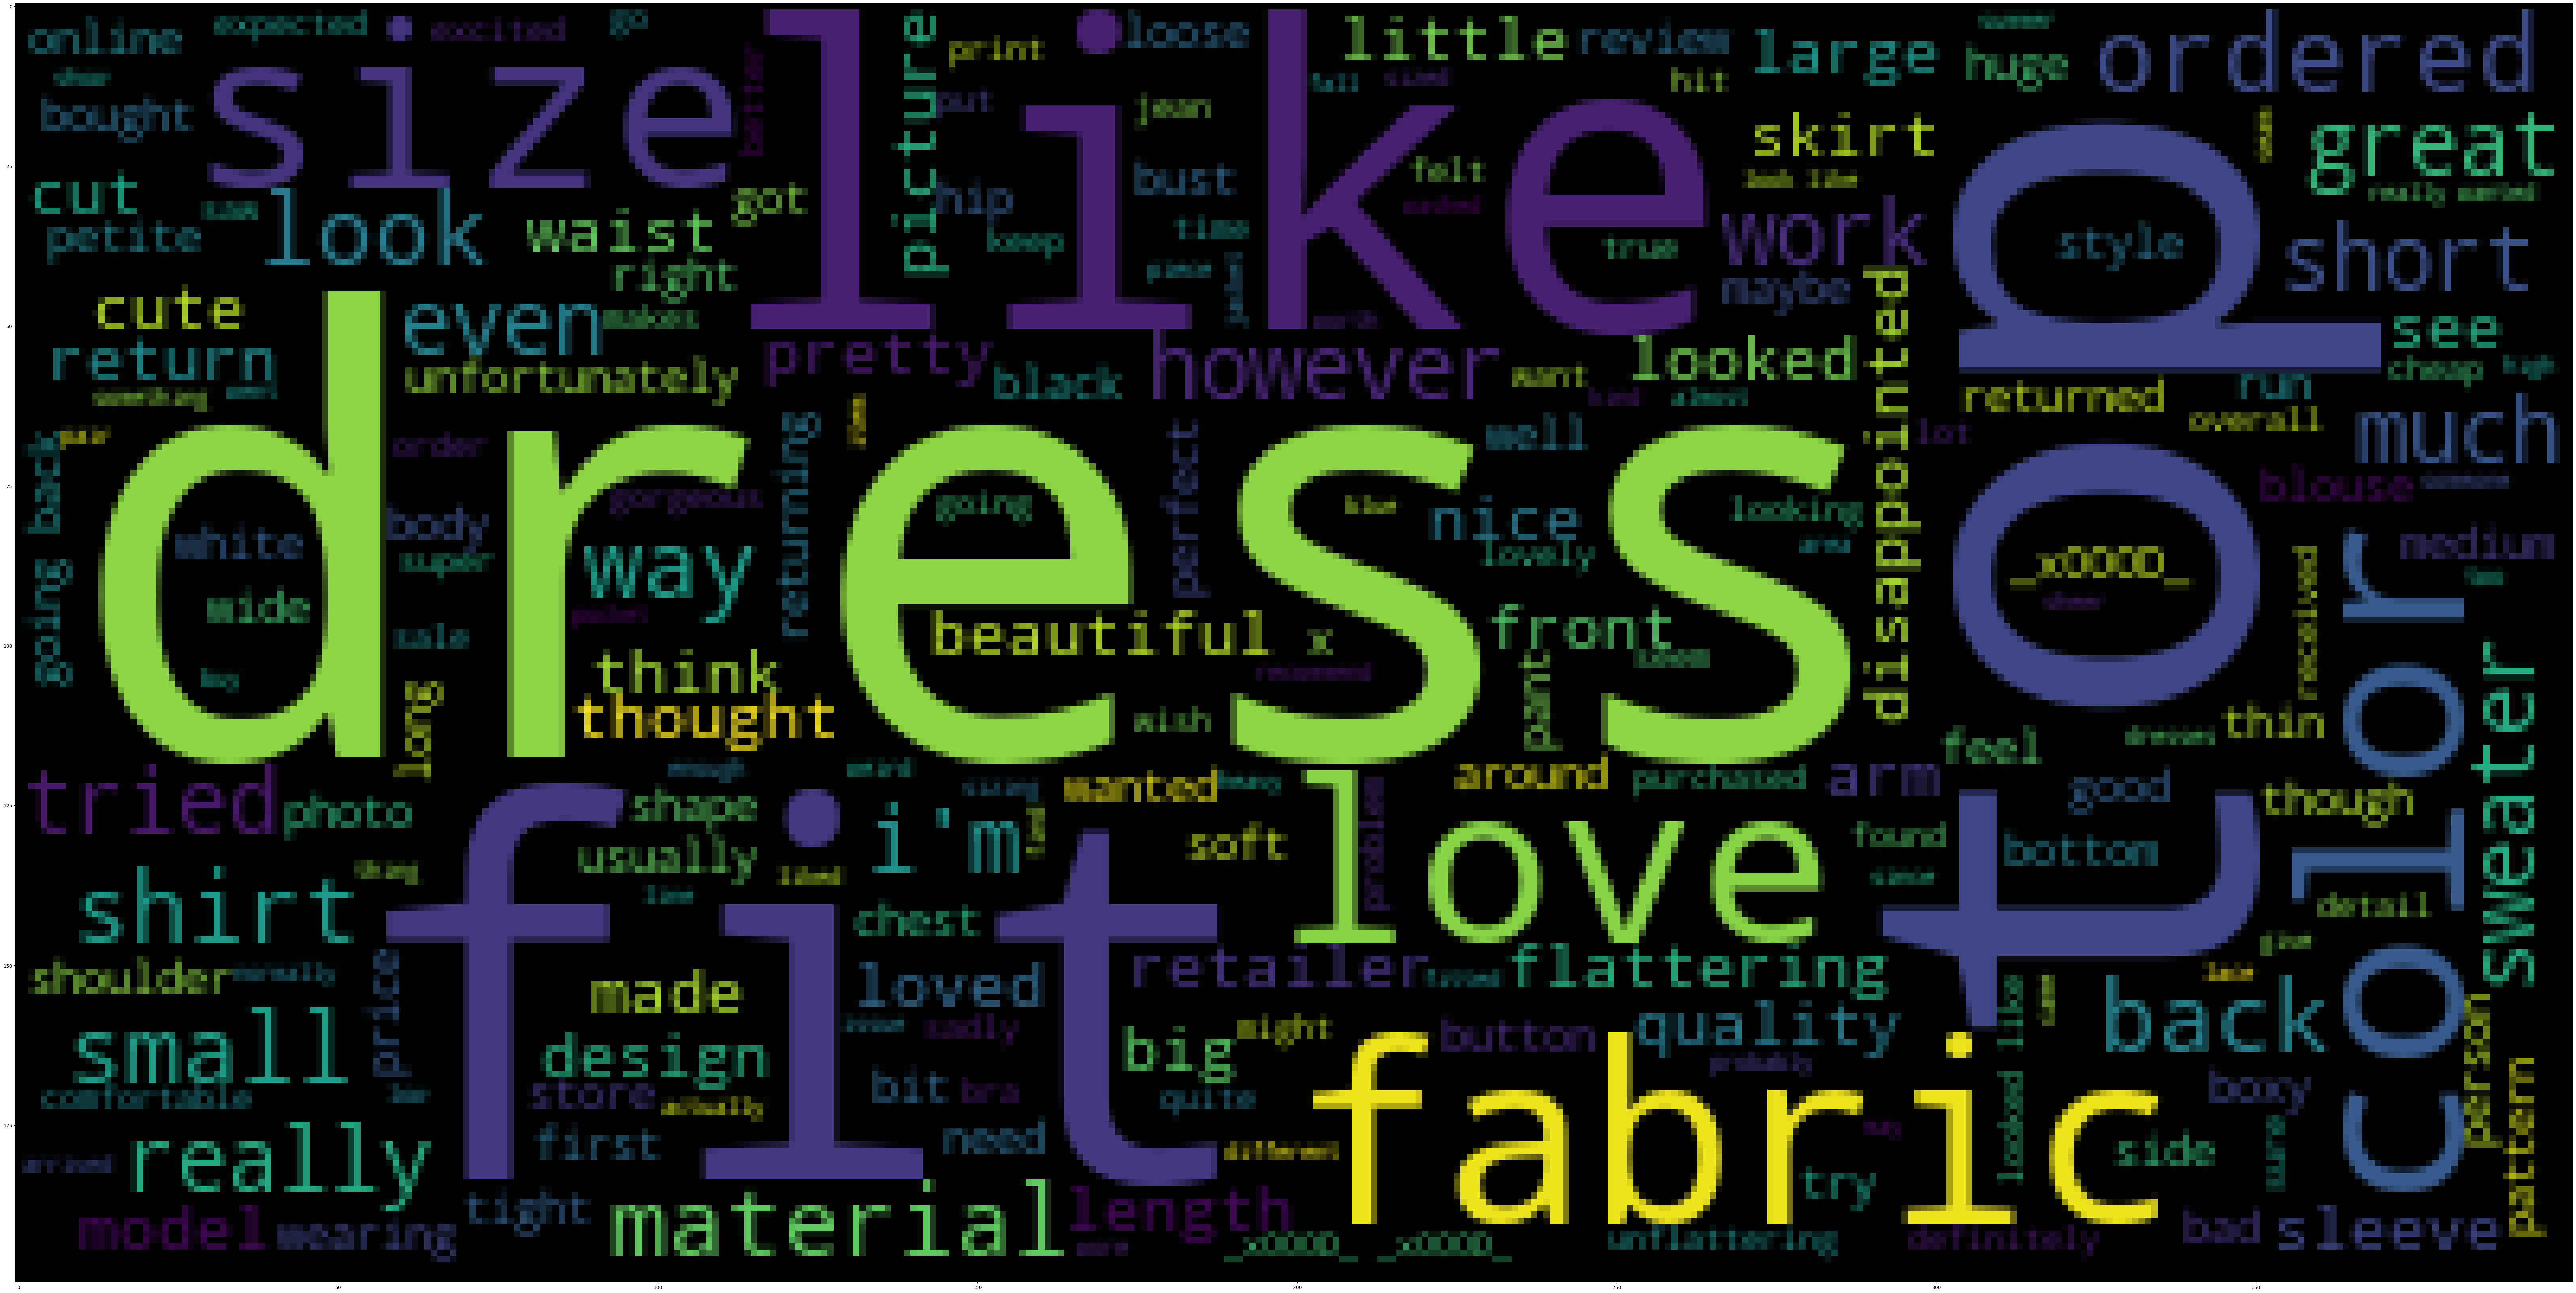

In [46]:
#Wordcloud for Negative Reviews
wordcloud = WordCloud(stopwords=stop).generate(' '.join(Negative_review.tolist()))
%matplotlib inline
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

In [47]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), preprocessor=clean_text,
                             stop_words=stop,
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Positive_review_count = count_vect.fit_transform(Positive_review)
Positive_review_dtm=pd.DataFrame(Positive_review_count.todense(), columns = count_vect.get_feature_names())

In [48]:
Positive_review_dtm.head()

able  absolutely  absolutely beautiful  absolutely love  across  actually  \
0     0           1                     0                0       0         0   
1     0           0                     0                0       0         0   
2     0           0                     0                0       0         0   
3     0           0                     0                0       0         0   
4     0           0                     0                0       0         0   

   add  added  adjustable  adorable  ...  wouldnt  wrinkle  wrong  x  xl  xx  \
0    0      0           0         0  ...        0        0      0  0   0   0   
1    0      0           0         0  ...        0        0      0  0   0   0   
2    0      0           0         0  ...        0        0      0  0   0   0   
3    0      0           1         0  ...        0        0      0  0   0   0   
4    0      0           0         0  ...        0        0      0  0   0   0   

   yellow  yes  yet  zipper  
0       0    0    0       0  
1       0    0    0       0  
2       0    0    0       0  
3       0    0    0       0  
4       0    0    0       0  

[5 rows x 800 columns]

In [49]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 2 ), preprocessor=clean_text,
                             stop_words=stop,
                             min_df=1, 
                             encoding='latin-1' ,
                             max_features=800)
Negative_review_count = count_vect.fit_transform(Negative_review)
Negative_review_dtm=pd.DataFrame(Negative_review_count.todense(), columns = count_vect.get_feature_names())

In [50]:
Negative_review_dtm.head()

able  absolutely  absolutely beautiful  according  across  across chest  \
0     0           0                     0          0       0             0   
1     0           0                     0          0       0             0   
2     0           0                     0          0       0             0   
3     0           0                     0          0       0             0   
4     0           0                     0          0       0             0   

   actual  actually  add  added  ...  wrinkle  wrinkled  wrong  x  xl  yellow  \
0       0         0    0      0  ...        0         0      0  0   0       0   
1       0         0    0      0  ...        0         0      0  0   0       0   
2       0         0    0      0  ...        0         0      0  0   0       0   
3       0         0    0      0  ...        0         0      0  0   0       0   
4       0         0    0      0  ...        0         0      0  0   0       0   

   yes  yet  zipped  zipper  
0    0    0       0       1  
1    0    0       0       0  
2    0    0       0       1  
3    0    0       0       0  
4    0    0       0       0  

[5 rows x 800 columns]

In [51]:
#Finding the word frequencies in Positive Reviews
word_freq = pd.DataFrame(Positive_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq

freq
absolutely             691
actually               540
adorable               432
add                    430
able                   347
absolutely love        297
across                 227
added                  124
absolutely beautiful    75
adjustable              72

<AxesSubplot:xlabel='ngrams', ylabel='Frequency'>

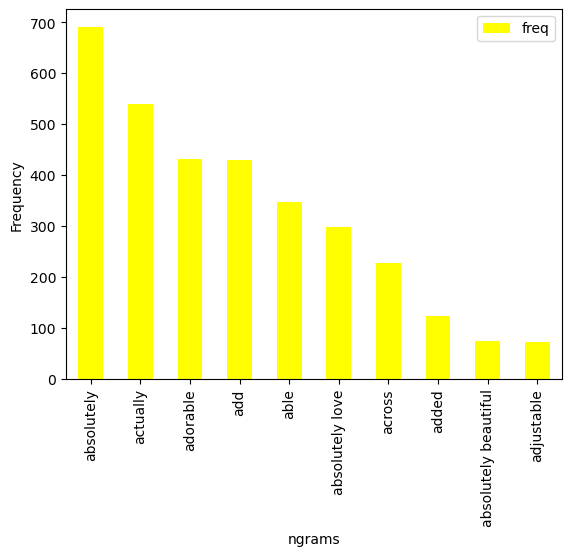

In [52]:
#Plotting the word frequencies in Positive Reviews using barchart
word_freq.plot(kind='bar', color='Yellow',xlabel='ngrams',ylabel='Frequency')

In [53]:
#Finding the word frequencies in Negative Reviews
word_freq = pd.DataFrame(Negative_review_dtm.apply(sum).head(10), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)
word_freq

freq
actually               144
absolutely             119
across                 111
able                    76
added                   48
add                     30
actual                  28
across chest            25
absolutely beautiful    21
according               18

<AxesSubplot:xlabel='ngrams', ylabel='Frequency'>

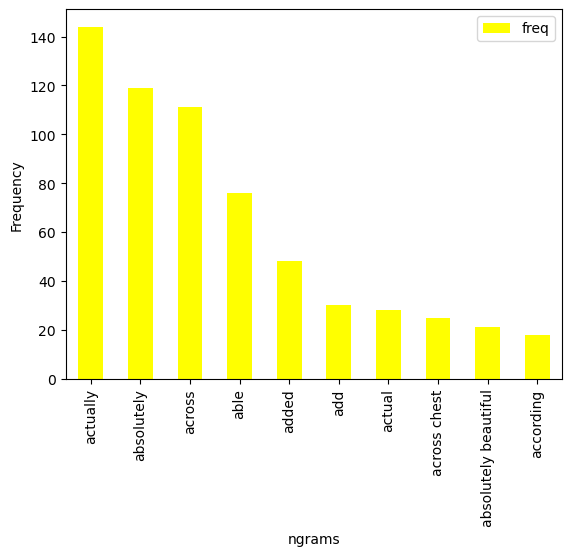

In [54]:
#Plotting the word frequencies in Negative Reviews using barchart
word_freq.plot(kind='bar', color='Yellow',xlabel='ngrams',ylabel='Frequency')

In [55]:
#Dictionary of Positive Reviews
word_freq_dictionary = dict(Positive_review_dtm.apply(sum))
word_freq_dictionary

{'able': 347,
 'absolutely': 691,
 'absolutely beautiful': 75,
 'absolutely love': 297,
 'across': 227,
 'actually': 540,
 'add': 430,
 'added': 124,
 'adjustable': 72,
 'adorable': 432,
 'adore': 97,
 'afraid': 77,
 'ag': 59,
 'ago': 117,
 'agree': 239,
 'almost': 502,
 'alone': 76,
 'along': 122,
 'already': 262,
 'altered': 58,
 'although': 314,
 'always': 514,
 'amazing': 404,
 'ankle': 158,
 'another': 575,
 'anyway': 139,
 'appears': 136,
 'appropriate': 135,
 'arm': 151,
 'armhole': 96,
 'around': 788,
 'arrived': 199,
 'athletic': 167,
 'attractive': 73,
 'available': 232,
 'away': 230,
 'awesome': 167,
 'awkward': 60,
 'back': 1961,
 'bad': 154,
 'baggy': 134,
 'barely': 79,
 'based': 210,
 'basic': 192,
 'beading': 78,
 'beautiful': 1885,
 'beautiful top': 60,
 'beautifully': 396,
 'become': 56,
 'believe': 96,
 'belly': 115,
 'belt': 125,
 'best': 426,
 'better': 864,
 'big': 1253,
 'bigger': 194,
 'bit': 585,
 'bit large': 95,
 'black': 1478,
 'black white': 105,
 'blouse':

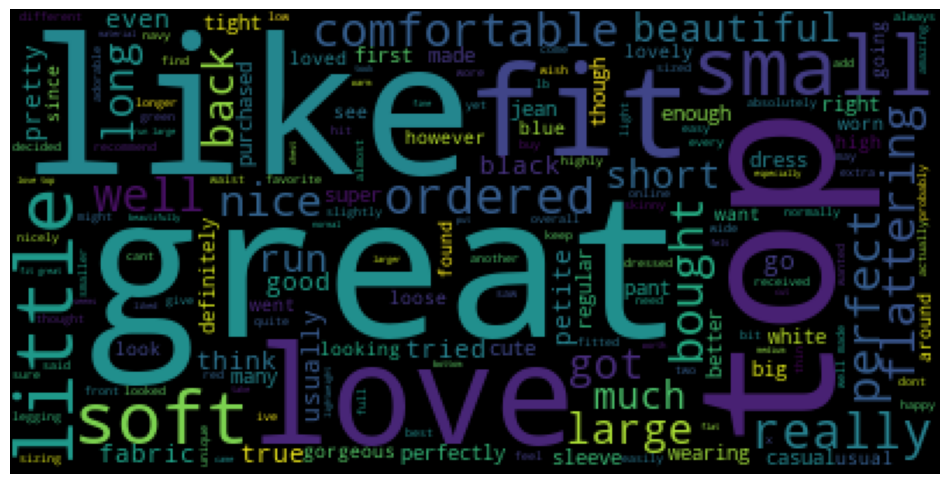

In [56]:
#Creating Wordcloud from the dictionary
wordcloud = WordCloud(background_color='black', stopwords=stop)
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [57]:
#Dictionary of Negative Reviews
word_freq_dictionary = dict(Negative_review_dtm.apply(sum))
word_freq_dictionary

{'able': 76,
 'absolutely': 119,
 'absolutely beautiful': 21,
 'according': 18,
 'across': 111,
 'across chest': 25,
 'actual': 28,
 'actually': 144,
 'add': 30,
 'added': 48,
 'adorable': 107,
 'afraid': 21,
 'ago': 21,
 'agree': 85,
 'agree reviewer': 24,
 'aline': 18,
 'almost': 175,
 'almost like': 26,
 'along': 46,
 'already': 112,
 'although': 107,
 'always': 72,
 'amazing': 43,
 'ankle': 22,
 'another': 177,
 'anyway': 36,
 'anywhere': 20,
 'apart': 48,
 'appear': 38,
 'appeared': 21,
 'appears': 66,
 'appropriate': 30,
 'arm': 82,
 'armhole': 56,
 'around': 329,
 'around waist': 23,
 'arrived': 158,
 'athletic': 50,
 'attached': 38,
 'attractive': 27,
 'available': 43,
 'average': 37,
 'away': 98,
 'awesome': 24,
 'awful': 71,
 'awkward': 83,
 'awkwardly': 23,
 'back': 1198,
 'back go': 38,
 'back went': 20,
 'bad': 231,
 'badly': 34,
 'baggy': 48,
 'barely': 89,
 'based': 79,
 'basic': 31,
 'basically': 37,
 'beautiful': 508,
 'beautiful fabric': 18,
 'beautiful however': 31,


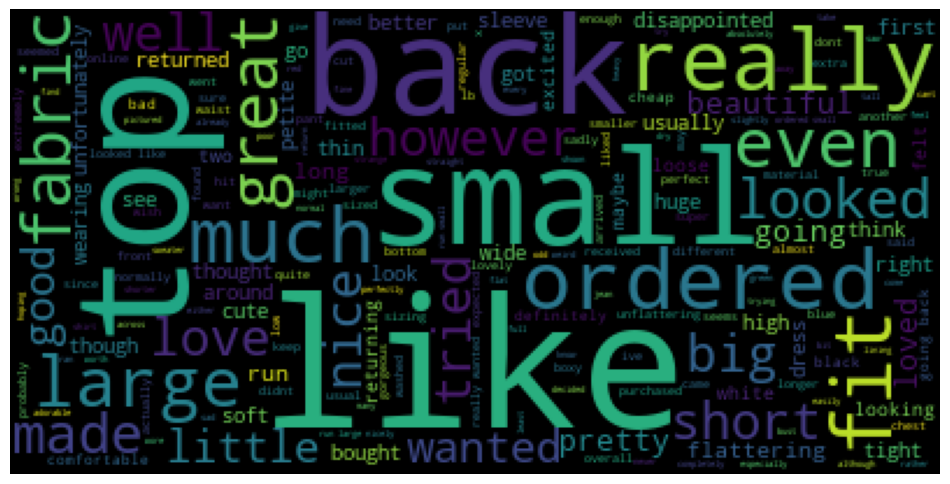

In [58]:
#Creating Wordcloud of Negative Reviews from dictionary
wordcloud = WordCloud(background_color='black', stopwords=stop)
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [59]:
#Checking Word-to-Word Similarity within Positive_review_dtm
corr = Positive_review_dtm.corrwith(Positive_review_dtm.able)
corr.sort_values(ascending=False)

able       1.000000
never      0.049524
pull       0.049398
sold       0.045200
finally    0.044845
             ...   
red       -0.012806
touch     -0.012849
next      -0.013443
boxy      -0.013535
soft      -0.016215
Length: 800, dtype: float64

In [60]:
#Checking Word-to-Word Similarity within Negative_review_dtm
corr = Negative_review_dtm.corrwith(Negative_review_dtm.able)
corr.sort_values(ascending=False)

able          1.000000
hole          0.079880
exactly       0.062882
button        0.055939
nude          0.054548
                ...   
like         -0.023060
big          -0.024335
flattering   -0.024862
wide         -0.027102
made         -0.028096
Length: 800, dtype: float64

In [61]:
#Analysing doc-to-doc similarity within Positive Reviews
corr_doc=Positive_review_dtm.T.corrwith(Positive_review_dtm.T[0])
corr_doc.sort_values(ascending=False)

0        1.000000
2902     0.706220
10208    0.610835
1199     0.575538
10499    0.499060
           ...   
13618         NaN
13750         NaN
14078         NaN
14995         NaN
15613         NaN
Length: 17448, dtype: float64

In [62]:
#Analysing doc-to-doc similarity within Negative Reviews
corr_doc=Negative_review_dtm.T.corrwith(Negative_review_dtm.T[0])
corr_doc.sort_values(ascending=False)

0       1.000000
4923    0.501347
1097    0.450077
2779    0.432906
2923    0.422335
          ...   
1202         NaN
2796         NaN
3273         NaN
3481         NaN
4077         NaN
Length: 5193, dtype: float64

## Sentiment Analysis on different factors

In [63]:
rev_new.drop(columns=['ProductID','ReviewText','Rating'],inplace=True)

In [64]:
#Creating table for sentiment analysis on different variables
rev_merged=pd.concat([rev_new,rev_final],axis=1)

In [65]:
rev_merged.shape

(22641, 32)

In [66]:
rev_merged.head(2)

Category Subcategory1 SubCategory2   Location Channel  CustomerAge  \
0  Initmates     Intimate    Intimates     Mumbai  Mobile           33   
1    General      Dresses      Dresses  Bangalore  Mobile           34   

  ReviewTitle  RecommendFlag  ProductID  \
0         NaN              1        767   
1         NaN              1       1080   

                                          ReviewText  ...  numeric  \
0  Absolutely wonderful - silky and sexy and comf...  ...        0   
1  Love this dress!  it's sooo pretty.  i happene...  ...        0   

   alphanumeric  alphabets  Spaces  words_ends_with_et  words_start_with_no  \
0             7          7       0                   0                    0   
1            51         51       0                   0                    0   

                                          wordcounts  \
0  {'sexy': 1, 'Absolutely': 1, '-': 1, 'and': 2,...   
1  {'did': 1, 'ordered': 1, 'hits': 1, 'and': 2, ...   

                                        cleaned_text  sentiment_score  \
0             absolutely wonderful silky comfortable         0.700000   
1  love pretty happened find never ordered online...         0.228125   

   sentiment  
0   Positive  
1   Positive  

[2 rows x 32 columns]

In [67]:
rev_merged.CustomerAge.quantile(q=[0.25,0.50,0.75])

0.25    34.0
0.50    41.0
0.75    52.0
Name: CustomerAge, dtype: float64

In [68]:
rev_merged['Age_Group']=np.where(rev_merged.CustomerAge<=34.0,'Young',np.where(rev_merged.CustomerAge<=41.0,'Adult_1',np.where(rev_merged.CustomerAge<=52.0,'Adult_2','Senior')))
rev_merged.head()

Category Subcategory1 SubCategory2   Location Channel  CustomerAge  \
0       Initmates     Intimate    Intimates     Mumbai  Mobile           33   
1         General      Dresses      Dresses  Bangalore  Mobile           34   
2         General      Dresses      Dresses    Gurgaon  Mobile           60   
3  General Petite      Bottoms        Pants    Chennai     Web           50   
4         General         Tops      Blouses  Bangalore     Web           47   

               ReviewTitle  RecommendFlag  ProductID  \
0                      NaN              1        767   
1                      NaN              1       1080   
2  Some major design flaws              0       1077   
3         My favorite buy!              1       1049   
4         Flattering shirt              1        847   

                                          ReviewText  ...  alphanumeric  \
0  Absolutely wonderful - silky and sexy and comf...  ...             7   
1  Love this dress!  it's sooo pretty.  i happene...  ...            51   
2  I had such high hopes for this dress and reall...  ...            85   
3  I love, love, love this jumpsuit. it's fun, fl...  ...            13   
4  This shirt is very flattering to all due to th...  ...            33   

   alphabets  Spaces  words_ends_with_et  words_start_with_no  \
0          7       0                   0                    0   
1         51       0                   0                    0   
2         85       0                   1                    1   
3         13       0                   1                    1   
4         33       0                   0                    0   

                                          wordcounts  \
0  {'sexy': 1, 'Absolutely': 1, '-': 1, 'and': 2,...   
1  {'did': 1, 'ordered': 1, 'hits': 1, 'and': 2, ...   
2  {'ordered': 1, 'I': 1, 'nicely,': 1, 'several'...   
3  {'nothing': 1, 'I': 1, 'fun,': 1, 'and': 1, 'i...   
4  {'any': 1, 'all': 1, 'and': 1, 'This': 1, 'thi...   

                                        cleaned_text  sentiment_score  \
0             absolutely wonderful silky comfortable         0.700000   
1  love pretty happened find never ordered online...         0.228125   
2  high really wanted initially ordered petite sm...         0.112838   
3                   love flirty fabulous every great         0.566667   
4  flattering due adjustable perfect legging slee...         0.458333   

   sentiment  Age_Group  
0   Positive      Young  
1   Positive      Young  
2    Neutral     Senior  
3   Positive    Adult_2  
4   Positive    Adult_2  

[5 rows x 33 columns]

In [69]:
# Analysing sentiment score category-wise for each location
rev_merged.groupby(['Location','Category'])[['sentiment_score']].mean()

sentiment_score
Location  Category                       
Bangalore General                0.235988
          General Petite         0.234177
          Initmates              0.235188
Chennai   General                0.238314
          General Petite         0.235173
          Initmates              0.240963
Gurgaon   General                0.240712
          General Petite         0.248490
          Initmates              0.250870
Mumbai    General                0.235681
          General Petite         0.247470
          Initmates              0.241258

The sentiment score is fairly positive for all three categories irrespective of location.

In [70]:
# Analysing sentiment score category-wise for each age group
rev_merged.groupby(['Age_Group','Category'])[['sentiment_score']].mean()

sentiment_score
Age_Group Category                       
Adult_1   General                0.236267
          General Petite         0.240725
          Initmates              0.253538
Adult_2   General                0.233892
          General Petite         0.236940
          Initmates              0.250145
Senior    General                0.243129
          General Petite         0.253635
          Initmates              0.227301
Young     General                0.238551
          General Petite         0.244323
          Initmates              0.240401

The sentiment score is fairly positive for all three categories irrespective of age groups

In [71]:
# Analysing sentiment score subcategory-wise for each age group
rev_merged.groupby(['Age_Group','Subcategory1','SubCategory2'])[['sentiment_score']].mean()

sentiment_score
Age_Group Subcategory1 SubCategory2                 
Adult_1   Bottoms      Jeans                0.242489
                       Pants                0.228106
                       Shorts               0.218277
                       Skirts               0.254523
          Dresses      Dresses              0.239055
...                                              ...
Young     Tops         Blouses              0.236738
                       Fine gauge           0.234085
                       Knits                0.239441
                       Sweaters             0.232645
          Trend        Trend                0.096425

[74 rows x 1 columns]

The sentiment score is fairly positive for all sub_categories irrespective of age groups.

In [72]:
# Analysing sentiment score subcategory-wise for each location
rev_merged.groupby(['Location','Subcategory1','SubCategory2'])[['sentiment_score']].mean()

sentiment_score
Location  Subcategory1 SubCategory2                 
Bangalore Bottoms      Jeans                0.215664
                       Pants                0.232517
                       Shorts               0.184177
                       Skirts               0.236902
          Dresses      Dresses              0.244326
...                                              ...
Mumbai    Tops         Blouses              0.234732
                       Fine gauge           0.245285
                       Knits                0.233816
                       Sweaters             0.230418
          Trend        Trend                0.207375

[74 rows x 1 columns]

The sentiment score is fairly positive for all sub_categories irrespective of location.

## Classification Model to understand the drivers of Customers 

## Classification Model on non_text data

In [73]:
#Table for Calssification Model
rev_cls=rev_merged[['ProductID','Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Age_Group', 'Rating',
       'RecommendFlag']]

In [74]:
rev_cls.head()

ProductID        Category Subcategory1 SubCategory2   Location Channel  \
0        767       Initmates     Intimate    Intimates     Mumbai  Mobile   
1       1080         General      Dresses      Dresses  Bangalore  Mobile   
2       1077         General      Dresses      Dresses    Gurgaon  Mobile   
3       1049  General Petite      Bottoms        Pants    Chennai     Web   
4        847         General         Tops      Blouses  Bangalore     Web   

  Age_Group  Rating  RecommendFlag  
0     Young       4              1  
1     Young       5              1  
2    Senior       3              0  
3   Adult_2       5              1  
4   Adult_2       5              1

In [75]:
rev_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductID      22641 non-null  int64 
 1   Category       22628 non-null  object
 2   Subcategory1   22628 non-null  object
 3   SubCategory2   22628 non-null  object
 4   Location       22641 non-null  object
 5   Channel        22641 non-null  object
 6   Age_Group      22641 non-null  object
 7   Rating         22641 non-null  int64 
 8   RecommendFlag  22641 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [76]:
rev_cls.isnull().sum()

ProductID         0
Category         13
Subcategory1     13
SubCategory2     13
Location          0
Channel           0
Age_Group         0
Rating            0
RecommendFlag     0
dtype: int64

In [77]:
#Creating dtale report
#dt=dtale.show(rev_cls)
#dt.open_browser()

## EDA

In [78]:
#Distribution of target variable
rev_cls[['RecommendFlag']].value_counts()

RecommendFlag
1                18540
0                 4101
dtype: int64

In [79]:
rev_cls[['RecommendFlag']].value_counts()/rev_cls[['RecommendFlag']].value_counts().sum()

RecommendFlag
1                0.818868
0                0.181132
dtype: float64

<AxesSubplot:xlabel='RecommendFlag', ylabel='count'>

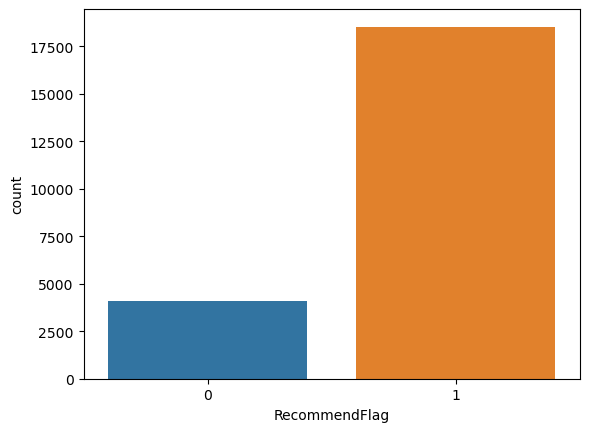

In [80]:
#Visualising the distribution of target variable
sns.countplot(rev_cls['RecommendFlag'])

In [81]:
#Missing value treatment
def missing_treat(x):
    if x.dtype=='object':
        x=x.fillna(x.mode()[0])
    return(x)

In [82]:
rev_cls=rev_cls.apply(missing_treat)

In [83]:
#Dummy creation for categories
rev_cls=pd.get_dummies(data=rev_cls,columns=['Category','Subcategory1','SubCategory2','Location','Channel'],drop_first=True)

In [84]:
#Label Encoding of Age_Group variable
encode=LabelEncoder()
rev_cls.Age_Group=encode.fit_transform(rev_cls.Age_Group)

In [85]:
#Processing of column names after encoding
rev_cls.columns=rev_cls.columns.str.replace(' ','')

In [86]:
rev_cls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ProductID                   22641 non-null  int64
 1   Age_Group                   22641 non-null  int32
 2   Rating                      22641 non-null  int64
 3   RecommendFlag               22641 non-null  int64
 4   Category_GeneralPetite      22641 non-null  uint8
 5   Category_Initmates          22641 non-null  uint8
 6   Subcategory1_Dresses        22641 non-null  uint8
 7   Subcategory1_Intimate       22641 non-null  uint8
 8   Subcategory1_Jackets        22641 non-null  uint8
 9   Subcategory1_Tops           22641 non-null  uint8
 10  Subcategory1_Trend          22641 non-null  uint8
 11  SubCategory2_Casualbottoms  22641 non-null  uint8
 12  SubCategory2_Chemises       22641 non-null  uint8
 13  SubCategory2_Dresses        22641 non-null  uint8
 14  SubCat

In [87]:
#Splitting dataset into X and y
y=rev_cls.RecommendFlag
X=rev_cls[rev_cls.columns.difference(['RecommendFlag'])]
X
y

0        1
1        1
2        0
3        1
4        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: RecommendFlag, Length: 22641, dtype: int64

In [88]:
#Checking for low variance
def cv(x):
    return (x.std()/x.mean())
X.apply(cv).sort_values()

ProductID                       0.220015
Rating                          0.266702
Age_Group                       0.748780
Channel_Web                     0.853745
Subcategory1_Tops               1.118225
Location_Gurgaon                1.290947
Category_GeneralPetite          1.374435
Location_Mumbai                 1.516911
SubCategory2_Dresses            1.636093
Subcategory1_Dresses            1.638468
SubCategory2_Knits              1.973440
Location_Chennai                3.017198
Subcategory1_Intimate           3.563352
Category_Initmates              3.857193
SubCategory2_Sweaters           3.925201
SubCategory2_Pants              3.971374
SubCategory2_Jeans              4.416901
SubCategory2_Finegauge          4.514477
Subcategory1_Jackets            4.647232
SubCategory2_Skirts             4.906542
SubCategory2_Jackets            5.670164
SubCategory2_Lounge             5.731012
SubCategory2_Swim               8.197484
SubCategory2_Outerwear          8.365286
SubCategory2_Sho

In [89]:
#Dropping columns with low variance
rev_cls.drop(columns=['ProductID','Rating','Age_Group','Channel_Web'],inplace=True)
X.drop(columns=['ProductID','Rating','Age_Group','Channel_Web'],inplace=True)

In [90]:
X


Category_GeneralPetite  Category_Initmates  Location_Chennai  \
0                           0                   1                 0   
1                           0                   0                 0   
2                           0                   0                 0   
3                           1                   0                 1   
4                           0                   0                 0   
...                       ...                 ...               ...   
23481                       1                   0                 0   
23482                       1                   0                 0   
23483                       1                   0                 0   
23484                       0                   0                 0   
23485                       1                   0                 1   

       Location_Gurgaon  Location_Mumbai  SubCategory2_Casualbottoms  \
0                     0                1                           0   
1                     0                0                           0   
2                     1                0                           0   
3                     0                0                           0   
4                     0                0                           0   
...                 ...              ...                         ...   
23481                 1                0                           0   
23482                 1                0                           0   
23483                 1                0                           0   
23484                 1                0                           0   
23485                 0                0                           0   

       SubCategory2_Chemises  SubCategory2_Dresses  SubCategory2_Finegauge  \
0                          0                     0                       0   
1                          0                     1                       0   
2                          0                     1                       0   
3                          0                     0                       0   
4                          0                     0                       0   
...                      ...                   ...                     ...   
23481                      0                     1                       0   
23482                      0                     0                       0   
23483                      0                     1                       0   
23484                      0                     1                       0   
23485                      0                     1                       0   

       SubCategory2_Intimates  ...  SubCategory2_Skirts  SubCategory2_Sleep  \
0                           1  ...                    0                   0   
1                           0  ...                    0                   0   
2                           0  ...                    0                   0   
3                           0  ...                    0                   0   
4                           0  ...                    0                   0   
...                       ...  ...                  ...                 ...   
23481                       0  ...                    0                   0   
23482                       0  ...                    0                   0   
23483                       0  ...                    0                   0   
23484                       0  ...                    0                   0   
23485                       0  ...                    0                   0   

       SubCategory2_Sweaters  SubCategory2_Swim  SubCategory2_Trend  \
0                          0                  0                   0   
1                          0                  0                   0   
2                          0                  0                   0   
3                          0                  0                   0   
4                          0                  0 

In [91]:
#Balancing the data
sm = over_sampling.SMOTE(random_state=123)
X, y = sm.fit_resample(X,y)

## Feature Selection

In [92]:
#### Univariate Regression
somerced_val = pd.DataFrame()
for i_var in X.columns:
    print(i_var)
    model = smf.logit('RecommendFlag~'+str(i_var), data=rev_cls).fit()
    somerce_d = 2*metrics.roc_auc_score(rev_cls.RecommendFlag, model.predict())-1
    temp = pd.DataFrame([i_var, somerce_d]).T
    somerced_val = pd.concat([somerced_val,temp], axis=0)
  

Category_GeneralPetite
Optimization terminated successfully.
         Current function value: 0.473081
         Iterations 5
Category_Initmates
Optimization terminated successfully.
         Current function value: 0.472907
         Iterations 6
Location_Chennai
Optimization terminated successfully.
         Current function value: 0.473096
         Iterations 5
Location_Gurgaon
Optimization terminated successfully.
         Current function value: 0.473096
         Iterations 5
Location_Mumbai
Optimization terminated successfully.
         Current function value: 0.473104
         Iterations 5
SubCategory2_Casualbottoms
         Current function value: 0.473096
         Iterations: 35
SubCategory2_Chemises
         Current function value: 0.473096
         Iterations: 35
SubCategory2_Dresses
Optimization terminated successfully.
         Current function value: 0.472886
         Iterations 5
SubCategory2_Finegauge
Optimization terminated successfully.
         Current function value: 

In [93]:
somerced_val.columns=['feature','somerce_d']

In [94]:
#Taking 15 important features on somerce_d values
imp_vars_df=somerced_val.sort_values(by='somerce_d',ascending=False).head(1000)
imp_vars_df

feature somerce_d
0        Subcategory1_Dresses  0.024998
0        SubCategory2_Dresses  0.024296
0           Subcategory1_Tops  0.023714
0          SubCategory2_Jeans  0.019942
0       Subcategory1_Intimate  0.013522
0          Category_Initmates  0.012296
0          SubCategory2_Knits  0.008959
0       SubCategory2_Sweaters  0.008945
0      Category_GeneralPetite  0.008495
0         SubCategory2_Lounge  0.007795
0         SubCategory2_Skirts  0.006123
0          SubCategory2_Pants  0.005517
0            Location_Gurgaon  0.005364
0        SubCategory2_Jackets  0.004977
0      SubCategory2_Finegauge  0.004413
0        Subcategory1_Jackets  0.004316
0            Location_Chennai  0.003251
0          SubCategory2_Trend  0.002569
0          Subcategory1_Trend  0.002569
0       SubCategory2_Layering  0.002355
0           SubCategory2_Swim  0.002342
0          SubCategory2_Sleep  0.002311
0         SubCategory2_Shorts  0.001806
0      SubCategory2_Intimates  0.001675
0        SubCategory2_Legwear  0.001673
0             Location_Mumbai  0.001602
0      SubCategory2_Outerwear  0.000661
0       SubCategory2_Chemises  0.000054
0  SubCategory2_Casualbottoms  0.000054

In [95]:
#List of important features
imp_vars_somerce=list(imp_vars_df.feature)

In [96]:
#### RFE
classifier = RandomForestClassifier()
rfe = RFE(estimator=classifier,n_features_to_select=10,step=1)
rfe = rfe.fit(X,y)

In [97]:
#List of important features from RFE
imp_vars_RFE = list(X.columns[rfe.support_])

In [98]:
imp_vars_RFE 

['Category_GeneralPetite',
 'Category_Initmates',
 'Location_Chennai',
 'Location_Gurgaon',
 'Location_Mumbai',
 'SubCategory2_Dresses',
 'SubCategory2_Finegauge',
 'SubCategory2_Jeans',
 'SubCategory2_Swim',
 'Subcategory1_Tops']

In [99]:
#Select K Best Method
SKB=SelectKBest(f_classif,k=10).fit(X,y)

In [100]:
SKB.get_support()
imp_vars_SKB = list(X.columns[SKB.get_support()])

In [101]:
imp_vars_SKB

['Category_Initmates',
 'Location_Chennai',
 'Location_Mumbai',
 'SubCategory2_Dresses',
 'SubCategory2_Jeans',
 'SubCategory2_Lounge',
 'SubCategory2_Sweaters',
 'Subcategory1_Dresses',
 'Subcategory1_Intimate',
 'Subcategory1_Tops']

In [102]:
imp_var=list(set(imp_vars_SKB+imp_vars_RFE
                +imp_vars_somerce))
imp_var

['SubCategory2_Sweaters',
 'SubCategory2_Trend',
 'SubCategory2_Dresses',
 'SubCategory2_Outerwear',
 'SubCategory2_Layering',
 'Subcategory1_Dresses',
 'SubCategory2_Jeans',
 'SubCategory2_Swim',
 'SubCategory2_Shorts',
 'SubCategory2_Lounge',
 'SubCategory2_Intimates',
 'Location_Chennai',
 'SubCategory2_Pants',
 'Category_GeneralPetite',
 'Subcategory1_Jackets',
 'SubCategory2_Finegauge',
 'SubCategory2_Skirts',
 'Subcategory1_Intimate',
 'Location_Mumbai',
 'Subcategory1_Tops',
 'SubCategory2_Jackets',
 'Location_Gurgaon',
 'SubCategory2_Knits',
 'SubCategory2_Legwear',
 'Subcategory1_Trend',
 'SubCategory2_Sleep',
 'SubCategory2_Chemises',
 'SubCategory2_Casualbottoms',
 'Category_Initmates']

In [103]:
X_fin=X[['SubCategory2_Jeans',
 'Subcategory1_Tops',
 'Location_Mumbai',
 'SubCategory2_Pants',
 'Category_Initmates',
 #'SubCategory2_Dresses',
 'SubCategory2_Sweaters',
 'SubCategory2_Swim',
 'SubCategory2_Finegauge',
 'SubCategory2_Lounge',
 'Subcategory1_Dresses',
 'Category_GeneralPetite',
 'SubCategory2_Knits',
 'Location_Gurgaon',
 'SubCategory2_Skirts',
 'Subcategory1_Intimate',
 'Location_Chennai',
 'SubCategory2_Jackets']]

In [104]:
# Calculation of VIF
vif=pd.DataFrame()
vif['VIF_factor']=[variance_inflation_factor(X_fin.values,i) for i in range(X_fin.shape[1])]
vif['Features']=X_fin.columns
vif.sort_values(by='VIF_factor',ascending=False)

VIF_factor                Features
4     0.714373      Category_Initmates
8     0.635469     SubCategory2_Lounge
6     0.266755       SubCategory2_Swim
13    0.089346     SubCategory2_Skirts
14    0.086281   Subcategory1_Intimate
11    0.069758      SubCategory2_Knits
3     0.057258      SubCategory2_Pants
16    0.048565    SubCategory2_Jackets
5     0.045068   SubCategory2_Sweaters
1     0.018597       Subcategory1_Tops
12    0.018063        Location_Gurgaon
9     0.015445    Subcategory1_Dresses
0     0.010569      SubCategory2_Jeans
7     0.002182  SubCategory2_Finegauge
10    0.000407  Category_GeneralPetite
15    0.000163        Location_Chennai
2     0.000040         Location_Mumbai

## Splitting into train and test

In [105]:
train_X,test_X,train_y,test_y=train_test_split(X_fin,y)

## Logistic ML

In [106]:
#model
model = LogisticRegression()
model = model.fit(train_X, train_y)

In [107]:
#Train probability
LR_Trainprob=pd.DataFrame(model.predict_proba(train_X), index=train_X.index)
LR_Trainprob.columns=['LR_Trainprob_fl','LR_Trainprob_tr']
LR_Trainprob

LR_Trainprob_fl  LR_Trainprob_tr
28908         0.390882         0.609118
25502         0.526140         0.473860
36831         0.493166         0.506834
15800         0.523580         0.476420
8002          0.523580         0.476420
...                ...              ...
6453          0.493166         0.506834
19627         0.529159         0.470841
16969         0.481247         0.518753
34945         0.510338         0.489662
23414         0.523997         0.476003

[27810 rows x 2 columns]

In [108]:
#Test Probability
LR_Testprob=pd.DataFrame(model.predict_proba(test_X), index=test_X.index)
LR_Testprob.columns=['LR_Testprob_fl','LR_Testprob_tr']
LR_Testprob


LR_Testprob_fl  LR_Testprob_tr
18819        0.506280        0.493720
34848        0.498883        0.501117
29400        0.505740        0.494260
21825        0.498761        0.501239
21604        0.510338        0.489662
...               ...             ...
20854        0.528167        0.471833
21314        0.402921        0.597079
36188        0.528167        0.471833
17911        0.376174        0.623826
4178         0.523580        0.476420

[9270 rows x 2 columns]

In [109]:
# Best threshold
fpr, tpr, thresh=metrics.roc_curve(train_y, LR_Trainprob.LR_Trainprob_tr)
cutoff=thresh[np.argmax(tpr-fpr)] 

cutoff

0.5089847785983465

In [110]:
# Train predict
LR_Trainprob['pred']=np.where(LR_Trainprob.LR_Trainprob_tr>0.5159914735889307,1,0)
LR_Trainprob

LR_Trainprob_fl  LR_Trainprob_tr  pred
28908         0.390882         0.609118     1
25502         0.526140         0.473860     0
36831         0.493166         0.506834     0
15800         0.523580         0.476420     0
8002          0.523580         0.476420     0
...                ...              ...   ...
6453          0.493166         0.506834     0
19627         0.529159         0.470841     0
16969         0.481247         0.518753     1
34945         0.510338         0.489662     0
23414         0.523997         0.476003     0

[27810 rows x 3 columns]

In [111]:
# Test predict
LR_Testprob['pred']=np.where(LR_Testprob.LR_Testprob_tr>0.5159914735889307,1,0)
LR_Testprob

LR_Testprob_fl  LR_Testprob_tr  pred
18819        0.506280        0.493720     0
34848        0.498883        0.501117     0
29400        0.505740        0.494260     0
21825        0.498761        0.501239     0
21604        0.510338        0.489662     0
...               ...             ...   ...
20854        0.528167        0.471833     0
21314        0.402921        0.597079     1
36188        0.528167        0.471833     0
17911        0.376174        0.623826     1
4178         0.523580        0.476420     0

[9270 rows x 3 columns]

In [112]:
# Train Confusion matrix
print(metrics.classification_report(train_y,LR_Trainprob['pred']))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63     13869
           1       0.57      0.25      0.35     13941

    accuracy                           0.53     27810
   macro avg       0.54      0.53      0.49     27810
weighted avg       0.54      0.53      0.49     27810



In [113]:
# Test Confusion matrix
print(metrics.classification_report(test_y,LR_Testprob['pred']))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63      4671
           1       0.55      0.24      0.34      4599

    accuracy                           0.53      9270
   macro avg       0.54      0.52      0.48      9270
weighted avg       0.53      0.53      0.49      9270



## Classification Model on Text data

In [114]:
#Establishing of X and y
X=rev_final.cleaned_text
y=rev_new.RecommendFlag

## EDA

In [115]:
#Distribution of y
y.value_counts()

1    18540
0     4101
Name: RecommendFlag, dtype: int64

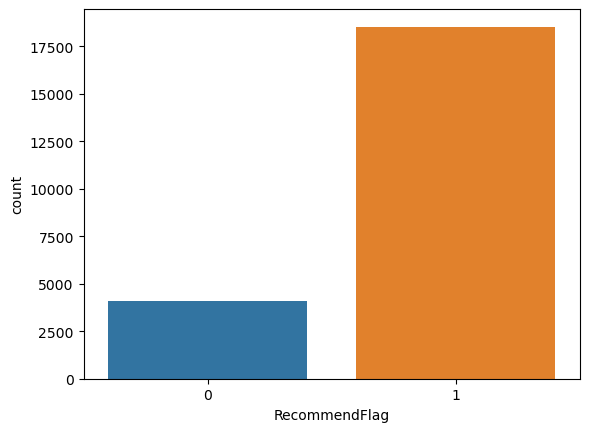

In [116]:
#Plotting of y
sns.countplot(y)
plt.show()

In [117]:
#Tfidf Vectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)

In [118]:
#Transforming of text
tfidf_text=tfidf_vect.fit_transform(X)

In [119]:
#Tfidf dataframe
dtm_tfidf=pd.DataFrame(tfidf_text.toarray(), columns=tfidf_vect.get_feature_names())

In [120]:
#Balancing of data
sm = over_sampling.SMOTE(random_state=123)
final_X, y = sm.fit_resample(dtm_tfidf,y)

In [121]:
#Distribution of balanced y
y.value_counts()

1    18540
0    18540
Name: RecommendFlag, dtype: int64

In [122]:
#Splitting into train and test
train_X, test_X, train_y, test_y = train_test_split(final_X, y, test_size=0.3, random_state=123)
train=pd.concat([train_X,train_y],axis=1)
test=pd.concat([test_X,test_y],axis=1)

## Logistic Regression

In [123]:
#Building of Logistic Regression Model
logit_model=LogisticRegression().fit(train_X, train_y)

In [124]:
#Train probability
LR_Trainprob=pd.DataFrame(logit_model.predict_proba(train_X), index=train_X.index)
LR_Trainprob.columns=['LR_Trainprob_fl','LR_Trainprob_tr']
LR_Trainprob

LR_Trainprob_fl  LR_Trainprob_tr
11494         0.399818         0.600182
33135         0.923052         0.076948
28079         0.522607         0.477393
13278         0.051837         0.948163
14869         0.165624         0.834376
...                ...              ...
7763          0.866797         0.133203
15377         0.009913         0.990087
17730         0.683231         0.316769
28030         0.942145         0.057855
15725         0.260314         0.739686

[25956 rows x 2 columns]

In [125]:
#Test probability
LR_Testprob=pd.DataFrame(logit_model.predict_proba(test_X), index=test_X.index)
LR_Testprob.columns=['LR_Testprob_fl','LR_Testprob_tr']
LR_Testprob

LR_Testprob_fl  LR_Testprob_tr
2073         0.698016        0.301984
27723        0.964157        0.035843
21491        0.036619        0.963381
17426        0.028201        0.971799
3811         0.758836        0.241164
...               ...             ...
24366        0.918354        0.081646
35513        0.937955        0.062045
15813        0.093563        0.906437
25637        0.915123        0.084877
13527        0.294739        0.705261

[11124 rows x 2 columns]

In [126]:
# Best threshold
fpr, tpr, thresh=metrics.roc_curve(train_y, LR_Trainprob.LR_Trainprob_tr)
cutoff=thresh[np.argmax(tpr-fpr)] 

cutoff

0.4843395412785646

In [127]:
# Train predict
LR_Trainprob['pred']=np.where(LR_Trainprob.LR_Trainprob_tr>0.4843395412785646,1,0)

In [128]:
# Test predict
LR_Testprob['pred']=np.where(LR_Testprob.LR_Testprob_tr>0.4843395412785646,1,0)

In [129]:
#Predicting train
train_pred=logit_model.predict(train_X)
train_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [130]:
#Predicting test
test_pred=logit_model.predict(test_X)
test_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [131]:
#Classification Report of train
print(metrics.classification_report(train_y,train_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     12885
           1       0.91      0.89      0.90     13071

    accuracy                           0.90     25956
   macro avg       0.90      0.90      0.90     25956
weighted avg       0.90      0.90      0.90     25956



In [132]:
#Classification Report of test
print(metrics.classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      5655
           1       0.89      0.86      0.88      5469

    accuracy                           0.88     11124
   macro avg       0.88      0.88      0.88     11124
weighted avg       0.88      0.88      0.88     11124



## Linear_SVM

In [143]:
param={'C':[0.1,1,10,100,1000]}

In [147]:
grid=GridSearchCV(LinearSVC(),param_grid=param,verbose=3,cv=5,n_jobs=-1).fit(train_X,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [148]:
grid.cv_results_

{'mean_fit_time': array([ 1.88498578,  2.05720925,  5.58033476, 13.19345374, 11.97188392]),
 'std_fit_time': array([0.36418958, 0.49460384, 0.41250985, 0.49999645, 2.26516201]),
 'mean_score_time': array([0.05847178, 0.07620025, 0.06052008, 0.06354795, 0.04473286]),
 'std_score_time': array([0.00927934, 0.0189765 , 0.00854738, 0.00838368, 0.01280054]),
 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}],
 'split0_test_score': array([0.87827427, 0.8798151 , 0.87711864, 0.87846687, 0.86960709]),
 'split1_test_score': array([0.89115777, 0.88730495, 0.88653439, 0.88691967, 0.87131574]),
 'split2_test_score': array([0.88672703, 0.88672703, 0.88306685, 0.88306685, 0.86727028]),
 'split3_test_score': array([0.88460798, 0.88691967, 0.88634175, 0.88422269, 0.83201695]),
 'split4_test_score': array([0.88576382, 0.8888

In [149]:
grid.best_score_

0.885922565397798

In [150]:
grid.best_params_

{'C': 1}

In [151]:
model_svc=LinearSVC(C=1).fit(train_X,train_y)

In [152]:
svc_train=model_svc.predict(train_X)

In [153]:
svc_test=model_svc.predict(test_X)

In [154]:
#Confusion Matrix
cm=metrics.confusion_matrix(train_y,svc_train)

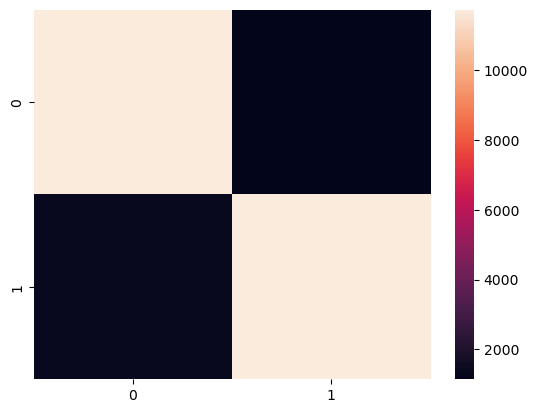

In [155]:
#Plotting of confusion matrix
sns.heatmap(cm)
plt.show()

In [156]:
#Classification Report for train
print(metrics.classification_report(train_y,svc_train))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90     12885
           1       0.91      0.90      0.90     13071

    accuracy                           0.90     25956
   macro avg       0.90      0.90      0.90     25956
weighted avg       0.90      0.90      0.90     25956



In [157]:
#Classification Report for train
print(metrics.classification_report(test_y,svc_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      5655
           1       0.89      0.87      0.88      5469

    accuracy                           0.88     11124
   macro avg       0.88      0.88      0.88     11124
weighted avg       0.88      0.88      0.88     11124



## Naive-Bayes Classification

In [212]:
bnb = BernoulliNB(binarize=None)
model_bnb = bnb.fit(train_X, train_y)

In [213]:
y_pred_train= bnb.predict(train_X)
y_pred_test = bnb.predict(test_X)

In [214]:
cm=metrics.confusion_matrix(train_y,y_pred_train)
cm

array([[11514,  1371],
       [ 1596, 11475]], dtype=int64)

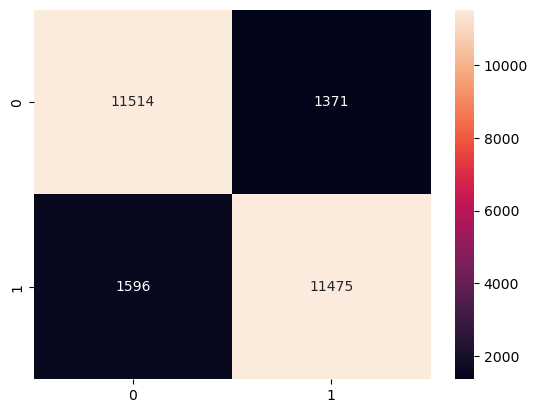

In [215]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

In [216]:
#Classification Report for train 
print(metrics.classification_report(train_y,y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     12885
           1       0.89      0.88      0.89     13071

    accuracy                           0.89     25956
   macro avg       0.89      0.89      0.89     25956
weighted avg       0.89      0.89      0.89     25956



In [217]:
#Classification Report for test
print(metrics.classification_report(test_y,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5655
           1       0.88      0.87      0.87      5469

    accuracy                           0.88     11124
   macro avg       0.88      0.88      0.88     11124
weighted avg       0.88      0.88      0.88     11124



## Topic Mining Using Gensim

In [159]:
text=rev_final.cleaned_text

In [222]:
#Extracting tokens from text data
tokens=[doc.split() for doc in text]
tokens

[['absolutely', 'wonderful', 'silky', 'comfortable'],
 ['love',
  'pretty',
  'happened',
  'find',
  'never',
  'ordered',
  'online',
  'bought',
  'petite',
  'hit',
  'little',
  'knee',
  'definitely',
  'true',
  'truly',
  'petite'],
 ['high',
  'really',
  'wanted',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'found',
  'outrageously',
  'small',
  'small',
  'reordered',
  'petite',
  'ok',
  'overall',
  'top',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'major',
  'directly',
  'zipper'],
 ['love', 'flirty', 'fabulous', 'every', 'great'],
 ['flattering',
  'due',
  'adjustable',
  'perfect',
  'legging',
  'sleeveless',
  'well',
  'cardigan',
  'love'],
 ['love',
  'reese',
  'petite',
  'usually',
  'p',
  'pretty',
  'long',
  'full',
  'overwhelmed',
  'small',
  'shortening',
  'narrowing',
  'take',
  'away',
  'embellishment',
  'returned'],
 ['aded',
  'last',
  'see',
  

In [223]:
#Dictionary of tokens
dictionary=corpora.Dictionary(tokens)
print(dictionary)

Dictionary(11070 unique tokens: ['absolutely', 'comfortable', 'silky', 'wonderful', 'bought']...)


In [224]:
#Matrix from dictionary
doc_term_matrix=[dictionary.doc2bow(doc) for doc in tokens]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1)],
 [(1, 1),
  (14, 1),
  (15, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(11, 1), (43, 1), (44, 1), (45, 1), (46, 1)],
 [(11, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(11, 1),
  (15, 1),
  (16, 1),
  (36, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(10, 1),
  (33, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 

In [225]:
# Creating the object for LDA model using gensim library
lda=gensim.models.ldamodel.LdaModel
lda

gensim.models.ldamodel.LdaModel

In [226]:
params={'num_topics':[5,10,15,20,25]}

In [164]:
# Running and Training LDA model on the document term matrix.
lda_model=lda(doc_term_matrix,num_topics=20,id2word=dictionary)
lda_model

In [165]:
#printing of Topics with words
print(lda_model.print_topics(num_topics=20, num_words=20))

[(0, '0.105*"small" + 0.043*"large" + 0.040*"run" + 0.034*"ordered" + 0.026*"usually" + 0.023*"top" + 0.022*"fit" + 0.017*"normally" + 0.016*"big" + 0.016*"love" + 0.014*"great" + 0.014*"beautiful" + 0.014*"medium" + 0.013*"long" + 0.012*"extra" + 0.011*"perfect" + 0.010*"even" + 0.009*"well" + 0.009*"little" + 0.008*"perfectly"'), (1, '0.025*"made" + 0.023*"like" + 0.021*"well" + 0.021*"beautiful" + 0.018*"back" + 0.017*"fit" + 0.017*"great" + 0.014*"top" + 0.012*"nice" + 0.011*"flattering" + 0.010*"nicely" + 0.010*"odd" + 0.010*"tell" + 0.010*"adorable" + 0.009*"going" + 0.009*"didnt" + 0.008*"ok" + 0.008*"even" + 0.008*"wanted" + 0.008*"instead"'), (2, '0.043*"got" + 0.037*"many" + 0.033*"bought" + 0.030*"wore" + 0.025*"received" + 0.023*"love" + 0.022*"top" + 0.018*"little" + 0.018*"full" + 0.016*"compliment" + 0.016*"comfortable" + 0.016*"great" + 0.015*"well" + 0.014*"black" + 0.013*"purchased" + 0.012*"perfect" + 0.012*"flattering" + 0.012*"first" + 0.011*"wedding" + 0.011*"usua

In [166]:
topics=lda_model.show_topics(num_topics=20,num_words=20,formatted=False)
topics

[(0,
  [('small', 0.10455727),
   ('large', 0.04251213),
   ('run', 0.03960559),
   ('ordered', 0.034475505),
   ('usually', 0.025721071),
   ('top', 0.022833975),
   ('fit', 0.021810116),
   ('normally', 0.016940862),
   ('big', 0.015832687),
   ('love', 0.015652671),
   ('great', 0.014005146),
   ('beautiful', 0.01388248),
   ('medium', 0.013723816),
   ('long', 0.012598716),
   ('extra', 0.01234031),
   ('perfect', 0.011162796),
   ('even', 0.01014103),
   ('well', 0.009410535),
   ('little', 0.008952736),
   ('perfectly', 0.008431117)]),
 (1,
  [('made', 0.024641577),
   ('like', 0.023223523),
   ('well', 0.021052472),
   ('beautiful', 0.020676449),
   ('back', 0.018378109),
   ('fit', 0.01739483),
   ('great', 0.016694855),
   ('top', 0.013939756),
   ('nice', 0.011854395),
   ('flattering', 0.010769737),
   ('nicely', 0.009925655),
   ('odd', 0.00984703),
   ('tell', 0.009764441),
   ('adorable', 0.009720346),
   ('going', 0.009087694),
   ('didnt', 0.008806107),
   ('ok', 0.0082

In [167]:
for t in range(len(topics)):
    print('\nTopic {},top {} words:'.format(t+1,20))
    print(' '.join ([w[0] for w in topics [t][1]]))


Topic 1,top 20 words:
small large run ordered usually top fit normally big love great beautiful medium long extra perfect even well little perfectly

Topic 2,top 20 words:
made like well beautiful back fit great top nice flattering nicely odd tell adorable going didnt ok even wanted instead

Topic 3,top 20 words:
got many bought wore received love top little full compliment comfortable great well black purchased perfect flattering first wedding usually

Topic 4,top 20 words:
love great comfortable flattering dressed easy fit sleeve bought absolutely top soft true easily large belt wearing fabulous must glad

Topic 5,top 20 words:
petite regular like tried ordered fit short right long hit sure perfect usually tall really nice flattering perfectly think great

Topic 6,top 20 words:
like top even back sized dress really tried beautiful last thin kept pulled plus believe pretty going made however negative

Topic 7,top 20 words:
back like really however top fabric much going looked loved e

In [168]:
# Printing the topic associations with the documents
count=0
for i in lda_model[doc_term_matrix]:
    print('doc:',count,i)
    count+=1

doc: 0 [(0, 0.010000404), (1, 0.010000404), (2, 0.010000404), (3, 0.5920161), (4, 0.010000404), (5, 0.010000404), (6, 0.010000404), (7, 0.010000404), (8, 0.010000404), (9, 0.010000404), (10, 0.010000404), (11, 0.010000404), (12, 0.010000404), (13, 0.010000404), (14, 0.010000404), (15, 0.010000404), (16, 0.22797665), (17, 0.010000404), (18, 0.010000404), (19, 0.010000404)]
doc: 1 [(4, 0.37109447), (12, 0.43070427), (16, 0.1481991)]
doc: 2 [(0, 0.22640593), (1, 0.10084499), (4, 0.15678465), (5, 0.28821278), (18, 0.05604108), (19, 0.14900485)]
doc: 3 [(3, 0.65736586), (10, 0.19262998)]
doc: 4 [(7, 0.31860244), (15, 0.41313598), (16, 0.18325667)]
doc: 5 [(4, 0.109024726), (12, 0.83471614)]
doc: 6 [(4, 0.83196497), (16, 0.11995718)]
doc: 7 [(4, 0.2683848), (10, 0.11317894), (16, 0.40990937), (17, 0.17995082)]
doc: 8 [(0, 0.6180334), (14, 0.29196304)]
doc: 9 [(4, 0.6882821), (14, 0.08673593), (17, 0.17184937)]
doc: 10 [(0, 0.247796), (5, 0.1535235), (6, 0.38773477), (19, 0.16882728)]
doc: 11

doc: 261 [(4, 0.034801293), (9, 0.1800833), (12, 0.3852256), (13, 0.2472692), (14, 0.058623984), (19, 0.070659265)]
doc: 262 [(3, 0.89444345)]
doc: 263 [(0, 0.12858224), (7, 0.09567011), (12, 0.30023706), (14, 0.30227607), (17, 0.1406233)]
doc: 264 [(0, 0.0125001585), (1, 0.0125001585), (2, 0.0125001585), (3, 0.0125001585), (4, 0.0125001585), (5, 0.0125001585), (6, 0.0125001585), (7, 0.0125001585), (8, 0.0125001585), (9, 0.0125001585), (10, 0.76249695), (11, 0.0125001585), (12, 0.0125001585), (13, 0.0125001585), (14, 0.0125001585), (15, 0.0125001585), (16, 0.0125001585), (17, 0.0125001585), (18, 0.0125001585), (19, 0.0125001585)]
doc: 265 [(9, 0.7256415), (13, 0.16185693)]
doc: 266 [(2, 0.16066669), (3, 0.21963699), (4, 0.16778232), (6, 0.092385426), (13, 0.12649779), (14, 0.20968978)]
doc: 267 [(1, 0.2162183), (7, 0.056576923), (11, 0.122507475), (18, 0.3039613), (19, 0.27295253)]
doc: 268 [(3, 0.24945097), (4, 0.15406156), (5, 0.15553421), (9, 0.129736), (15, 0.23619048)]
doc: 269 [(

doc: 523 [(4, 0.2908912), (5, 0.038263462), (12, 0.3516632), (14, 0.07462317), (16, 0.055191617), (19, 0.16602558)]
doc: 524 [(3, 0.29814243), (6, 0.31999075), (14, 0.28741747)]
doc: 525 [(0, 0.010000314), (1, 0.010000314), (2, 0.010000315), (3, 0.8099941), (4, 0.010000314), (5, 0.010000314), (6, 0.010000314), (7, 0.010000314), (8, 0.010000314), (9, 0.010000314), (10, 0.010000314), (11, 0.010000314), (12, 0.010000314), (13, 0.010000315), (14, 0.010000314), (15, 0.010000314), (16, 0.010000314), (17, 0.010000314), (18, 0.010000314), (19, 0.010000314)]
doc: 526 [(4, 0.7046957), (7, 0.100617774), (9, 0.14153467)]
doc: 527 [(0, 0.12104248), (1, 0.095751256), (4, 0.25422812), (11, 0.07972362), (19, 0.41664198)]
doc: 528 [(0, 0.012500121), (1, 0.012500121), (2, 0.012500121), (3, 0.012500121), (4, 0.012500121), (5, 0.012500121), (6, 0.012500121), (7, 0.012500121), (8, 0.012500121), (9, 0.7624977), (10, 0.012500121), (11, 0.012500121), (12, 0.012500121), (13, 0.012500122), (14, 0.012500121), (1

doc: 755 [(0, 0.41053712), (2, 0.04627632), (11, 0.09530344), (13, 0.19827558), (18, 0.1495804), (19, 0.07587809)]
doc: 756 [(1, 0.10266129), (4, 0.19410577), (8, 0.10820117), (11, 0.2644306), (13, 0.29650128)]
doc: 757 [(5, 0.14920709), (10, 0.0456523), (13, 0.06956357), (14, 0.30005565), (17, 0.14017677), (19, 0.26838863)]
doc: 758 [(2, 0.1091585), (7, 0.3952968), (14, 0.24824214), (19, 0.21256246)]
doc: 759 [(1, 0.108021185), (3, 0.24327932), (14, 0.2444423), (18, 0.33150873)]
doc: 760 [(6, 0.1596178), (9, 0.13687684), (14, 0.545524), (19, 0.1216147)]
doc: 761 [(3, 0.27402788), (5, 0.11410984), (10, 0.2737122), (13, 0.17011386), (15, 0.12391543)]
doc: 762 [(2, 0.14322715), (3, 0.19089136), (8, 0.15640686), (12, 0.3669089), (18, 0.095685124)]
doc: 763 [(0, 0.012500077), (1, 0.012500077), (2, 0.012500077), (3, 0.76249856), (4, 0.012500077), (5, 0.012500077), (6, 0.012500077), (7, 0.012500077), (8, 0.012500077), (9, 0.012500077), (10, 0.012500077), (11, 0.012500077), (12, 0.012500077),

doc: 1024 [(9, 0.8416655)]
doc: 1025 [(0, 0.60518867), (13, 0.31981006)]
doc: 1026 [(0, 0.40425625), (4, 0.08158284), (7, 0.2741026), (8, 0.04576702), (18, 0.05946466), (19, 0.10982077)]
doc: 1027 [(0, 0.77146083), (19, 0.13853623)]
doc: 1028 [(7, 0.2975475), (13, 0.19667071), (15, 0.16845983), (16, 0.123697355), (17, 0.1706482)]
doc: 1029 [(0, 0.18940608), (6, 0.074247554), (10, 0.0760173), (13, 0.17428981), (14, 0.091332234), (15, 0.36970276)]
doc: 1030 [(4, 0.53069896), (8, 0.2329627), (9, 0.1993786)]
doc: 1031 [(0, 0.20181145), (2, 0.25038853), (4, 0.112961344), (6, 0.1024485), (11, 0.07613325), (12, 0.09171305), (16, 0.13953863)]
doc: 1032 [(5, 0.10510844), (6, 0.3791309), (11, 0.4449221)]
doc: 1033 [(5, 0.11188066), (6, 0.85350215)]
doc: 1034 [(3, 0.3202297), (12, 0.14876175), (17, 0.4598265)]
doc: 1035 [(12, 0.13277595), (13, 0.6543233), (17, 0.1356182)]
doc: 1036 [(1, 0.0734131), (4, 0.27698472), (5, 0.10241558), (10, 0.31055853), (17, 0.19911943)]
doc: 1037 [(1, 0.4443194), (7

doc: 1288 [(10, 0.07328945), (12, 0.34668776), (14, 0.22468376), (19, 0.31088048)]
doc: 1289 [(0, 0.38071743), (1, 0.20227882), (2, 0.2011565), (3, 0.09206528), (12, 0.088039346)]
doc: 1290 [(12, 0.23647496), (13, 0.25235528), (16, 0.46116537)]
doc: 1291 [(4, 0.080580786), (6, 0.09801102), (7, 0.23582639), (10, 0.13491221), (12, 0.10689991), (18, 0.086932026), (19, 0.2308242)]
doc: 1292 [(11, 0.7087942), (17, 0.20937057)]
doc: 1293 [(3, 0.14049837), (11, 0.2707887), (15, 0.48244146)]
doc: 1294 [(5, 0.29877967), (6, 0.17576249), (11, 0.070829846), (16, 0.11675773), (17, 0.17364392), (19, 0.14088377)]
doc: 1295 [(2, 0.61459696), (16, 0.23539706)]
doc: 1296 [(5, 0.1705556), (7, 0.20978996), (9, 0.073869385), (18, 0.113910586), (19, 0.38499334)]
doc: 1297 [(1, 0.3771258), (5, 0.17377286), (13, 0.22244546), (17, 0.19998448)]
doc: 1298 [(0, 0.32134035), (4, 0.17572504), (6, 0.4197885), (9, 0.04980612)]
doc: 1299 [(2, 0.033504102), (5, 0.93649215)]
doc: 1300 [(0, 0.3319408), (11, 0.5780531)]


doc: 1561 [(6, 0.19334562), (8, 0.030964166), (14, 0.18288358), (15, 0.06659169), (18, 0.49620047)]
doc: 1562 [(0, 0.12804371), (5, 0.048263587), (11, 0.0491987), (12, 0.47822934), (13, 0.1718474), (14, 0.10027147)]
doc: 1563 [(2, 0.28260127), (4, 0.2515928), (9, 0.11440362), (15, 0.2786564)]
doc: 1564 [(2, 0.47451434), (4, 0.41298208)]
doc: 1565 [(0, 0.07811539), (5, 0.62827903), (15, 0.22820924)]
doc: 1566 [(0, 0.37284285), (1, 0.01000078), (2, 0.01000078), (3, 0.01000078), (4, 0.01000078), (5, 0.01000078), (6, 0.01000078), (7, 0.01000078), (8, 0.01000078), (9, 0.01000078), (10, 0.01000078), (11, 0.01000078), (12, 0.2839794), (13, 0.01000078), (14, 0.17316447), (15, 0.01000078), (16, 0.01000078), (17, 0.01000078), (18, 0.01000078), (19, 0.01000078)]
doc: 1567 [(1, 0.52091473), (13, 0.35050762)]
doc: 1568 [(7, 0.80083865), (15, 0.0991569)]
doc: 1569 [(8, 0.14531198), (9, 0.43502194), (13, 0.3346546)]
doc: 1570 [(0, 0.17499366), (3, 0.1704634), (4, 0.12083298), (15, 0.41288573), (19, 0

doc: 1815 [(4, 0.38291305), (6, 0.51706076)]
doc: 1816 [(3, 0.29652095), (12, 0.6034696)]
doc: 1817 [(0, 0.41573745), (12, 0.32638624), (18, 0.20120528)]
doc: 1818 [(2, 0.083772644), (3, 0.04531631), (6, 0.4484414), (9, 0.061227854), (12, 0.048761014), (13, 0.28746873)]
doc: 1819 [(4, 0.30673504), (7, 0.6458908)]
doc: 1820 [(0, 0.6185174), (1, 0.23147762)]
doc: 1821 [(0, 0.7624967), (1, 0.012500173), (2, 0.012500173), (3, 0.012500174), (4, 0.012500173), (5, 0.012500173), (6, 0.012500173), (7, 0.012500173), (8, 0.012500173), (9, 0.012500173), (10, 0.012500173), (11, 0.012500173), (12, 0.012500173), (13, 0.012500174), (14, 0.012500173), (15, 0.012500174), (16, 0.012500173), (17, 0.012500173), (18, 0.012500173), (19, 0.012500173)]
doc: 1822 [(0, 0.2371804), (11, 0.09634091), (13, 0.2189476), (17, 0.3941944)]
doc: 1823 [(1, 0.58863825), (3, 0.10255144), (6, 0.18055046), (7, 0.07824999)]
doc: 1824 [(4, 0.6513186), (15, 0.13615713), (17, 0.17556383)]
doc: 1825 [(1, 0.13390718), (2, 0.1824156

doc: 2122 [(6, 0.075880796), (7, 0.4098375), (10, 0.15736476), (14, 0.08503102), (16, 0.23021023)]
doc: 2123 [(4, 0.22052139), (6, 0.7232177)]
doc: 2124 [(0, 0.16555136), (17, 0.52423334), (18, 0.27479172)]
doc: 2125 [(7, 0.084083095), (8, 0.1352238), (10, 0.09439312), (15, 0.41229838), (16, 0.24137498)]
doc: 2126 [(1, 0.18352872), (3, 0.07441716), (5, 0.10889026), (8, 0.08480274), (11, 0.2603481), (15, 0.14381798), (19, 0.11813472)]
doc: 2127 [(0, 0.23251615), (3, 0.112107635), (5, 0.17593166), (16, 0.42610073)]
doc: 2128 [(5, 0.062846184), (9, 0.5002733), (12, 0.24417661), (18, 0.14824587)]
doc: 2129 [(0, 0.31451124), (6, 0.55691487)]
doc: 2130 [(2, 0.2444268), (3, 0.20902915), (4, 0.27942765), (6, 0.07928787), (7, 0.09819349), (11, 0.060460504)]
doc: 2131 [(7, 0.2321916), (11, 0.48513207), (19, 0.18822624)]
doc: 2132 [(6, 0.53789735), (11, 0.21845382), (14, 0.20499943)]
doc: 2133 [(8, 0.07551187), (11, 0.07117667), (15, 0.5114266), (16, 0.22753765), (18, 0.076838724)]
doc: 2134 [(1,

doc: 2408 [(6, 0.22856086), (11, 0.360014), (16, 0.18945608), (19, 0.14918064)]
doc: 2409 [(0, 0.55166143), (3, 0.08574429), (16, 0.31258538)]
doc: 2410 [(6, 0.65002906), (16, 0.12008942), (19, 0.15256001)]
doc: 2411 [(4, 0.58568007), (6, 0.100143224), (16, 0.14865258), (17, 0.13073836)]
doc: 2412 [(7, 0.17552349), (8, 0.1874425), (15, 0.5522089)]
doc: 2413 [(1, 0.14782783), (4, 0.37630332), (11, 0.14639373), (12, 0.22695394), (13, 0.07126537)]
doc: 2414 [(6, 0.46802822), (8, 0.066018365), (15, 0.07506084), (18, 0.35279018)]
doc: 2415 [(1, 0.1020233), (4, 0.35292822), (10, 0.08348904), (12, 0.09157563), (14, 0.080914535), (18, 0.2557124)]
doc: 2416 [(2, 0.19191612), (4, 0.5852223), (10, 0.077013515), (16, 0.098779775)]
doc: 2417 [(0, 0.07595083), (5, 0.17813846), (6, 0.16234252), (8, 0.12782119), (10, 0.07348994), (13, 0.07356347), (17, 0.104888774), (19, 0.1844393)]
doc: 2418 [(1, 0.206987), (14, 0.18013318), (16, 0.57037306)]
doc: 2419 [(6, 0.1411807), (7, 0.22664036), (13, 0.0831544

doc: 2668 [(4, 0.06382872), (6, 0.436256), (13, 0.22518234), (18, 0.22767)]
doc: 2669 [(5, 0.23703356), (7, 0.38568145), (13, 0.32728264)]
doc: 2670 [(0, 0.11663439), (1, 0.26630133), (4, 0.17711528), (8, 0.07586333), (11, 0.109042585), (13, 0.22003442)]
doc: 2671 [(0, 0.18425277), (1, 0.34309334), (3, 0.11933194), (16, 0.29998425)]
doc: 2672 [(1, 0.24621516), (8, 0.2956949), (9, 0.066631794), (18, 0.34934694)]
doc: 2673 [(4, 0.09796222), (8, 0.24073422), (12, 0.36013898), (18, 0.2630613)]
doc: 2674 [(15, 0.4091377), (16, 0.21304615), (19, 0.30054057)]
doc: 2675 [(4, 0.20056926), (13, 0.7394294)]
doc: 2676 [(0, 0.08099413), (6, 0.3246843), (8, 0.08465753), (10, 0.17215791), (17, 0.29059282)]
doc: 2677 [(6, 0.44252315), (16, 0.48247433)]
doc: 2678 [(6, 0.17396006), (13, 0.3965891), (14, 0.13729014), (18, 0.26634884)]
doc: 2679 [(0, 0.80998784), (1, 0.010000641), (2, 0.010000641), (3, 0.010000641), (4, 0.010000641), (5, 0.010000641), (6, 0.010000641), (7, 0.010000641), (8, 0.010000641), 

doc: 2948 [(1, 0.37741733), (4, 0.22705166), (5, 0.14056711), (11, 0.10971204), (18, 0.09837173)]
doc: 2949 [(1, 0.19100137), (4, 0.3233876), (11, 0.2336378), (16, 0.08374438), (17, 0.13413475)]
doc: 2950 [(8, 0.1122697), (11, 0.10546334), (12, 0.5851098), (13, 0.13975881)]
doc: 2951 [(0, 0.32074), (4, 0.3467094), (7, 0.069903076), (15, 0.23407283)]
doc: 2952 [(6, 0.35175195), (10, 0.14162308), (11, 0.054906722), (19, 0.42208415)]
doc: 2953 [(0, 0.05889962), (2, 0.3982023), (7, 0.19523777), (13, 0.22793655), (19, 0.0856284)]
doc: 2954 [(0, 0.39838985), (1, 0.12674664), (3, 0.11118296), (12, 0.123821124), (15, 0.21207912)]
doc: 2955 [(6, 0.1951353), (13, 0.65486014)]
doc: 2956 [(3, 0.23410904), (11, 0.28327847), (12, 0.08036825), (16, 0.36013296)]
doc: 2957 [(1, 0.2772487), (6, 0.47100234), (7, 0.097756386), (19, 0.11762302)]
doc: 2958 [(3, 0.37687725), (13, 0.3944408), (14, 0.1514058)]
doc: 2959 [(5, 0.11666948), (13, 0.4579941), (15, 0.106498055), (17, 0.07157922), (18, 0.20777376)]
d

doc: 3217 [(6, 0.48702258), (11, 0.17197259), (13, 0.30236602)]
doc: 3218 [(2, 0.18404652), (10, 0.31506917), (15, 0.44421378)]
doc: 3219 [(1, 0.095862105), (5, 0.184535), (10, 0.27585763), (12, 0.390402)]
doc: 3220 [(0, 0.13639785), (3, 0.13746624), (4, 0.5367319), (16, 0.14940163)]
doc: 3221 [(0, 0.77165395), (18, 0.18334219)]
doc: 3222 [(4, 0.3053813), (5, 0.15294522), (9, 0.27655545), (17, 0.18510428)]
doc: 3223 [(0, 0.4920545), (9, 0.13256502), (11, 0.1314037), (19, 0.15508236)]
doc: 3224 [(3, 0.09895297), (5, 0.2966152), (13, 0.3826175), (15, 0.18847752)]
doc: 3225 [(1, 0.21781412), (2, 0.32935292), (15, 0.28488052), (19, 0.12985252)]
doc: 3226 [(2, 0.5658736), (19, 0.28411874)]
doc: 3227 [(0, 0.47459248), (2, 0.16608343), (18, 0.25384596), (19, 0.058416393)]
doc: 3228 [(0, 0.010000442), (1, 0.010000442), (2, 0.010000442), (3, 0.010000442), (4, 0.010000442), (5, 0.010000442), (6, 0.010000442), (7, 0.010000442), (8, 0.010000442), (9, 0.010000442), (10, 0.010000442), (11, 0.0100004

doc: 3508 [(2, 0.12476377), (3, 0.19652914), (4, 0.16901582), (9, 0.069308005), (11, 0.14859559), (19, 0.25677788)]
doc: 3509 [(0, 0.640821), (11, 0.119480744), (18, 0.16885334)]
doc: 3510 [(1, 0.33774924), (3, 0.13051282), (19, 0.49125698)]
doc: 3511 [(0, 0.1595209), (4, 0.17184588), (10, 0.12249481), (18, 0.45718572)]
doc: 3512 [(4, 0.55999875), (15, 0.36216748), (16, 0.04851657)]
doc: 3513 [(6, 0.26576638), (7, 0.4186202), (8, 0.13034448), (10, 0.14315517)]
doc: 3514 [(1, 0.32577232), (13, 0.41867572), (17, 0.17827217)]
doc: 3515 [(0, 0.067811556), (4, 0.05653938), (7, 0.30675155), (9, 0.11416308), (10, 0.42348257)]
doc: 3516 [(0, 0.47092122), (6, 0.26050735), (8, 0.10654494), (11, 0.08762757), (16, 0.045544375)]
doc: 3517 [(0, 0.7212583), (8, 0.12242693), (11, 0.11582955)]
doc: 3518 [(4, 0.5354408), (11, 0.33598143)]
doc: 3519 [(2, 0.09494055), (4, 0.21160534), (7, 0.18383147), (10, 0.21213806), (11, 0.11579504), (14, 0.059625685), (17, 0.0979864)]
doc: 3520 [(7, 0.19222578), (9, 0

doc: 3796 [(4, 0.12701379), (6, 0.3803928), (10, 0.19295518), (18, 0.25255322)]
doc: 3797 [(10, 0.34381145), (15, 0.615276)]
doc: 3798 [(7, 0.22263534), (9, 0.3211676), (14, 0.34993866)]
doc: 3799 [(1, 0.21778521), (10, 0.32481796), (13, 0.22174418), (17, 0.18231313)]
doc: 3800 [(8, 0.09617505), (10, 0.6542807), (17, 0.18882228)]
doc: 3801 [(4, 0.18966371), (5, 0.1028241), (8, 0.23138982), (12, 0.1690799), (13, 0.2729473)]
doc: 3802 [(7, 0.3407659), (19, 0.5592278)]
doc: 3803 [(10, 0.20657094), (15, 0.1573649), (16, 0.33545557), (18, 0.20009448)]
doc: 3804 [(10, 0.15922724), (11, 0.17592743), (17, 0.31804383), (18, 0.1202493), (19, 0.15835567)]
doc: 3805 [(13, 0.25059497), (19, 0.6994023)]
doc: 3806 [(1, 0.0852736), (3, 0.13412578), (4, 0.1457396), (6, 0.29299515), (14, 0.29774353)]
doc: 3807 [(0, 0.30524606), (8, 0.06269977), (9, 0.24755338), (12, 0.16025318), (16, 0.19299439)]
doc: 3808 [(0, 0.14354177), (6, 0.4267374), (12, 0.3588682)]
doc: 3809 [(1, 0.245988), (8, 0.26724082), (18,

doc: 4071 [(0, 0.012501765), (1, 0.012501765), (2, 0.012501765), (3, 0.46406895), (4, 0.012501765), (5, 0.012501765), (6, 0.012501765), (7, 0.012501765), (8, 0.012501765), (9, 0.012501765), (10, 0.012501765), (11, 0.012501765), (12, 0.012501765), (13, 0.012501765), (14, 0.012501765), (15, 0.3108993), (16, 0.012501765), (17, 0.012501765), (18, 0.012501765), (19, 0.012501765)]
doc: 4072 [(4, 0.49475834), (10, 0.10618335), (16, 0.24307579), (19, 0.0988357)]
doc: 4073 [(10, 0.39604822), (16, 0.49144334)]
doc: 4074 [(4, 0.30806744), (10, 0.54189855)]
doc: 4075 [(9, 0.86428434)]
doc: 4076 [(0, 0.012500401), (1, 0.0125004), (2, 0.012500402), (3, 0.76249236), (4, 0.012500401), (5, 0.0125004), (6, 0.0125004), (7, 0.012500401), (8, 0.012500402), (9, 0.012500402), (10, 0.0125004), (11, 0.012500401), (12, 0.012500402), (13, 0.012500423), (14, 0.012500402), (15, 0.0125004), (16, 0.012500402), (17, 0.012500402), (18, 0.012500401), (19, 0.0125004)]
doc: 4077 [(5, 0.1018321), (7, 0.19417228), (8, 0.20

doc: 4315 [(11, 0.5288122), (13, 0.4170649)]
doc: 4316 [(13, 0.525881), (19, 0.4141183)]
doc: 4317 [(0, 0.18565707), (4, 0.53328526), (10, 0.25173494)]
doc: 4318 [(1, 0.14717099), (15, 0.34004304), (17, 0.44739586)]
doc: 4319 [(7, 0.5154334), (12, 0.15815817), (16, 0.26569122)]
doc: 4320 [(1, 0.2655783), (4, 0.25997233), (10, 0.25015453), (14, 0.16275264)]
doc: 4321 [(1, 0.13632187), (4, 0.28957075), (5, 0.2830355), (7, 0.07432427), (10, 0.11137392), (17, 0.07842872)]
doc: 4322 [(9, 0.59385896), (11, 0.10059604), (17, 0.122664794), (18, 0.110130236)]
doc: 4323 [(2, 0.13109939), (11, 0.123810135), (13, 0.17999429), (14, 0.41006136), (15, 0.12377809)]
doc: 4324 [(5, 0.056906283), (6, 0.15493229), (12, 0.23287666), (14, 0.425813), (17, 0.101688385)]
doc: 4325 [(5, 0.05205469), (9, 0.29151672), (11, 0.091301695), (13, 0.12021823), (16, 0.13818514), (18, 0.08381028), (19, 0.19790715)]
doc: 4326 [(0, 0.21269421), (13, 0.7180738)]
doc: 4327 [(8, 0.24908975), (18, 0.15304874), (19, 0.52058345)

doc: 4590 [(2, 0.42762688), (9, 0.18083742), (10, 0.29708144)]
doc: 4591 [(1, 0.13257039), (4, 0.449094), (11, 0.37583125)]
doc: 4592 [(0, 0.10228979), (3, 0.16204505), (4, 0.19939853), (7, 0.08127928), (8, 0.2060322), (12, 0.13519725), (15, 0.08278612)]
doc: 4593 [(5, 0.6590731), (10, 0.15850459), (14, 0.111583576)]
doc: 4594 [(0, 0.33903688), (7, 0.5709614)]
doc: 4595 [(3, 0.19304295), (6, 0.06067776), (8, 0.24387486), (15, 0.46240208)]
doc: 4596 [(2, 0.0680151), (4, 0.48696396), (8, 0.3796317)]
doc: 4597 [(1, 0.20213588), (10, 0.4613556), (15, 0.2940057)]
doc: 4598 [(3, 0.38333768), (4, 0.18645017), (9, 0.30877823)]
doc: 4599 [(0, 0.11061631), (4, 0.29185948), (15, 0.4738601), (17, 0.09032671)]
doc: 4600 [(0, 0.31659028), (4, 0.07945503), (7, 0.10690025), (10, 0.111282244), (15, 0.35797092)]
doc: 4601 [(0, 0.375412), (6, 0.18507876), (10, 0.16621035), (15, 0.22329259)]
doc: 4602 [(0, 0.21673197), (6, 0.22110535), (9, 0.35940927), (15, 0.17694372)]
doc: 4603 [(7, 0.90499634)]
doc: 46

doc: 4843 [(6, 0.3862802), (7, 0.2272215), (9, 0.085911125), (12, 0.18082386), (18, 0.08403796)]
doc: 4844 [(1, 0.19830275), (7, 0.13532342), (19, 0.6009843)]
doc: 4845 [(0, 0.67900723), (3, 0.11183253), (13, 0.1383239)]
doc: 4846 [(2, 0.07003911), (5, 0.12727335), (8, 0.06893625), (10, 0.2105129), (13, 0.17773758), (15, 0.13412437), (16, 0.18310925)]
doc: 4847 [(0, 0.35618606), (4, 0.17858054), (6, 0.115515895), (8, 0.079116285), (10, 0.060507715), (11, 0.18509161)]
doc: 4848 [(6, 0.8812449)]
doc: 4849 [(6, 0.18481293), (13, 0.32296535), (14, 0.136014), (19, 0.31809863)]
doc: 4850 [(1, 0.17492649), (3, 0.19541134), (6, 0.22216062), (11, 0.09293141), (18, 0.111764565), (19, 0.17580508)]
doc: 4851 [(5, 0.58640456), (6, 0.16631395), (11, 0.2068017)]
doc: 4852 [(10, 0.12971734), (12, 0.40361568), (14, 0.14793015), (18, 0.28236267)]
doc: 4853 [(0, 0.746092), (1, 0.18961963)]
doc: 4854 [(0, 0.060352977), (2, 0.14949608), (4, 0.26591852), (7, 0.10695743), (15, 0.23651037), (17, 0.15662198)]


doc: 5103 [(8, 0.76091135), (16, 0.16408078)]
doc: 5104 [(0, 0.19172196), (1, 0.4579919), (5, 0.20859152)]
doc: 5105 [(0, 0.273181), (9, 0.24383889), (14, 0.18188582), (15, 0.24775767)]
doc: 5106 [(1, 0.10045004), (2, 0.2226826), (3, 0.14390413), (6, 0.37376332), (10, 0.12794673)]
doc: 5107 [(0, 0.25425458), (1, 0.16220221), (4, 0.5181503)]
doc: 5108 [(13, 0.60420793), (14, 0.3265592)]
doc: 5109 [(1, 0.1038567), (3, 0.17651148), (4, 0.13480702), (17, 0.5048211)]
doc: 5110 [(10, 0.2763789), (13, 0.224006), (18, 0.3579257)]
doc: 5111 [(0, 0.010000926), (1, 0.21743633), (2, 0.010000926), (3, 0.40838835), (4, 0.010000926), (5, 0.010000926), (6, 0.010000926), (7, 0.20415957), (8, 0.010000926), (9, 0.010000926), (10, 0.010000926), (11, 0.010000926), (12, 0.010000926), (13, 0.010000926), (14, 0.010000926), (15, 0.010000926), (16, 0.010000926), (17, 0.010000926), (18, 0.010000926), (19, 0.010000926)]
doc: 5112 [(0, 0.8099983), (1, 0.010000093), (2, 0.010000093), (3, 0.010000093), (4, 0.0100000

doc: 5359 [(0, 0.26787066), (5, 0.0847274), (11, 0.28678825), (16, 0.21331884), (17, 0.111573294)]
doc: 5360 [(0, 0.46191016), (1, 0.081513695), (5, 0.2230739), (14, 0.18905456)]
doc: 5361 [(0, 0.13186213), (5, 0.18241443), (6, 0.12001419), (8, 0.05107564), (9, 0.0879744), (10, 0.39865184)]
doc: 5362 [(11, 0.5323528), (15, 0.18917729), (17, 0.2457749)]
doc: 5363 [(3, 0.2011689), (4, 0.46334946), (6, 0.2127448), (11, 0.09416174)]
doc: 5364 [(0, 0.09339996), (2, 0.28239134), (7, 0.11240842), (10, 0.08763635), (11, 0.37992352)]
doc: 5365 [(0, 0.016666746), (1, 0.016666746), (2, 0.016666746), (3, 0.016666746), (4, 0.016666746), (5, 0.016666746), (6, 0.016666746), (7, 0.016666746), (8, 0.016666746), (9, 0.016666746), (10, 0.016666746), (11, 0.016666746), (12, 0.016666746), (13, 0.016666746), (14, 0.016666746), (15, 0.016666746), (16, 0.016666746), (17, 0.016666746), (18, 0.6833318), (19, 0.016666746)]
doc: 5366 [(0, 0.025000412), (1, 0.025000412), (2, 0.025000412), (3, 0.52499217), (4, 0.02

doc: 5635 [(1, 0.27895272), (5, 0.22884741), (10, 0.40719178)]
doc: 5636 [(1, 0.15161467), (2, 0.08229749), (11, 0.066800594), (13, 0.15627815), (14, 0.1572323), (17, 0.35076964)]
doc: 5637 [(1, 0.08917408), (4, 0.62698346), (5, 0.06283296), (10, 0.18463682)]
doc: 5638 [(4, 0.5993921), (5, 0.095101394), (17, 0.24010304)]
doc: 5639 [(0, 0.48190865), (6, 0.4651415)]
doc: 5640 [(3, 0.14307621), (5, 0.053617258), (7, 0.1556626), (16, 0.5055374), (18, 0.11432236)]
doc: 5641 [(0, 0.37601414), (4, 0.10045423), (12, 0.14981233), (14, 0.07363678), (15, 0.19231685), (19, 0.070916295)]
doc: 5642 [(1, 0.32393062), (4, 0.15735401), (15, 0.14429514), (18, 0.32994667)]
doc: 5643 [(5, 0.16323775), (15, 0.74675894)]
doc: 5644 [(4, 0.36324826), (13, 0.14101388), (15, 0.3335106), (16, 0.108777694)]
doc: 5645 [(3, 0.12010043), (4, 0.30289283), (5, 0.08775814), (6, 0.14258668), (7, 0.1582898), (12, 0.082849786), (15, 0.07951645)]
doc: 5646 [(4, 0.56105644), (9, 0.1195556), (16, 0.28538585)]
doc: 5647 [(15,

doc: 5921 [(10, 0.048248615), (12, 0.13646305), (16, 0.19350776), (17, 0.53889483), (19, 0.054032203)]
doc: 5922 [(3, 0.52893764), (6, 0.3477985), (15, 0.086303025)]
doc: 5923 [(0, 0.19467399), (1, 0.120490626), (6, 0.41929612), (8, 0.12749735), (11, 0.10053754)]
doc: 5924 [(5, 0.061973862), (6, 0.10564849), (10, 0.24761184), (11, 0.15861692), (16, 0.07101215), (17, 0.33098304)]
doc: 5925 [(2, 0.17566368), (7, 0.23908679), (16, 0.06750853), (17, 0.37922448), (19, 0.107263565)]
doc: 5926 [(3, 0.2581665), (8, 0.4144575), (11, 0.16052252), (12, 0.13351676)]
doc: 5927 [(3, 0.310325), (5, 0.12271793), (11, 0.13827235), (13, 0.17919703), (17, 0.21823552)]
doc: 5928 [(1, 0.2067065), (2, 0.32268968), (11, 0.1053175), (15, 0.31822044)]
doc: 5929 [(0, 0.010000447), (1, 0.010000447), (2, 0.010000447), (3, 0.010000447), (4, 0.010000447), (5, 0.8099915), (6, 0.010000447), (7, 0.010000447), (8, 0.010000447), (9, 0.010000447), (10, 0.010000447), (11, 0.010000447), (12, 0.010000447), (13, 0.010000447)

doc: 6137 [(1, 0.13899334), (3, 0.2288963), (10, 0.09689028), (18, 0.48815796)]
doc: 6138 [(0, 0.19145389), (4, 0.34976453), (10, 0.27025113), (14, 0.12186065)]
doc: 6139 [(7, 0.15692736), (10, 0.16686429), (11, 0.59893125)]
doc: 6140 [(0, 0.61564404), (3, 0.12505527), (7, 0.09610018), (15, 0.11319822)]
doc: 6141 [(4, 0.91034454), (11, 0.055038206)]
doc: 6142 [(0, 0.012500417), (1, 0.76249206), (2, 0.012500417), (3, 0.012500417), (4, 0.012500417), (5, 0.012500417), (6, 0.012500417), (7, 0.012500417), (8, 0.012500417), (9, 0.012500417), (10, 0.012500417), (11, 0.012500417), (12, 0.012500417), (13, 0.012500422), (14, 0.012500417), (15, 0.012500417), (16, 0.012500417), (17, 0.012500417), (18, 0.012500417), (19, 0.012500417)]
doc: 6143 [(0, 0.36023307), (3, 0.55794704)]
doc: 6144 [(10, 0.61255646), (18, 0.23743652)]
doc: 6145 [(2, 0.11957284), (4, 0.56269044), (16, 0.08788462), (19, 0.18538962)]
doc: 6146 [(0, 0.2466062), (5, 0.39074358), (12, 0.30597958)]
doc: 6147 [(0, 0.73893094), (4, 0

doc: 6417 [(1, 0.17899428), (6, 0.109042466), (7, 0.107978836), (8, 0.09204748), (9, 0.25511876), (15, 0.2288034)]
doc: 6418 [(0, 0.40112564), (8, 0.26108974), (10, 0.105877176), (19, 0.16523704)]
doc: 6419 [(0, 0.20296085), (12, 0.13677134), (19, 0.59954953)]
doc: 6420 [(0, 0.010000158), (1, 0.010000158), (2, 0.010000158), (3, 0.010000159), (4, 0.010000158), (5, 0.010000159), (6, 0.010000159), (7, 0.010000158), (8, 0.010000158), (9, 0.010000158), (10, 0.010000158), (11, 0.010000159), (12, 0.010000158), (13, 0.010000158), (14, 0.010000158), (15, 0.010000158), (16, 0.010000158), (17, 0.010000158), (18, 0.010000158), (19, 0.809997)]
doc: 6421 [(2, 0.47365233), (4, 0.14775847), (10, 0.19203605), (19, 0.11382187)]
doc: 6422 [(0, 0.32982337), (1, 0.16696708), (4, 0.21033774), (16, 0.2201263)]
doc: 6423 [(0, 0.2882374), (1, 0.43942198), (5, 0.16608374)]
doc: 6424 [(4, 0.19602436), (11, 0.15267153), (15, 0.12632701), (16, 0.47791466)]
doc: 6425 [(0, 0.82842714), (2, 0.107285514)]
doc: 6426 [(

doc: 6665 [(0, 0.010000356), (1, 0.010000355), (2, 0.010000355), (3, 0.010000356), (4, 0.010000355), (5, 0.010000355), (6, 0.010000355), (7, 0.010000355), (8, 0.010000355), (9, 0.010000356), (10, 0.010000355), (11, 0.010000355), (12, 0.8099933), (13, 0.010000355), (14, 0.010000355), (15, 0.010000355), (16, 0.010000355), (17, 0.010000355), (18, 0.010000355), (19, 0.010000355)]
doc: 6666 [(0, 0.592909), (7, 0.17942932), (12, 0.17453305)]
doc: 6667 [(7, 0.20381178), (10, 0.09775344), (14, 0.23359574), (15, 0.21720879), (17, 0.20815253)]
doc: 6668 [(4, 0.24505311), (15, 0.16311291), (16, 0.2819489), (17, 0.2750983)]
doc: 6669 [(0, 0.012502856), (1, 0.012502856), (2, 0.012502856), (3, 0.012502857), (4, 0.012502856), (5, 0.012502856), (6, 0.012502856), (7, 0.012502856), (8, 0.012502856), (9, 0.012502856), (10, 0.76244575), (11, 0.012502856), (12, 0.012502856), (13, 0.012502856), (14, 0.012502856), (15, 0.012502856), (16, 0.012502856), (17, 0.012502856), (18, 0.012502856), (19, 0.012502856)]


doc: 6974 [(3, 0.24838579), (12, 0.46346313), (17, 0.2541484)]
doc: 6975 [(2, 0.100459576), (6, 0.30378988), (10, 0.12576766), (19, 0.40328094)]
doc: 6976 [(7, 0.6674923), (14, 0.18250062)]
doc: 6977 [(0, 0.010000547), (1, 0.010000547), (2, 0.010000548), (3, 0.010000549), (4, 0.010000547), (5, 0.010000547), (6, 0.010000547), (7, 0.010000548), (8, 0.010000548), (9, 0.010000548), (10, 0.010000549), (11, 0.010000547), (12, 0.37831092), (13, 0.010000548), (14, 0.010000547), (15, 0.010000548), (16, 0.010000547), (17, 0.010000547), (18, 0.44167924), (19, 0.010000547)]
doc: 6978 [(17, 0.62642807), (19, 0.27356675)]
doc: 6979 [(0, 0.010000146), (1, 0.010000146), (2, 0.010000146), (3, 0.010000146), (4, 0.010000146), (5, 0.010000146), (6, 0.010000146), (7, 0.010000146), (8, 0.010000146), (9, 0.010000146), (10, 0.010000146), (11, 0.010000146), (12, 0.010000146), (13, 0.80999726), (14, 0.010000146), (15, 0.010000146), (16, 0.010000146), (17, 0.010000146), (18, 0.010000146), (19, 0.010000146)]
doc:

doc: 7269 [(8, 0.6353258), (15, 0.21466023)]
doc: 7270 [(1, 0.29422218), (6, 0.08999108), (9, 0.25917745), (13, 0.10764606), (19, 0.21324275)]
doc: 7271 [(0, 0.010000525), (1, 0.010000525), (2, 0.010000525), (3, 0.010000525), (4, 0.010000525), (5, 0.010000525), (6, 0.010000525), (7, 0.010000525), (8, 0.010000525), (9, 0.010000525), (10, 0.010000525), (11, 0.010000525), (12, 0.010000541), (13, 0.010000525), (14, 0.010000525), (15, 0.010000525), (16, 0.010000525), (17, 0.010000525), (18, 0.010000525), (19, 0.80999)]
doc: 7272 [(2, 0.34329024), (7, 0.25234297), (15, 0.35962495)]
doc: 7273 [(9, 0.19489993), (13, 0.65508544)]
doc: 7274 [(6, 0.18089683), (10, 0.3051605), (14, 0.16589503), (16, 0.2864974)]
doc: 7275 [(3, 0.41562888), (11, 0.0824778), (14, 0.1702865), (19, 0.28949115)]
doc: 7276 [(2, 0.30967432), (5, 0.14188738), (10, 0.2357719), (14, 0.14752644), (17, 0.13104272)]
doc: 7277 [(0, 0.18478039), (3, 0.14938203), (16, 0.2503076), (17, 0.17956693), (18, 0.19429402)]
doc: 7278 [(0, 

doc: 7538 [(2, 0.21976049), (12, 0.1580459), (13, 0.12842393), (17, 0.1673454), (18, 0.28475493)]
doc: 7539 [(4, 0.25442648), (7, 0.13197538), (8, 0.1588691), (13, 0.36582562)]
doc: 7540 [(3, 0.35689536), (5, 0.49309477)]
doc: 7541 [(0, 0.43836534), (4, 0.089709714), (6, 0.2609266), (14, 0.17462091)]
doc: 7542 [(6, 0.86426866)]
doc: 7543 [(4, 0.19177175), (15, 0.34044054), (16, 0.23203236), (18, 0.20718232)]
doc: 7544 [(7, 0.21813692), (11, 0.44056115), (14, 0.21985865)]
doc: 7545 [(10, 0.4156468), (14, 0.2977003), (19, 0.16521129)]
doc: 7546 [(0, 0.010000837), (1, 0.010000837), (2, 0.010000837), (3, 0.010000846), (4, 0.010000837), (5, 0.010000837), (6, 0.010000837), (7, 0.010000837), (8, 0.010000837), (9, 0.010000837), (10, 0.809984), (11, 0.010000837), (12, 0.010000837), (13, 0.010000837), (14, 0.010000837), (15, 0.010000837), (16, 0.010000837), (17, 0.010000837), (18, 0.010000837), (19, 0.010000837)]
doc: 7547 [(4, 0.3332027), (17, 0.5767677)]
doc: 7548 [(8, 0.48321784), (11, 0.4475

doc: 7801 [(1, 0.13882414), (4, 0.41941193), (8, 0.12354457), (12, 0.056760006), (15, 0.05836393), (17, 0.17508839)]
doc: 7802 [(4, 0.37136346), (5, 0.5536332)]
doc: 7803 [(5, 0.11535804), (9, 0.14711072), (13, 0.1619517), (18, 0.54594654)]
doc: 7804 [(2, 0.124683596), (6, 0.18814033), (8, 0.13943292), (9, 0.37014493), (10, 0.14350376)]
doc: 7805 [(9, 0.076416135), (15, 0.8110795)]
doc: 7806 [(2, 0.1483689), (7, 0.15499143), (8, 0.14365438), (9, 0.07093365), (10, 0.3157729), (11, 0.06792486), (12, 0.07126378)]
doc: 7807 [(7, 0.18672208), (14, 0.12216315), (15, 0.53045034), (19, 0.12429741)]
doc: 7808 [(5, 0.11592566), (8, 0.2606904), (11, 0.28047732), (13, 0.14489506), (18, 0.17300935)]
doc: 7809 [(3, 0.04814638), (4, 0.2529374), (6, 0.28139022), (9, 0.22201979), (11, 0.15800011)]
doc: 7810 [(7, 0.32517636), (13, 0.3796035), (17, 0.18893677)]
doc: 7811 [(1, 0.054368578), (2, 0.09237496), (9, 0.18997635), (10, 0.14449695), (11, 0.16707066), (18, 0.26511738), (19, 0.061575133)]
doc: 7812

doc: 8072 [(0, 0.6616474), (2, 0.24834888)]
doc: 8073 [(7, 0.17571959), (11, 0.20219763), (12, 0.18418942), (18, 0.37634146)]
doc: 8074 [(0, 0.54153883), (2, 0.2408503), (9, 0.16094147)]
doc: 8075 [(1, 0.31567723), (7, 0.12982877), (12, 0.26265207), (13, 0.21910673)]
doc: 8076 [(1, 0.15823509), (2, 0.7017207), (19, 0.08691312)]
doc: 8077 [(2, 0.4625179), (15, 0.38747948)]
doc: 8078 [(0, 0.17494716), (3, 0.08569222), (8, 0.264079), (12, 0.12639534), (19, 0.31627262)]
doc: 8079 [(5, 0.36730894), (7, 0.20321807), (8, 0.27830148), (13, 0.11307284)]
doc: 8080 [(0, 0.016666815), (1, 0.016666815), (2, 0.016666815), (3, 0.016666815), (4, 0.016666815), (5, 0.016666815), (6, 0.68333054), (7, 0.016666815), (8, 0.016666815), (9, 0.016666815), (10, 0.016666815), (11, 0.016666815), (12, 0.016666815), (13, 0.016666815), (14, 0.016666815), (15, 0.016666815), (16, 0.016666815), (17, 0.016666815), (18, 0.016666815), (19, 0.016666815)]
doc: 8081 [(0, 0.27124324), (8, 0.52656156), (15, 0.13135903)]
doc: 8

doc: 8311 [(2, 0.39590394), (4, 0.039619416), (6, 0.31041938), (9, 0.09934399), (10, 0.12061598)]
doc: 8312 [(10, 0.10594238), (15, 0.6026992), (17, 0.23823164)]
doc: 8313 [(0, 0.012500278), (1, 0.012500278), (2, 0.012500278), (3, 0.76249474), (4, 0.012500278), (5, 0.012500278), (6, 0.012500278), (7, 0.012500278), (8, 0.012500278), (9, 0.012500279), (10, 0.012500278), (11, 0.012500278), (12, 0.012500278), (13, 0.012500278), (14, 0.012500278), (15, 0.012500278), (16, 0.012500278), (17, 0.012500278), (18, 0.012500278), (19, 0.012500278)]
doc: 8314 [(0, 0.5966373), (6, 0.12645595), (17, 0.1824358)]
doc: 8315 [(4, 0.3865589), (9, 0.101504214), (13, 0.08373424), (14, 0.095832154), (16, 0.089921124), (18, 0.20892301)]
doc: 8316 [(0, 0.012500732), (1, 0.012500733), (2, 0.012500733), (3, 0.012500732), (4, 0.012500732), (5, 0.012500733), (6, 0.36742097), (7, 0.012500733), (8, 0.012500732), (9, 0.012500732), (10, 0.012500732), (11, 0.012500732), (12, 0.012500732), (13, 0.012500732), (14, 0.01250

doc: 8603 [(8, 0.5150492), (15, 0.33494118)]
doc: 8604 [(4, 0.40031764), (5, 0.08718542), (11, 0.09208812), (13, 0.3928119)]
doc: 8605 [(1, 0.11841093), (3, 0.11529068), (4, 0.35305947), (12, 0.18553369), (16, 0.1988401)]
doc: 8606 [(0, 0.010000259), (1, 0.010000259), (2, 0.010000259), (3, 0.5544039), (4, 0.010000259), (5, 0.010000259), (6, 0.010000259), (7, 0.010000259), (8, 0.010000259), (9, 0.010000259), (10, 0.010000259), (11, 0.010000259), (12, 0.010000259), (13, 0.010000259), (14, 0.010000259), (15, 0.01000026), (16, 0.26559147), (17, 0.010000259), (18, 0.010000259), (19, 0.010000259)]
doc: 8607 [(0, 0.8099915), (1, 0.01000045), (2, 0.01000045), (3, 0.01000045), (4, 0.01000045), (5, 0.01000045), (6, 0.01000045), (7, 0.01000045), (8, 0.01000045), (9, 0.01000045), (10, 0.01000045), (11, 0.01000045), (12, 0.01000045), (13, 0.010000451), (14, 0.01000045), (15, 0.01000045), (16, 0.01000045), (17, 0.01000045), (18, 0.01000045), (19, 0.01000045)]
doc: 8608 [(1, 0.098783664), (3, 0.12957

doc: 8866 [(9, 0.84166163)]
doc: 8867 [(1, 0.06941794), (5, 0.15577371), (12, 0.08519107), (13, 0.41395533), (15, 0.16193095), (17, 0.08777162)]
doc: 8868 [(4, 0.24714787), (5, 0.41722357), (6, 0.29866615)]
doc: 8869 [(6, 0.26663667), (8, 0.13909274), (11, 0.25605536), (18, 0.29376724)]
doc: 8870 [(4, 0.08030503), (6, 0.2729016), (7, 0.13668491), (11, 0.0819579), (12, 0.10693603), (15, 0.21826863), (18, 0.07886411)]
doc: 8871 [(2, 0.107498005), (7, 0.572489), (16, 0.28136784)]
doc: 8872 [(2, 0.23956794), (9, 0.24889764), (10, 0.20391965), (17, 0.25046965)]
doc: 8873 [(0, 0.113863744), (6, 0.36786032), (9, 0.22489928), (12, 0.2626042)]
doc: 8874 [(0, 0.38717535), (1, 0.06007096), (7, 0.0654267), (11, 0.105895184), (15, 0.35556588)]
doc: 8875 [(3, 0.29710913), (4, 0.12043477), (7, 0.17443341), (12, 0.06694545), (15, 0.3110658)]
doc: 8876 [(2, 0.15520382), (14, 0.37364292), (16, 0.4144822)]
doc: 8877 [(2, 0.2669781), (5, 0.21890149), (11, 0.29422364), (12, 0.13099572)]
doc: 8878 [(2, 0.32

doc: 9141 [(4, 0.26022524), (6, 0.36276963), (11, 0.1486325), (18, 0.19027187)]
doc: 9142 [(0, 0.010000425), (1, 0.010000425), (2, 0.010000425), (3, 0.4936236), (4, 0.010000425), (5, 0.010000425), (6, 0.010000425), (7, 0.010000425), (8, 0.010000425), (9, 0.010000425), (10, 0.32636878), (11, 0.010000425), (12, 0.010000425), (13, 0.010000425), (14, 0.010000425), (15, 0.010000425), (16, 0.010000425), (17, 0.010000425), (18, 0.010000425), (19, 0.010000425)]
doc: 9143 [(13, 0.15698713), (17, 0.7930113)]
doc: 9144 [(3, 0.30744535), (19, 0.61073023)]
doc: 9145 [(0, 0.12468914), (5, 0.09495962), (19, 0.7272201)]
doc: 9146 [(0, 0.31540534), (11, 0.17313606), (14, 0.108974256), (19, 0.37048128)]
doc: 9147 [(0, 0.048586167), (7, 0.57471865), (14, 0.059363857), (17, 0.29232603)]
doc: 9148 [(2, 0.35381418), (3, 0.39652038), (9, 0.2091877)]
doc: 9149 [(3, 0.17061624), (4, 0.44039124), (13, 0.18596753), (17, 0.16302043)]
doc: 9150 [(1, 0.577806), (6, 0.3096889)]
doc: 9151 [(0, 0.3681626), (3, 0.04755

doc: 9402 [(0, 0.33256346), (12, 0.28472427), (17, 0.20646906), (19, 0.13987486)]
doc: 9403 [(0, 0.3099415), (4, 0.10163562), (7, 0.09733439), (12, 0.11057415), (13, 0.3228187)]
doc: 9404 [(4, 0.3018026), (10, 0.49121693), (19, 0.14624679)]
doc: 9405 [(10, 0.44694924), (13, 0.44054508)]
doc: 9406 [(5, 0.18707663), (11, 0.17346033), (16, 0.12776668), (17, 0.4227955)]
doc: 9407 [(0, 0.6882732), (7, 0.10650138), (17, 0.14450873)]
doc: 9408 [(3, 0.12329055), (5, 0.18522792), (8, 0.071762525), (10, 0.05006818), (11, 0.12428479), (12, 0.102829866), (18, 0.31544283)]
doc: 9409 [(6, 0.06951751), (11, 0.25414017), (12, 0.22732161), (13, 0.10133852), (14, 0.08818681), (16, 0.17390466), (17, 0.060580637)]
doc: 9410 [(5, 0.21280824), (15, 0.09635733), (19, 0.6408263)]
doc: 9411 [(2, 0.13271232), (3, 0.24826477), (6, 0.23778167), (12, 0.0839805), (18, 0.18331206), (19, 0.077091865)]
doc: 9412 [(9, 0.2903202), (19, 0.58106744)]
doc: 9413 [(0, 0.42509648), (3, 0.18961807), (4, 0.1109927), (5, 0.05266

doc: 9680 [(3, 0.50427717), (17, 0.4057207)]
doc: 9681 [(0, 0.13505298), (2, 0.18156648), (4, 0.11695148), (5, 0.12549795), (8, 0.10792832), (12, 0.14262538), (17, 0.101337224), (19, 0.06759626)]
doc: 9682 [(4, 0.21396962), (5, 0.08517449), (6, 0.20809732), (10, 0.1694121), (16, 0.17740698), (18, 0.10703858)]
doc: 9683 [(11, 0.12874664), (16, 0.31105947), (19, 0.521555)]
doc: 9684 [(0, 0.10760416), (3, 0.055465486), (4, 0.060787417), (6, 0.14006042), (13, 0.15660422), (14, 0.13210401), (15, 0.19238043), (17, 0.13428396)]
doc: 9685 [(6, 0.29209554), (10, 0.15054207), (12, 0.49197578)]
doc: 9686 [(0, 0.21067192), (2, 0.25147069), (4, 0.5008976)]
doc: 9687 [(3, 0.38138306), (14, 0.49004254)]
doc: 9688 [(4, 0.82642955), (14, 0.11356796)]
doc: 9689 [(6, 0.6441785), (19, 0.26581523)]
doc: 9690 [(9, 0.06563447), (10, 0.16519265), (11, 0.04128527), (12, 0.16195846), (14, 0.15027598), (15, 0.123127125), (16, 0.10375481), (18, 0.06713202), (19, 0.103890896)]
doc: 9691 [(8, 0.25178093), (10, 0.56

doc: 9956 [(0, 0.069423206), (4, 0.41957316), (6, 0.26981327), (11, 0.064994685), (16, 0.061958756), (19, 0.08731012)]
doc: 9957 [(3, 0.108145945), (8, 0.13761613), (10, 0.10508473), (14, 0.37155712), (16, 0.21508522)]
doc: 9958 [(1, 0.4367575), (11, 0.12061367), (18, 0.2146543), (19, 0.19596893)]
doc: 9959 [(3, 0.123859845), (12, 0.6325545), (14, 0.112421155), (15, 0.08115705)]
doc: 9960 [(1, 0.053324502), (2, 0.20818053), (3, 0.0572611), (4, 0.563352), (14, 0.08902847)]
doc: 9961 [(2, 0.11939054), (4, 0.18718486), (6, 0.10287836), (10, 0.24966791), (15, 0.11579901), (18, 0.17494649)]
doc: 9962 [(14, 0.3364303), (15, 0.2181952), (16, 0.36037138)]
doc: 9963 [(2, 0.17158413), (10, 0.12104124), (11, 0.14615677), (15, 0.10212708), (17, 0.40551037)]
doc: 9964 [(0, 0.01666712), (1, 0.01666712), (2, 0.01666712), (3, 0.01666712), (4, 0.01666712), (5, 0.6833247), (6, 0.01666712), (7, 0.01666712), (8, 0.01666712), (9, 0.01666712), (10, 0.01666712), (11, 0.01666712), (12, 0.01666712), (13, 0.016

doc: 10216 [(2, 0.2103678), (7, 0.10124161), (11, 0.19722289), (14, 0.26818576), (17, 0.16526312)]
doc: 10217 [(4, 0.24330686), (5, 0.23618762), (15, 0.4890135)]
doc: 10218 [(0, 0.268178), (3, 0.103136055), (17, 0.59172773)]
doc: 10219 [(10, 0.2526993), (14, 0.5096843), (15, 0.19287117)]
doc: 10220 [(1, 0.17315805), (3, 0.18183699), (8, 0.102591775), (17, 0.4423922)]
doc: 10221 [(3, 0.38988352), (9, 0.3396878), (15, 0.18542396)]
doc: 10222 [(0, 0.32771507), (1, 0.19315796), (7, 0.16222079), (11, 0.27880788)]
doc: 10223 [(4, 0.112654805), (9, 0.17063361), (15, 0.17690928), (18, 0.16694553), (19, 0.3311837)]
doc: 10224 [(3, 0.17865479), (6, 0.5824513), (7, 0.14810352), (9, 0.05600395)]
doc: 10225 [(15, 0.8642822)]
doc: 10226 [(1, 0.13666195), (10, 0.24853016), (12, 0.07464918), (13, 0.3162109), (15, 0.1798253)]
doc: 10227 [(0, 0.11155826), (6, 0.21304242), (13, 0.5903876)]
doc: 10228 [(6, 0.6685865), (13, 0.2621787)]
doc: 10229 [(4, 0.37775505), (12, 0.2303078), (15, 0.20663261), (18, 0.

doc: 10469 [(0, 0.08507111), (1, 0.13418281), (5, 0.087105446), (9, 0.29179394), (18, 0.35496446)]
doc: 10470 [(0, 0.012500091), (1, 0.012500091), (2, 0.012500091), (3, 0.012500092), (4, 0.012500091), (5, 0.012500091), (6, 0.012500091), (7, 0.012500091), (8, 0.012500091), (9, 0.012500091), (10, 0.012500091), (11, 0.012500091), (12, 0.012500091), (13, 0.012500091), (14, 0.012500091), (15, 0.76249826), (16, 0.012500091), (17, 0.012500091), (18, 0.012500091), (19, 0.012500091)]
doc: 10471 [(14, 0.9208298)]
doc: 10472 [(1, 0.21251626), (13, 0.7401135)]
doc: 10473 [(1, 0.13027413), (4, 0.61275566), (7, 0.20029451)]
doc: 10474 [(0, 0.25769487), (3, 0.10176549), (17, 0.20988542), (19, 0.34175047)]
doc: 10475 [(1, 0.07215876), (3, 0.03996036), (5, 0.105556056), (7, 0.14503373), (8, 0.19382048), (9, 0.074783064), (13, 0.19801243), (18, 0.14997552)]
doc: 10476 [(2, 0.25425515), (15, 0.44024262), (16, 0.146422), (19, 0.09753226)]
doc: 10477 [(3, 0.75829345), (10, 0.15988602)]
doc: 10478 [(7, 0.41

doc: 10762 [(2, 0.074241415), (4, 0.3104866), (6, 0.24048997), (14, 0.082382806), (17, 0.12953708), (19, 0.13103393)]
doc: 10763 [(15, 0.8642783)]
doc: 10764 [(8, 0.21626979), (9, 0.10731268), (12, 0.20171519), (14, 0.29456943), (15, 0.12655474)]
doc: 10765 [(0, 0.2956862), (3, 0.15134208), (5, 0.17179592), (13, 0.28745514), (18, 0.064871244)]
doc: 10766 [(3, 0.2094189), (10, 0.15784626), (11, 0.07572911), (13, 0.41774198), (16, 0.11041324)]
doc: 10767 [(0, 0.010000168), (1, 0.010000168), (2, 0.010000168), (3, 0.80999684), (4, 0.010000168), (5, 0.010000168), (6, 0.010000168), (7, 0.010000168), (8, 0.010000168), (9, 0.010000168), (10, 0.010000168), (11, 0.010000168), (12, 0.010000168), (13, 0.010000168), (14, 0.010000168), (15, 0.010000168), (16, 0.010000168), (17, 0.010000168), (18, 0.010000168), (19, 0.010000168)]
doc: 10768 [(7, 0.44823122), (11, 0.1866609), (16, 0.31198096)]
doc: 10769 [(5, 0.32017127), (17, 0.5673248)]
doc: 10770 [(0, 0.45964783), (2, 0.31328917), (8, 0.14978585)]


doc: 11016 [(4, 0.31674895), (5, 0.4955351), (6, 0.13770443)]
doc: 11017 [(0, 0.22900534), (5, 0.14348464), (7, 0.1274616), (9, 0.05575094), (10, 0.17620982), (19, 0.23891594)]
doc: 11018 [(1, 0.06799498), (4, 0.07875188), (11, 0.23275173), (14, 0.25931635), (15, 0.052810352), (16, 0.061232187), (18, 0.109682195), (19, 0.11004994)]
doc: 11019 [(0, 0.2779854), (8, 0.29562062), (15, 0.36567712)]
doc: 11020 [(0, 0.2555), (5, 0.6544883)]
doc: 11021 [(3, 0.5149444), (10, 0.20196168), (13, 0.18864551)]
doc: 11022 [(1, 0.13133158), (2, 0.08206485), (6, 0.24990237), (7, 0.075724214), (10, 0.31304124), (14, 0.11611325)]
doc: 11023 [(0, 0.15284057), (9, 0.15247758), (11, 0.36065373), (16, 0.23397928)]
doc: 11024 [(0, 0.44603097), (7, 0.05892489), (8, 0.09721797), (10, 0.068101205), (11, 0.079760335), (12, 0.06611149), (13, 0.09491747), (14, 0.062838845)]
doc: 11025 [(0, 0.4040479), (4, 0.27287507), (8, 0.19688809), (13, 0.08407698)]
doc: 11026 [(8, 0.06815003), (12, 0.429045), (16, 0.059181157),

doc: 11284 [(0, 0.01000047), (1, 0.01000047), (2, 0.01000047), (3, 0.01000047), (4, 0.01000047), (5, 0.01000047), (6, 0.01000047), (7, 0.010000471), (8, 0.01000047), (9, 0.01000047), (10, 0.8099911), (11, 0.01000047), (12, 0.01000047), (13, 0.01000047), (14, 0.01000047), (15, 0.01000047), (16, 0.01000047), (17, 0.01000047), (18, 0.01000047), (19, 0.01000047)]
doc: 11285 [(9, 0.15297514), (14, 0.075105764), (15, 0.388846), (16, 0.34096092)]
doc: 11286 [(2, 0.31014833), (3, 0.052297715), (5, 0.092439115), (8, 0.22388028), (11, 0.18991134), (16, 0.10539116)]
doc: 11287 [(4, 0.8416655)]
doc: 11288 [(0, 0.14032705), (5, 0.043884274), (11, 0.21931751), (12, 0.11057611), (14, 0.06848986), (15, 0.21970464), (16, 0.17268912)]
doc: 11289 [(2, 0.36288267), (6, 0.1775353), (14, 0.179351), (16, 0.22688131)]
doc: 11290 [(4, 0.60607135), (12, 0.092872135), (14, 0.2403345)]
doc: 11291 [(0, 0.012500076), (1, 0.012500076), (2, 0.012500076), (3, 0.012500077), (4, 0.012500076), (5, 0.012500076), (6, 0.012

doc: 11550 [(0, 0.18627125), (3, 0.17278674), (14, 0.21268652), (15, 0.39347094)]
doc: 11551 [(6, 0.5651809), (15, 0.38981348)]
doc: 11552 [(0, 0.2034694), (8, 0.11656337), (10, 0.16974354), (13, 0.101170965), (16, 0.1628387), (18, 0.22121029)]
doc: 11553 [(2, 0.32037807), (6, 0.296247), (18, 0.2771184)]
doc: 11554 [(2, 0.24812533), (10, 0.2107297), (17, 0.456139)]
doc: 11555 [(6, 0.35855007), (10, 0.093143634), (14, 0.5010775)]
doc: 11556 [(1, 0.16900463), (4, 0.37415874), (17, 0.3914489)]
doc: 11557 [(8, 0.5712106), (13, 0.1213389), (16, 0.14822054), (17, 0.114781134)]
doc: 11558 [(0, 0.50710845), (2, 0.17745128), (13, 0.2768017)]
doc: 11559 [(0, 0.2506977), (8, 0.62071264)]
doc: 11560 [(0, 0.36066014), (9, 0.12823278), (15, 0.12781096), (17, 0.3032765)]
doc: 11561 [(2, 0.37867954), (3, 0.32495406), (7, 0.21909223)]
doc: 11562 [(0, 0.3901517), (7, 0.13625035), (13, 0.39631212)]
doc: 11563 [(5, 0.3040167), (7, 0.4319192), (15, 0.1986753)]
doc: 11564 [(1, 0.14073823), (2, 0.08462549), 

doc: 11786 [(0, 0.5338345), (1, 0.010000166), (2, 0.010000166), (3, 0.28616253), (4, 0.010000166), (5, 0.010000166), (6, 0.010000166), (7, 0.010000166), (8, 0.010000166), (9, 0.010000166), (10, 0.010000166), (11, 0.010000166), (12, 0.010000166), (13, 0.010000166), (14, 0.010000166), (15, 0.010000166), (16, 0.010000166), (17, 0.010000166), (18, 0.010000166), (19, 0.010000166)]
doc: 11787 [(6, 0.08526634), (8, 0.28835398), (9, 0.13728736), (10, 0.39382166), (16, 0.06526457)]
doc: 11788 [(0, 0.40039334), (5, 0.13444331), (9, 0.19718122), (11, 0.11277926), (18, 0.12110909)]
doc: 11789 [(0, 0.06538949), (3, 0.15629809), (8, 0.25727946), (13, 0.115594625), (15, 0.10199038), (18, 0.271607)]
doc: 11790 [(0, 0.5867687), (12, 0.36322787)]
doc: 11791 [(5, 0.58184344), (11, 0.30565196)]
doc: 11792 [(9, 0.84166366)]
doc: 11793 [(2, 0.34769574), (14, 0.56229866)]
doc: 11794 [(1, 0.21301056), (9, 0.27296486), (16, 0.40776828)]
doc: 11795 [(0, 0.8416654)]
doc: 11796 [(0, 0.5736185), (11, 0.25815588), 

doc: 12047 [(0, 0.23870854), (7, 0.4073867), (8, 0.11512954), (10, 0.18162848)]
doc: 12048 [(2, 0.07398785), (10, 0.06760117), (11, 0.2541404), (16, 0.382981), (18, 0.18719041)]
doc: 12049 [(0, 0.8837659), (12, 0.026230466)]
doc: 12050 [(3, 0.5879324), (10, 0.2834944)]
doc: 12051 [(4, 0.28416035), (7, 0.17791116), (10, 0.116365835), (13, 0.10447699), (17, 0.27296212)]
doc: 12052 [(2, 0.111243285), (6, 0.16564082), (13, 0.59114057), (14, 0.084914275)]
doc: 12053 [(2, 0.17036697), (4, 0.39790064), (19, 0.3869928)]
doc: 12054 [(0, 0.41290942), (2, 0.2244341), (12, 0.27765265)]
doc: 12055 [(6, 0.09740926), (8, 0.1312754), (10, 0.20666637), (12, 0.112557724), (17, 0.41458496)]
doc: 12056 [(6, 0.29291946), (14, 0.12522), (16, 0.057673875), (17, 0.12537588), (18, 0.20171577), (19, 0.17764734)]
doc: 12057 [(2, 0.46856436), (4, 0.30169347), (13, 0.17661346)]
doc: 12058 [(5, 0.41336417), (6, 0.27871513), (10, 0.080397755), (19, 0.18305857)]
doc: 12059 [(0, 0.012503772), (1, 0.012503773), (2, 0.0

doc: 12294 [(3, 0.09123009), (6, 0.06883556), (7, 0.17817953), (8, 0.20314229), (9, 0.13925338), (11, 0.076421686), (13, 0.2158432)]
doc: 12295 [(4, 0.57868487), (13, 0.331312)]
doc: 12296 [(1, 0.114326835), (4, 0.15596972), (7, 0.30673257), (11, 0.039739076), (13, 0.059915066), (14, 0.07850456), (17, 0.18170471), (19, 0.044351593)]
doc: 12297 [(0, 0.30271712), (11, 0.64102644)]
doc: 12298 [(4, 0.14853328), (6, 0.25049588), (13, 0.35016167), (18, 0.11827139), (19, 0.07895839)]
doc: 12299 [(5, 0.27893412), (11, 0.18874398), (15, 0.25331596), (19, 0.21746142)]
doc: 12300 [(0, 0.66283935), (4, 0.11982358), (15, 0.14650062)]
doc: 12301 [(4, 0.10961677), (5, 0.07639543), (11, 0.19486433), (12, 0.12760164), (16, 0.23719977), (17, 0.22387592)]
doc: 12302 [(2, 0.38584885), (14, 0.26411578), (17, 0.28464568)]
doc: 12303 [(0, 0.34549084), (8, 0.10719643), (13, 0.36620724), (16, 0.1311021)]
doc: 12304 [(10, 0.118576035), (13, 0.18675256), (15, 0.18410908), (17, 0.47419366)]
doc: 12305 [(7, 0.3801

doc: 12560 [(0, 0.1984605), (3, 0.16946372), (4, 0.587335)]
doc: 12561 [(1, 0.48984653), (8, 0.1799015), (13, 0.2771243)]
doc: 12562 [(0, 0.012500446), (1, 0.012500446), (2, 0.012500446), (3, 0.012500451), (4, 0.012500446), (5, 0.26915964), (6, 0.012500446), (7, 0.012500446), (8, 0.5058323), (9, 0.012500446), (10, 0.012500446), (11, 0.012500446), (12, 0.012500446), (13, 0.012500446), (14, 0.012500446), (15, 0.012500446), (16, 0.012500446), (17, 0.012500446), (18, 0.012500446), (19, 0.012500446)]
doc: 12563 [(3, 0.34462678), (4, 0.39092317), (17, 0.21970542)]
doc: 12564 [(0, 0.016666716), (1, 0.016666716), (2, 0.016666716), (3, 0.6833324), (4, 0.016666716), (5, 0.016666716), (6, 0.016666716), (7, 0.016666716), (8, 0.016666716), (9, 0.016666716), (10, 0.016666716), (11, 0.016666716), (12, 0.016666716), (13, 0.016666716), (14, 0.016666716), (15, 0.016666716), (16, 0.016666716), (17, 0.016666716), (18, 0.016666716), (19, 0.016666716)]
doc: 12565 [(0, 0.012500157), (1, 0.012500157), (2, 0.0

doc: 12857 [(0, 0.07231613), (8, 0.45910385), (10, 0.33161727), (16, 0.086958654)]
doc: 12858 [(2, 0.29103708), (10, 0.23750606), (14, 0.17785037), (16, 0.110653326), (19, 0.15708347)]
doc: 12859 [(0, 0.64117795), (1, 0.25881714)]
doc: 12860 [(0, 0.24190922), (4, 0.27824768), (14, 0.22184752), (16, 0.09285462), (18, 0.0784066), (19, 0.057540316)]
doc: 12861 [(13, 0.8812453)]
doc: 12862 [(1, 0.095404506), (4, 0.20030782), (8, 0.49512693), (16, 0.17106248)]
doc: 12863 [(0, 0.07773266), (4, 0.19148934), (6, 0.4691672), (13, 0.2268224)]
doc: 12864 [(12, 0.08251935), (13, 0.36160398), (14, 0.52551717)]
doc: 12865 [(17, 0.40250245), (19, 0.5074927)]
doc: 12866 [(0, 0.68852955), (3, 0.055557992), (10, 0.10724418), (14, 0.11386642)]
doc: 12867 [(1, 0.121739365), (4, 0.44872454), (5, 0.11402127), (18, 0.27340215)]
doc: 12868 [(5, 0.090091854), (6, 0.6723468), (13, 0.20060126)]
doc: 12869 [(3, 0.07330953), (5, 0.10447075), (6, 0.14207833), (9, 0.057488892), (14, 0.38100645), (19, 0.21664229)]
do

doc: 13111 [(3, 0.15224755), (7, 0.3069779), (18, 0.4463026)]
doc: 13112 [(6, 0.9472109)]
doc: 13113 [(6, 0.47831815), (9, 0.32033774), (13, 0.1406232)]
doc: 13114 [(0, 0.061116852), (3, 0.23410611), (10, 0.08781905), (16, 0.4682571), (18, 0.10181378)]
doc: 13115 [(2, 0.30766693), (3, 0.29931182), (19, 0.34579697)]
doc: 13116 [(2, 0.48854348), (14, 0.36144534)]
doc: 13117 [(0, 0.012500826), (1, 0.012500826), (2, 0.012500826), (3, 0.7624843), (4, 0.012500826), (5, 0.012500826), (6, 0.012500826), (7, 0.012500826), (8, 0.012500827), (9, 0.012500826), (10, 0.012500826), (11, 0.012500826), (12, 0.012500826), (13, 0.012500826), (14, 0.012500826), (15, 0.012500826), (16, 0.012500826), (17, 0.012500826), (18, 0.012500826), (19, 0.012500826)]
doc: 13118 [(4, 0.5259728), (5, 0.23310715), (6, 0.1802013)]
doc: 13119 [(11, 0.08341134), (12, 0.8565814)]
doc: 13120 [(4, 0.15740506), (9, 0.082743436), (17, 0.23687044), (19, 0.48487994)]
doc: 13121 [(1, 0.17406271), (2, 0.25723362), (4, 0.29060057), (1

doc: 13388 [(3, 0.05961002), (5, 0.05410312), (6, 0.20190848), (7, 0.09029677), (10, 0.07059704), (14, 0.2122263), (17, 0.071724825), (19, 0.22017391)]
doc: 13389 [(1, 0.2748986), (4, 0.31638086), (11, 0.07636328), (12, 0.28525308)]
doc: 13390 [(10, 0.65199697), (15, 0.29798597)]
doc: 13391 [(0, 0.36341318), (6, 0.13346928), (10, 0.16939288), (18, 0.29161406)]
doc: 13392 [(0, 0.52123296), (5, 0.13135071), (6, 0.15673682), (19, 0.15588403)]
doc: 13393 [(0, 0.3048916), (1, 0.24015808), (6, 0.2541531), (7, 0.05949487), (8, 0.061806947), (11, 0.051487986)]
doc: 13394 [(0, 0.0626297), (3, 0.070042305), (6, 0.23963942), (11, 0.16518116), (16, 0.0682368), (18, 0.36509413)]
doc: 13395 [(1, 0.17949213), (5, 0.2122809), (10, 0.21198681), (14, 0.145058), (19, 0.21708524)]
doc: 13396 [(1, 0.31962895), (5, 0.35474652), (19, 0.24061713)]
doc: 13397 [(0, 0.5143551), (3, 0.27675492), (15, 0.13161445)]
doc: 13398 [(0, 0.010000228), (1, 0.010000228), (2, 0.010000228), (3, 0.010000229), (4, 0.010000228),

doc: 13693 [(4, 0.3873748), (5, 0.25807303), (9, 0.11135254), (15, 0.059494022), (17, 0.15244968)]
doc: 13694 [(3, 0.16519515), (4, 0.6641404), (10, 0.117530905)]
doc: 13695 [(0, 0.72621554), (12, 0.19877249)]
doc: 13696 [(3, 0.2271813), (4, 0.15294558), (8, 0.4113909), (17, 0.14693661)]
doc: 13697 [(6, 0.29982483), (14, 0.5634813), (17, 0.09418875)]
doc: 13698 [(0, 0.12116916), (2, 0.3570704), (3, 0.412151), (16, 0.0562706)]
doc: 13699 [(2, 0.346903), (4, 0.5968445)]
doc: 13700 [(2, 0.15343857), (4, 0.37459573), (17, 0.43148187)]
doc: 13701 [(2, 0.49906135), (10, 0.41911814)]
doc: 13702 [(10, 0.19202316), (11, 0.22738194), (15, 0.45915362)]
doc: 13703 [(10, 0.20493159), (19, 0.71324617)]
doc: 13704 [(2, 0.16324198), (3, 0.27028134), (8, 0.105245516), (9, 0.080790184), (14, 0.32685488)]
doc: 13705 [(0, 0.19195145), (1, 0.18719654), (4, 0.35643548), (5, 0.16820152), (14, 0.067348346)]
doc: 13706 [(3, 0.3834818), (9, 0.15516542), (13, 0.18246867), (15, 0.21734293)]
doc: 13707 [(8, 0.1389

doc: 13957 [(3, 0.13529289), (7, 0.20259777), (8, 0.20941961), (10, 0.3338903), (19, 0.079320826)]
doc: 13958 [(15, 0.8642843)]
doc: 13959 [(4, 0.16880411), (8, 0.18078135), (9, 0.08529687), (11, 0.25300023), (16, 0.18878374), (17, 0.08442646)]
doc: 13960 [(0, 0.36754245), (6, 0.464002), (12, 0.118453614)]
doc: 13961 [(0, 0.062156063), (4, 0.3690657), (6, 0.11474106), (11, 0.12090324), (12, 0.30428514)]
doc: 13962 [(3, 0.1921281), (13, 0.3901462), (17, 0.101590335), (18, 0.28279915)]
doc: 13963 [(0, 0.012500337), (1, 0.012500337), (2, 0.012500337), (3, 0.012500337), (4, 0.012500337), (5, 0.012500337), (6, 0.012500337), (7, 0.012500337), (8, 0.012500337), (9, 0.012500337), (10, 0.012500338), (11, 0.012500337), (12, 0.012500337), (13, 0.012500337), (14, 0.012500337), (15, 0.012500337), (16, 0.012500337), (17, 0.012500337), (18, 0.76249355), (19, 0.012500337)]
doc: 13964 [(2, 0.35530743), (3, 0.13641171), (15, 0.30927503), (18, 0.12625784)]
doc: 13965 [(2, 0.8944422)]
doc: 13966 [(7, 0.84

doc: 14215 [(5, 0.37354383), (8, 0.204136), (16, 0.27482945), (19, 0.10042651)]
doc: 14216 [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
doc: 14217 [(9, 0.2505633), (17, 0.313994), (18, 0.09922339), (19, 0.2998479)]
doc: 14218 [(0, 0.46793047), (19, 0.4034815)]
doc: 14219 [(0, 0.50329465), (13, 0.36813036)]
doc: 14220 [(0, 0.48310423), (4, 0.15895496), (11, 0.18401232), (14, 0.14192365)]
doc: 14221 [(8, 0.052798547), (10, 0.079386026), (12, 0.23355727), (15, 0.22957447), (16, 0.21010728), (19, 0.16657035)]
doc: 14222 [(0, 0.016667306), (1, 0.016667306), (2, 0.016667306), (3, 0.016667306), (4, 0.016667306), (5, 0.016667306), (6, 0.016667306), (7, 0.016667306), (8, 0.016667306), (9, 0.016667306), (10, 0.016667306), (11, 0.016667306), (12, 0.016667306), (13, 0.016667306), (14, 0.016667333), (15, 0.016667306

doc: 14462 [(4, 0.2825532), (13, 0.37920263), (15, 0.26740885)]
doc: 14463 [(7, 0.38633874), (15, 0.4636543)]
doc: 14464 [(3, 0.39158025), (13, 0.3490125), (17, 0.21218137)]
doc: 14465 [(0, 0.12259325), (1, 0.076924145), (3, 0.14589663), (4, 0.07357758), (7, 0.26521385), (9, 0.059808172), (14, 0.13776386), (17, 0.09598975)]
doc: 14466 [(12, 0.2423001), (13, 0.6976961)]
doc: 14467 [(4, 0.5348336), (10, 0.39015588)]
doc: 14468 [(1, 0.070547216), (16, 0.43377802), (17, 0.45093393)]
doc: 14469 [(0, 0.19575647), (6, 0.3283031), (19, 0.39093807)]
doc: 14470 [(0, 0.5375682), (2, 0.23104177), (13, 0.1706736)]
doc: 14471 [(4, 0.44348302), (9, 0.14753701), (13, 0.1857631), (17, 0.19358292)]
doc: 14472 [(3, 0.37260336), (4, 0.1777925), (7, 0.25607374), (17, 0.1435282)]
doc: 14473 [(3, 0.070644245), (5, 0.17813706), (10, 0.0464643), (12, 0.09102862), (15, 0.3126958), (16, 0.27768797)]
doc: 14474 [(0, 0.3483259), (1, 0.04614969), (7, 0.13666993), (9, 0.25179785), (19, 0.1870528)]
doc: 14475 [(3, 0.

doc: 14704 [(2, 0.25932425), (6, 0.08499875), (13, 0.19521725), (16, 0.35363346), (19, 0.08182328)]
doc: 14705 [(1, 0.37902445), (5, 0.11923293), (6, 0.43635136)]
doc: 14706 [(4, 0.4606396), (9, 0.08841424), (14, 0.14086896), (17, 0.27371106)]
doc: 14707 [(1, 0.058020007), (4, 0.04343641), (5, 0.052292466), (12, 0.057963833), (13, 0.61225235), (16, 0.14802857)]
doc: 14708 [(2, 0.20770462), (5, 0.08387827), (13, 0.2879958), (14, 0.25677305), (15, 0.13239668)]
doc: 14709 [(3, 0.41648734), (4, 0.08464688), (5, 0.17029312), (11, 0.07934464), (14, 0.209747)]
doc: 14710 [(7, 0.23950113), (10, 0.38548785), (11, 0.12587522), (12, 0.16013803)]
doc: 14711 [(2, 0.07356765), (4, 0.15830635), (8, 0.21854609), (10, 0.5114826)]
doc: 14712 [(0, 0.012500045), (1, 0.012500045), (2, 0.012500045), (3, 0.76249915), (4, 0.012500045), (5, 0.012500045), (6, 0.012500045), (7, 0.012500045), (8, 0.012500045), (9, 0.012500045), (10, 0.012500045), (11, 0.012500045), (12, 0.012500045), (13, 0.012500045), (14, 0.012

doc: 14974 [(2, 0.13186575), (3, 0.056199618), (6, 0.35405928), (8, 0.21965316), (13, 0.20561005)]
doc: 14975 [(2, 0.11086743), (13, 0.1426774), (18, 0.7094944)]
doc: 14976 [(7, 0.23773547), (10, 0.056231968), (11, 0.07361825), (13, 0.11924021), (14, 0.07595512), (17, 0.40677685)]
doc: 14977 [(11, 0.46767873), (18, 0.40374163)]
doc: 14978 [(0, 0.09674696), (4, 0.23154072), (6, 0.080801904), (7, 0.1394426), (16, 0.35212237), (17, 0.07434302)]
doc: 14979 [(0, 0.057873018), (6, 0.12198214), (14, 0.29544416), (15, 0.09476826), (16, 0.34143898), (17, 0.061562978)]
doc: 14980 [(0, 0.9472206)]
doc: 14981 [(0, 0.20283829), (1, 0.26035437), (2, 0.049302872), (6, 0.2474385), (11, 0.060518395), (14, 0.05375603), (18, 0.10170744)]
doc: 14982 [(8, 0.2028519), (15, 0.26375842), (16, 0.20484945), (17, 0.056245904), (18, 0.17050065), (19, 0.07261801)]
doc: 14983 [(2, 0.11432478), (4, 0.61043173), (16, 0.23273973)]
doc: 14984 [(0, 0.43332723), (8, 0.1432138), (10, 0.14722033), (15, 0.1613202)]
doc: 149

doc: 15244 [(4, 0.32759944), (14, 0.10728565), (17, 0.050663173), (19, 0.48587635)]
doc: 15245 [(1, 0.09382705), (2, 0.07899955), (4, 0.1855685), (6, 0.3059007), (8, 0.05697244), (10, 0.1665995), (14, 0.08386702)]
doc: 15246 [(1, 0.085306615), (2, 0.45208913), (3, 0.10878308), (5, 0.090123855), (6, 0.10282844), (16, 0.1171077)]
doc: 15247 [(8, 0.12473258), (9, 0.15789087), (11, 0.28825885), (14, 0.1870692), (18, 0.20632055)]
doc: 15248 [(13, 0.17262553), (14, 0.44078925), (18, 0.3157383)]
doc: 15249 [(1, 0.1633553), (2, 0.36165676), (10, 0.22608104), (12, 0.1488966)]
doc: 15250 [(2, 0.10577306), (4, 0.08572795), (9, 0.18911451), (17, 0.56937367)]
doc: 15251 [(16, 0.8944397)]
doc: 15252 [(5, 0.20547178), (10, 0.20149459), (17, 0.24767542), (19, 0.27868593)]
doc: 15253 [(4, 0.2721308), (10, 0.35683987), (13, 0.26477176)]
doc: 15254 [(6, 0.44173756), (13, 0.10626394), (14, 0.41799638)]
doc: 15255 [(3, 0.25855517), (4, 0.6128712)]
doc: 15256 [(5, 0.4995937), (17, 0.4003955)]
doc: 15257 [(0

doc: 15553 [(6, 0.52242833), (17, 0.32756612)]
doc: 15554 [(16, 0.9321397)]
doc: 15555 [(12, 0.639172), (18, 0.29653978)]
doc: 15556 [(4, 0.44199473), (7, 0.09381834), (17, 0.24180968), (19, 0.1916032)]
doc: 15557 [(0, 0.08155511), (19, 0.828443)]
doc: 15558 [(11, 0.30142185), (16, 0.16552472), (17, 0.42679578)]
doc: 15559 [(2, 0.34023145), (14, 0.23243596), (19, 0.38259035)]
doc: 15560 [(0, 0.012500084), (1, 0.012500084), (2, 0.012500084), (3, 0.012500085), (4, 0.012500084), (5, 0.012500084), (6, 0.012500084), (7, 0.012500084), (8, 0.012500084), (9, 0.012500084), (10, 0.7624984), (11, 0.012500084), (12, 0.012500084), (13, 0.012500084), (14, 0.012500084), (15, 0.012500084), (16, 0.012500084), (17, 0.012500084), (18, 0.012500084), (19, 0.012500084)]
doc: 15561 [(4, 0.20476684), (9, 0.19955352), (10, 0.1827044), (12, 0.14931327), (18, 0.2011513)]
doc: 15562 [(3, 0.27806407), (6, 0.16455522), (10, 0.15387228), (11, 0.20207869), (13, 0.084470674), (14, 0.07576019)]
doc: 15563 [(14, 0.12196

doc: 15807 [(10, 0.40008456), (13, 0.4713408)]
doc: 15808 [(2, 0.103144966), (3, 0.1321986), (6, 0.111742444), (10, 0.5834439), (12, 0.046026427)]
doc: 15809 [(8, 0.24998826), (9, 0.063599765), (10, 0.31439316), (12, 0.09877577), (15, 0.24062547)]
doc: 15810 [(0, 0.37312087), (7, 0.5518768)]
doc: 15811 [(3, 0.17640689), (10, 0.28205922), (13, 0.09757664), (15, 0.28105623), (18, 0.10520329)]
doc: 15812 [(0, 0.16055125), (4, 0.21055992), (5, 0.046574995), (7, 0.085446164), (14, 0.16209479), (15, 0.059999302), (16, 0.06468844), (17, 0.18608023)]
doc: 15813 [(0, 0.1540374), (10, 0.1927992), (14, 0.4872861), (16, 0.121430054)]
doc: 15814 [(8, 0.17470548), (12, 0.1818863), (16, 0.2835001), (18, 0.3218055)]
doc: 15815 [(1, 0.030273475), (4, 0.13612035), (6, 0.39378816), (18, 0.39271408)]
doc: 15816 [(4, 0.30159882), (13, 0.4173084), (14, 0.24709013)]
doc: 15817 [(0, 0.3695193), (13, 0.32327396), (14, 0.20304108), (15, 0.06779807)]
doc: 15818 [(0, 0.3348863), (8, 0.34044525), (11, 0.25927836)]

doc: 16100 [(4, 0.5138428), (8, 0.102473296), (10, 0.086824805), (15, 0.24351873)]
doc: 16101 [(7, 0.22482091), (18, 0.70594555)]
doc: 16102 [(1, 0.13123956), (4, 0.28221068), (6, 0.07694526), (7, 0.18691331), (14, 0.22752617), (18, 0.0682384)]
doc: 16103 [(3, 0.40931487), (7, 0.088475935), (8, 0.19204126), (19, 0.27206776)]
doc: 16104 [(4, 0.58944833), (17, 0.34625968)]
doc: 16105 [(1, 0.22615458), (6, 0.21949024), (9, 0.058097478), (14, 0.07036201), (16, 0.34351185), (17, 0.053207777)]
doc: 16106 [(2, 0.26776913), (5, 0.1446569), (8, 0.30951142), (15, 0.18915404)]
doc: 16107 [(0, 0.3124596), (17, 0.16186526), (18, 0.49025512)]
doc: 16108 [(2, 0.114789516), (3, 0.18671982), (6, 0.06657852), (8, 0.080974296), (9, 0.06775056), (16, 0.4540122)]
doc: 16109 [(0, 0.47220224), (16, 0.41529572)]
doc: 16110 [(0, 0.012505), (1, 0.012505), (2, 0.012505), (3, 0.012505), (4, 0.012505), (5, 0.012505), (6, 0.012505), (7, 0.012505), (8, 0.012505), (9, 0.012505), (10, 0.51150244), (11, 0.012505), (12,

doc: 16369 [(5, 0.10683582), (10, 0.43019342), (14, 0.13930692), (19, 0.2703277)]
doc: 16370 [(2, 0.2836234), (9, 0.61636925)]
doc: 16371 [(0, 0.44412968), (4, 0.29683235), (12, 0.10167746), (17, 0.12257458)]
doc: 16372 [(3, 0.33491322), (4, 0.2405458), (18, 0.35370252)]
doc: 16373 [(1, 0.45332175), (11, 0.49930668)]
doc: 16374 [(0, 0.012500147), (1, 0.012500148), (2, 0.012500147), (3, 0.7624972), (4, 0.012500147), (5, 0.012500147), (6, 0.012500147), (7, 0.012500147), (8, 0.012500147), (9, 0.012500147), (10, 0.012500147), (11, 0.012500147), (12, 0.012500147), (13, 0.012500147), (14, 0.012500147), (15, 0.012500147), (16, 0.012500147), (17, 0.012500147), (18, 0.012500147), (19, 0.012500147)]
doc: 16375 [(3, 0.3142065), (8, 0.41805008), (19, 0.21107434)]
doc: 16376 [(0, 0.012500251), (1, 0.012500251), (2, 0.012500251), (3, 0.012500251), (4, 0.012500251), (5, 0.012500251), (6, 0.012500251), (7, 0.012500251), (8, 0.012500251), (9, 0.012500251), (10, 0.012500251), (11, 0.012500252), (12, 0.0

doc: 16626 [(4, 0.12216245), (18, 0.7778278)]
doc: 16627 [(6, 0.39216375), (9, 0.23385613), (11, 0.088927045), (14, 0.084193006), (17, 0.17666346)]
doc: 16628 [(1, 0.1775282), (10, 0.42893913), (13, 0.3226957)]
doc: 16629 [(5, 0.43609086), (6, 0.12899792), (17, 0.29256448), (19, 0.111574374)]
doc: 16630 [(0, 0.734661), (9, 0.1903363)]
doc: 16631 [(10, 0.4019582), (13, 0.48553923)]
doc: 16632 [(0, 0.057312384), (5, 0.1620217), (8, 0.11487866), (15, 0.38872784), (16, 0.23955572)]
doc: 16633 [(9, 0.42416337), (19, 0.47582933)]
doc: 16634 [(3, 0.10237808), (4, 0.1455247), (13, 0.3514094), (15, 0.15275288), (16, 0.09170849), (19, 0.13434812)]
doc: 16635 [(3, 0.12828714), (4, 0.2374677), (5, 0.4352734), (16, 0.12621704)]
doc: 16636 [(0, 0.23742275), (4, 0.4801419), (12, 0.064730205), (14, 0.07602458), (18, 0.10596114)]
doc: 16637 [(1, 0.19538583), (5, 0.18718013), (12, 0.17548816), (13, 0.2572452), (14, 0.14302737)]
doc: 16638 [(2, 0.11916491), (3, 0.23788193), (6, 0.1972177), (7, 0.13517116

doc: 16907 [(0, 0.09904493), (1, 0.06472625), (2, 0.049476095), (3, 0.06006082), (5, 0.06859425), (6, 0.06950605), (7, 0.13589464), (9, 0.18756896), (10, 0.10496652), (12, 0.083058745), (18, 0.05834502)]
doc: 16908 [(2, 0.21315373), (3, 0.06521657), (8, 0.11400447), (10, 0.3966862), (19, 0.17684132)]
doc: 16909 [(0, 0.05), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05), (10, 0.05), (11, 0.05), (12, 0.05), (13, 0.05), (14, 0.05), (15, 0.05), (16, 0.05), (17, 0.05), (18, 0.05), (19, 0.05)]
doc: 16910 [(0, 0.6476164), (8, 0.088222094), (12, 0.21103123)]
doc: 16911 [(1, 0.3521534), (12, 0.59159184)]
doc: 16912 [(4, 0.15262355), (8, 0.45930934), (10, 0.21937455), (12, 0.102017544)]
doc: 16913 [(4, 0.10093498), (14, 0.1892517), (15, 0.5325505), (16, 0.12391844)]
doc: 16914 [(7, 0.4693653), (10, 0.22157936), (12, 0.114467755), (17, 0.14458337)]
doc: 16915 [(15, 0.27714002), (19, 0.6585715)]
doc: 16916 [(5, 0.4326796), (8, 0.07568244), (12, 0.

doc: 17183 [(4, 0.24455242), (9, 0.2357419), (13, 0.46303436)]
doc: 17184 [(2, 0.1950071), (3, 0.14180352), (8, 0.3176209), (10, 0.29850727)]
doc: 17185 [(0, 0.2744438), (4, 0.05576814), (8, 0.110137), (10, 0.12654176), (12, 0.06233521), (14, 0.22211981), (15, 0.12768373)]
doc: 17186 [(0, 0.010000246), (1, 0.010000246), (2, 0.80999535), (3, 0.010000246), (4, 0.010000246), (5, 0.010000246), (6, 0.010000246), (7, 0.010000246), (8, 0.010000246), (9, 0.010000246), (10, 0.010000246), (11, 0.010000246), (12, 0.010000246), (13, 0.010000246), (14, 0.010000246), (15, 0.010000246), (16, 0.010000246), (17, 0.010000246), (18, 0.010000246), (19, 0.010000246)]
doc: 17187 [(12, 0.35593578), (14, 0.2057882), (16, 0.28262278), (18, 0.119284995)]
doc: 17188 [(10, 0.14826103), (14, 0.49750036), (16, 0.2597856)]
doc: 17189 [(18, 0.88123643)]
doc: 17190 [(0, 0.012500125), (1, 0.012500125), (2, 0.012500125), (3, 0.7624976), (4, 0.012500125), (5, 0.012500125), (6, 0.012500125), (7, 0.012500125), (8, 0.012500

doc: 17478 [(0, 0.17167878), (1, 0.52905643), (10, 0.14993952), (19, 0.11968979)]
doc: 17479 [(8, 0.16479144), (9, 0.24015047), (13, 0.37403166), (19, 0.16767976)]
doc: 17480 [(0, 0.2255192), (4, 0.31826508), (7, 0.2860244), (18, 0.12308468)]
doc: 17481 [(4, 0.35951343), (5, 0.2654801), (10, 0.13249856), (17, 0.18917148)]
doc: 17482 [(0, 0.30132726), (10, 0.06606365), (14, 0.10306394), (16, 0.2927883), (17, 0.12431814), (19, 0.08061153)]
doc: 17483 [(3, 0.2577549), (9, 0.6297441)]
doc: 17484 [(5, 0.18550903), (8, 0.41290173), (11, 0.3242762)]
doc: 17485 [(6, 0.15943703), (14, 0.60536814), (19, 0.15017606)]
doc: 17486 [(2, 0.21772444), (10, 0.17919424), (14, 0.5676615)]
doc: 17487 [(0, 0.3907014), (6, 0.16396533), (12, 0.1269888), (13, 0.15770175), (14, 0.13063997)]
doc: 17488 [(0, 0.59795594), (17, 0.26025885), (19, 0.106363535)]
doc: 17489 [(2, 0.2041143), (3, 0.1899477), (6, 0.19683287), (7, 0.108521454), (15, 0.17235161), (17, 0.089334086)]
doc: 17490 [(6, 0.592429), (11, 0.34328234

doc: 17735 [(5, 0.43693355), (12, 0.41275164), (19, 0.1133523)]
doc: 17736 [(7, 0.277384), (8, 0.100635484), (9, 0.20866928), (17, 0.3769347)]
doc: 17737 [(5, 0.32524717), (8, 0.17090175), (13, 0.43301228)]
doc: 17738 [(2, 0.69181454), (10, 0.10101347), (13, 0.1464543)]
doc: 17739 [(3, 0.16828065), (4, 0.5675325), (7, 0.069952376), (16, 0.06371978), (17, 0.1055127)]
doc: 17740 [(1, 0.28353557), (4, 0.30848253), (5, 0.11653488), (11, 0.14403558), (19, 0.1116778)]
doc: 17741 [(5, 0.19247611), (8, 0.25114754), (11, 0.37748927), (16, 0.14078942)]
doc: 17742 [(5, 0.3795766), (6, 0.33944848), (12, 0.23623253)]
doc: 17743 [(0, 0.94721645)]
doc: 17744 [(1, 0.23365009), (2, 0.22312196), (13, 0.5092244)]
doc: 17745 [(0, 0.16473515), (1, 0.20757478), (6, 0.21303046), (7, 0.18404987), (16, 0.124198206), (19, 0.07458977)]
doc: 17746 [(6, 0.19731599), (8, 0.058927413), (12, 0.08016386), (13, 0.37911084), (15, 0.07190895), (18, 0.18756908)]
doc: 17747 [(8, 0.4089253), (11, 0.44106913)]
doc: 17748 [(3

doc: 17966 [(4, 0.3603773), (7, 0.08022024), (10, 0.20161608), (11, 0.082097314), (12, 0.09033066), (15, 0.07616871), (17, 0.07497294)]
doc: 17967 [(4, 0.14586994), (6, 0.5551754), (15, 0.07076248), (16, 0.19182138)]
doc: 17968 [(0, 0.099619), (2, 0.050813816), (3, 0.09192439), (5, 0.069288194), (8, 0.08984738), (13, 0.30649891), (14, 0.2176345), (19, 0.055016384)]
doc: 17969 [(0, 0.09201773), (4, 0.20124581), (5, 0.14289644), (6, 0.12612772), (10, 0.04655097), (19, 0.36423454)]
doc: 17970 [(6, 0.1329788), (10, 0.14919804), (12, 0.1605742), (13, 0.3623018), (16, 0.11993968)]
doc: 17971 [(0, 0.44535553), (4, 0.2249636), (17, 0.27301118)]
doc: 17972 [(0, 0.24641882), (4, 0.19798608), (11, 0.14287475), (16, 0.35557455)]
doc: 17973 [(15, 0.3727087), (16, 0.23013303), (17, 0.3121554)]
doc: 17974 [(11, 0.47350773), (13, 0.32075465), (16, 0.1076214), (18, 0.06477926)]
doc: 17975 [(11, 0.42626086), (13, 0.2886573), (15, 0.23785686)]
doc: 17976 [(1, 0.084901124), (4, 0.18884423), (7, 0.38178346

doc: 18248 [(0, 0.34465536), (6, 0.032830507), (11, 0.46201953), (13, 0.12972239)]
doc: 18249 [(0, 0.20502388), (2, 0.48896524), (5, 0.12001311), (7, 0.15120995)]
doc: 18250 [(4, 0.50116026), (7, 0.08370981), (14, 0.11860866), (15, 0.25206184)]
doc: 18251 [(5, 0.59078705), (13, 0.33420724)]
doc: 18252 [(0, 0.15490313), (1, 0.07839514), (8, 0.24147707), (15, 0.4807725)]
doc: 18253 [(5, 0.10156087), (6, 0.33578703), (10, 0.15057358), (14, 0.2961579), (17, 0.07423751)]
doc: 18254 [(0, 0.093069896), (3, 0.34147143), (5, 0.17228074), (6, 0.14999057), (11, 0.084160104), (15, 0.12858891)]
doc: 18255 [(0, 0.0795366), (5, 0.19757636), (11, 0.13321552), (15, 0.4295862), (17, 0.125972)]
doc: 18256 [(11, 0.8642818)]
doc: 18257 [(1, 0.16070975), (6, 0.47692624), (11, 0.30923682)]
doc: 18258 [(8, 0.37639552), (9, 0.36807323), (16, 0.14926583)]
doc: 18259 [(8, 0.33730426), (9, 0.15622717), (10, 0.2542145), (14, 0.18558273)]
doc: 18260 [(2, 0.06737425), (5, 0.3411377), (9, 0.06656545), (19, 0.49158144

doc: 18506 [(6, 0.41064104), (10, 0.11914953), (19, 0.3992628)]
doc: 18507 [(2, 0.1035718), (9, 0.07734076), (10, 0.2524994), (17, 0.15610027), (19, 0.37100735)]
doc: 18508 [(0, 0.12072152), (4, 0.48433244), (5, 0.18608895), (16, 0.15171191)]
doc: 18509 [(4, 0.09504799), (12, 0.09174154), (15, 0.4715707), (17, 0.29457614)]
doc: 18510 [(0, 0.11343177), (1, 0.09405051), (2, 0.10189995), (3, 0.050975196), (4, 0.24346678), (5, 0.10728818), (8, 0.1771789), (11, 0.091011636)]
doc: 18511 [(0, 0.30057302), (4, 0.18346322), (6, 0.43868724)]
doc: 18512 [(4, 0.461315), (6, 0.18134554), (9, 0.073152736), (10, 0.2521843)]
doc: 18513 [(1, 0.20614591), (13, 0.3956556), (14, 0.28126872), (16, 0.07882621)]
doc: 18514 [(1, 0.096551195), (2, 0.069200344), (3, 0.10655564), (6, 0.09372975), (7, 0.122559875), (8, 0.08756185), (11, 0.1215758), (14, 0.08862488), (19, 0.18611857)]
doc: 18515 [(0, 0.90499806)]
doc: 18516 [(0, 0.14717674), (2, 0.29174802), (4, 0.23466897), (7, 0.09318718), (13, 0.046377145), (14

doc: 18760 [(0, 0.016666863), (1, 0.016666863), (2, 0.016666863), (3, 0.6833296), (4, 0.016666863), (5, 0.016666863), (6, 0.016666863), (7, 0.016666863), (8, 0.016666863), (9, 0.016666863), (10, 0.016666863), (11, 0.016666863), (12, 0.016666863), (13, 0.016666865), (14, 0.016666863), (15, 0.016666863), (16, 0.016666863), (17, 0.016666863), (18, 0.016666863), (19, 0.016666863)]
doc: 18761 [(0, 0.20852436), (9, 0.64147294)]
doc: 18762 [(0, 0.37071458), (5, 0.24135724), (15, 0.16377492), (16, 0.135252)]
doc: 18763 [(0, 0.016666953), (1, 0.016666953), (2, 0.016666953), (3, 0.6833279), (4, 0.016666953), (5, 0.016666953), (6, 0.016666953), (7, 0.016666953), (8, 0.016666953), (9, 0.016666953), (10, 0.016666953), (11, 0.016666962), (12, 0.016666953), (13, 0.016666953), (14, 0.016666953), (15, 0.016666953), (16, 0.016666953), (17, 0.016666953), (18, 0.016666953), (19, 0.016666953)]
doc: 18764 [(5, 0.1829088), (9, 0.07125328), (11, 0.35150978), (14, 0.15358733), (16, 0.07395971), (17, 0.12559585

doc: 19018 [(2, 0.6627211), (15, 0.19432232), (18, 0.08628638)]
doc: 19019 [(2, 0.2579534), (5, 0.07513938), (9, 0.12970515), (12, 0.42241025), (15, 0.07531066)]
doc: 19020 [(3, 0.28635702), (11, 0.07346888), (15, 0.09236949), (17, 0.50780135)]
doc: 19021 [(0, 0.10131909), (2, 0.11432853), (6, 0.16139436), (7, 0.09057035), (8, 0.41013345), (14, 0.09631669)]
doc: 19022 [(0, 0.15155976), (3, 0.4592589), (15, 0.2947303)]
doc: 19023 [(2, 0.15630363), (6, 0.1380798), (9, 0.26959094), (13, 0.07468764), (14, 0.26604557), (19, 0.068364844)]
doc: 19024 [(2, 0.22940327), (4, 0.27935472), (8, 0.20422386), (10, 0.25368226)]
doc: 19025 [(4, 0.46622485), (12, 0.4587702)]
doc: 19026 [(0, 0.18159303), (1, 0.0763006), (2, 0.08738354), (7, 0.14306806), (10, 0.068350874), (13, 0.14437775), (14, 0.06582664), (18, 0.20151398)]
doc: 19027 [(5, 0.54093206), (16, 0.34656036)]
doc: 19028 [(3, 0.14103974), (4, 0.18913418), (5, 0.16878442), (7, 0.1722361), (12, 0.06866204), (14, 0.10827852), (17, 0.11574436)]
do

doc: 19292 [(0, 0.08185889), (1, 0.44303563), (6, 0.42197385)]
doc: 19293 [(15, 0.86428183)]
doc: 19294 [(5, 0.25696668), (6, 0.18304352), (15, 0.09086953), (17, 0.2854899), (18, 0.1568408)]
doc: 19295 [(2, 0.18144965), (3, 0.31372878), (5, 0.3127494), (16, 0.12538885)]
doc: 19296 [(0, 0.15006185), (2, 0.5235376), (4, 0.089650825), (11, 0.20597906)]
doc: 19297 [(6, 0.41457403), (12, 0.31561276), (19, 0.20909666)]
doc: 19298 [(0, 0.24877828), (4, 0.09357436), (6, 0.08259254), (18, 0.10177877), (19, 0.43576097)]
doc: 19299 [(3, 0.1290982), (6, 0.12082027), (10, 0.29256055), (15, 0.1193441), (19, 0.30066565)]
doc: 19300 [(6, 0.3652249), (12, 0.103306636), (16, 0.45419157)]
doc: 19301 [(0, 0.16778784), (4, 0.55026144), (7, 0.11838219), (10, 0.11022913)]
doc: 19302 [(6, 0.1894178), (10, 0.08313139), (11, 0.1870926), (12, 0.41660696), (19, 0.08207666)]
doc: 19303 [(3, 0.13111214), (5, 0.25549522), (6, 0.08436201), (17, 0.09110228), (18, 0.39380482)]
doc: 19304 [(9, 0.84165937)]
doc: 19305 [(

doc: 19535 [(4, 0.47086802), (7, 0.11716559), (12, 0.13518259), (13, 0.22677824)]
doc: 19536 [(4, 0.46889362), (6, 0.06674467), (12, 0.06289319), (15, 0.23442829), (18, 0.14117168)]
doc: 19537 [(0, 0.15680665), (2, 0.28735024), (4, 0.26505962), (15, 0.24077956)]
doc: 19538 [(0, 0.06128797), (1, 0.1995461), (7, 0.06935166), (9, 0.4026967), (15, 0.13612978), (18, 0.09764977)]
doc: 19539 [(0, 0.20280243), (1, 0.17348516), (3, 0.18200366), (13, 0.3916906)]
doc: 19540 [(1, 0.18563429), (3, 0.25070623), (4, 0.12711732), (5, 0.045894597), (11, 0.071226686), (13, 0.23077808), (17, 0.06363508)]
doc: 19541 [(7, 0.10557047), (10, 0.3860649), (19, 0.45169285)]
doc: 19542 [(4, 0.49360433), (11, 0.06079962), (12, 0.09980118), (15, 0.13711445), (19, 0.17457156)]
doc: 19543 [(4, 0.18619615), (15, 0.68521965)]
doc: 19544 [(0, 0.7304736), (4, 0.1525012), (7, 0.07451986)]
doc: 19545 [(5, 0.19548462), (6, 0.29586312), (10, 0.1019428), (11, 0.096867375), (13, 0.17943485), (15, 0.10123236)]
doc: 19546 [(2, 

doc: 19778 [(0, 0.61440665), (15, 0.31058887)]
doc: 19779 [(4, 0.39514366), (6, 0.5230351)]
doc: 19780 [(3, 0.48804337), (10, 0.090752795), (16, 0.19530605), (18, 0.1788261)]
doc: 19781 [(2, 0.15090436), (3, 0.38435808), (8, 0.15972933), (11, 0.2250021)]
doc: 19782 [(2, 0.4681989), (6, 0.19914019), (10, 0.26727432)]
doc: 19783 [(1, 0.17451547), (13, 0.65102136), (15, 0.109071605)]
doc: 19784 [(0, 0.4489565), (7, 0.24271527), (9, 0.2611039)]
doc: 19785 [(0, 0.6536978), (5, 0.074543014), (6, 0.059608), (10, 0.06533392), (11, 0.123376384)]
doc: 19786 [(0, 0.2989782), (2, 0.6110184)]
doc: 19787 [(1, 0.07927741), (4, 0.35699406), (12, 0.16409078), (15, 0.14291483), (17, 0.05037405), (19, 0.1783434)]
doc: 19788 [(2, 0.25398815), (4, 0.124594525), (8, 0.22992907), (13, 0.3381486)]
doc: 19789 [(4, 0.2874759), (13, 0.4988339), (19, 0.17118822)]
doc: 19790 [(3, 0.06873193), (5, 0.14168909), (6, 0.3955658), (7, 0.29397216), (10, 0.07118957)]
doc: 19791 [(6, 0.8812483)]
doc: 19792 [(0, 0.14224786)

doc: 20046 [(5, 0.111037254), (6, 0.17317916), (8, 0.07914435), (16, 0.36665225), (19, 0.23736407)]
doc: 20047 [(4, 0.48977455), (5, 0.2560382), (8, 0.15041898), (14, 0.072995864)]
doc: 20048 [(1, 0.10711085), (5, 0.09724343), (6, 0.27317408), (7, 0.18637364), (16, 0.1522935), (17, 0.0952742), (18, 0.06531181)]
doc: 20049 [(4, 0.33716235), (14, 0.21754861), (17, 0.4027833)]
doc: 20050 [(4, 0.25946772), (7, 0.19315992), (13, 0.26995578), (15, 0.23741385)]
doc: 20051 [(4, 0.86428285)]
doc: 20052 [(10, 0.4920351), (15, 0.30514634), (16, 0.11780984)]
doc: 20053 [(15, 0.84166443)]
doc: 20054 [(3, 0.20871687), (12, 0.20633279), (18, 0.5463107)]
doc: 20055 [(7, 0.6559976), (12, 0.23149681)]
doc: 20056 [(0, 0.010000049), (1, 0.010000049), (2, 0.010000049), (3, 0.8099991), (4, 0.010000049), (5, 0.010000049), (6, 0.010000049), (7, 0.010000049), (8, 0.010000049), (9, 0.010000049), (10, 0.010000049), (11, 0.010000049), (12, 0.010000049), (13, 0.010000049), (14, 0.010000049), (15, 0.010000049), (16

doc: 20303 [(2, 0.3368145), (11, 0.13078237), (12, 0.11635284), (19, 0.3588996)]
doc: 20304 [(0, 0.010000251), (1, 0.010000251), (2, 0.010000251), (3, 0.010000251), (4, 0.010000251), (5, 0.010000251), (6, 0.010000251), (7, 0.010000251), (8, 0.010000251), (9, 0.010000251), (10, 0.010000251), (11, 0.010000251), (12, 0.010000251), (13, 0.8099953), (14, 0.010000251), (15, 0.010000251), (16, 0.010000252), (17, 0.010000251), (18, 0.010000251), (19, 0.010000251)]
doc: 20305 [(0, 0.016669342), (1, 0.016669342), (2, 0.016669342), (3, 0.34996295), (4, 0.016669342), (5, 0.016669342), (6, 0.016669342), (7, 0.016669342), (8, 0.016669342), (9, 0.016669342), (10, 0.34998885), (11, 0.016669342), (12, 0.016669342), (13, 0.016669342), (14, 0.016669342), (15, 0.016669342), (16, 0.016669342), (17, 0.016669342), (18, 0.016669342), (19, 0.016669342)]
doc: 20306 [(3, 0.5806961), (5, 0.104740806), (6, 0.10163279), (17, 0.1401969)]
doc: 20307 [(0, 0.44502184), (2, 0.10645708), (6, 0.3635149)]
doc: 20308 [(0, 0

doc: 20579 [(1, 0.17553961), (10, 0.21630368), (11, 0.099378645), (18, 0.44723046)]
doc: 20580 [(0, 0.012500345), (1, 0.012500345), (2, 0.012500345), (3, 0.012500345), (4, 0.012500345), (5, 0.012500345), (6, 0.012500346), (7, 0.76249343), (8, 0.012500345), (9, 0.012500345), (10, 0.012500345), (11, 0.012500345), (12, 0.012500345), (13, 0.012500345), (14, 0.012500345), (15, 0.012500345), (16, 0.012500345), (17, 0.012500345), (18, 0.012500346), (19, 0.012500346)]
doc: 20581 [(0, 0.010000152), (1, 0.010000152), (2, 0.0100001525), (3, 0.010000152), (4, 0.4422518), (5, 0.010000152), (6, 0.010000152), (7, 0.010000152), (8, 0.010000152), (9, 0.010000152), (10, 0.010000152), (11, 0.010000152), (12, 0.010000152), (13, 0.010000152), (14, 0.010000152), (15, 0.37774545), (16, 0.010000152), (17, 0.010000152), (18, 0.0100001525), (19, 0.010000152)]
doc: 20582 [(1, 0.12611514), (4, 0.24305698), (12, 0.37436184), (15, 0.14868866), (18, 0.07205751)]
doc: 20583 [(3, 0.285868), (6, 0.09349921), (8, 0.1055

doc: 20828 [(3, 0.89444155)]
doc: 20829 [(0, 0.17042117), (2, 0.11586456), (3, 0.15446618), (6, 0.29970115), (10, 0.08807167), (13, 0.14454521)]
doc: 20830 [(4, 0.29099694), (6, 0.21784568), (8, 0.087112814), (11, 0.37327218)]
doc: 20831 [(0, 0.15892571), (4, 0.32925534), (11, 0.09790691), (18, 0.3758114)]
doc: 20832 [(4, 0.5563918), (9, 0.19322965), (16, 0.21495876)]
doc: 20833 [(0, 0.16522238), (2, 0.2084859), (5, 0.10880835), (6, 0.32615525), (19, 0.15560849)]
doc: 20834 [(0, 0.11651879), (8, 0.23234315), (9, 0.18201531), (13, 0.1321245), (14, 0.07753892), (16, 0.112307966), (18, 0.100677244)]
doc: 20835 [(7, 0.26572016), (15, 0.64427304)]
doc: 20836 [(0, 0.12017973), (1, 0.2155532), (10, 0.117507055), (17, 0.47401473)]
doc: 20837 [(3, 0.27529806), (15, 0.3927681), (19, 0.24690774)]
doc: 20838 [(0, 0.40399605), (3, 0.2671836), (9, 0.2901817)]
doc: 20839 [(0, 0.24214067), (4, 0.2469737), (5, 0.4501674)]
doc: 20840 [(4, 0.21432813), (6, 0.16330974), (9, 0.101038195), (13, 0.4792153)]


doc: 21077 [(0, 0.20744258), (3, 0.19155952), (5, 0.09426847), (15, 0.18841423), (19, 0.28946537)]
doc: 21078 [(0, 0.52699697), (4, 0.16874419), (5, 0.13142374), (6, 0.13646866)]
doc: 21079 [(1, 0.1116384), (4, 0.12659289), (7, 0.066242486), (13, 0.23489186), (15, 0.19228831), (18, 0.24141839)]
doc: 21080 [(0, 0.15725018), (4, 0.15755393), (11, 0.072632164), (13, 0.56811666)]
doc: 21081 [(0, 0.13266638), (3, 0.35661831), (10, 0.10048533), (13, 0.20345876), (16, 0.16729121)]
doc: 21082 [(9, 0.864283)]
doc: 21083 [(1, 0.10314903), (4, 0.105759166), (5, 0.040227883), (7, 0.14554761), (10, 0.17226565), (11, 0.13593788), (18, 0.26884413)]
doc: 21084 [(0, 0.010000792), (1, 0.23057097), (2, 0.010000792), (3, 0.010000792), (4, 0.010000792), (5, 0.010000792), (6, 0.010000792), (7, 0.010000792), (8, 0.010000792), (9, 0.010000792), (10, 0.010000792), (11, 0.010000792), (12, 0.010000792), (13, 0.010000792), (14, 0.010000792), (15, 0.5894147), (16, 0.010000792), (17, 0.010000792), (18, 0.010000792)

doc: 21333 [(2, 0.06516718), (6, 0.095844515), (12, 0.056996554), (13, 0.12703428), (16, 0.6192266)]
doc: 21334 [(3, 0.1015934), (4, 0.60293275), (7, 0.12849182), (10, 0.12697919)]
doc: 21335 [(0, 0.6203206), (1, 0.2296759)]
doc: 21336 [(0, 0.29008928), (11, 0.6349086)]
doc: 21337 [(9, 0.4633987), (10, 0.42409867)]
doc: 21338 [(2, 0.28492224), (16, 0.32969505), (17, 0.29093477)]
doc: 21339 [(8, 0.18118906), (9, 0.29078582), (10, 0.2652303), (15, 0.19006082)]
doc: 21340 [(1, 0.41701823), (6, 0.5011599)]
doc: 21341 [(5, 0.08287884), (6, 0.42708442), (11, 0.1844446), (14, 0.087924555), (16, 0.17351864)]
doc: 21342 [(4, 0.25245953), (5, 0.09882186), (6, 0.093796626), (10, 0.17912377), (12, 0.09437637), (13, 0.09005979), (16, 0.16180484)]
doc: 21343 [(6, 0.5819268), (11, 0.3055644)]
doc: 21344 [(2, 0.079690926), (13, 0.090905376), (14, 0.34330362), (16, 0.15760952), (17, 0.28901058)]
doc: 21345 [(0, 0.01000009), (1, 0.01000009), (2, 0.01000009), (3, 0.01000009), (4, 0.01000009), (5, 0.01000

doc: 21583 [(1, 0.3047247), (2, 0.12799636), (12, 0.5018855)]
doc: 21584 [(0, 0.568841), (6, 0.29940453), (15, 0.07103545)]
doc: 21585 [(0, 0.32245815), (4, 0.39731675), (7, 0.11364289), (14, 0.13581018)]
doc: 21586 [(2, 0.5603531), (5, 0.12344527), (13, 0.2595311)]
doc: 21587 [(12, 0.39833474), (13, 0.45165607)]
doc: 21588 [(17, 0.8944422)]
doc: 21589 [(3, 0.24562834), (15, 0.62579286)]
doc: 21590 [(2, 0.1812065), (16, 0.690219)]
doc: 21591 [(1, 0.16451313), (8, 0.07784996), (13, 0.717159)]
doc: 21592 [(4, 0.13074861), (10, 0.46804506), (12, 0.11932817), (18, 0.22032364)]
doc: 21593 [(5, 0.1348512), (6, 0.09115018), (8, 0.16366272), (18, 0.45392677), (19, 0.126403)]
doc: 21594 [(0, 0.2539315), (5, 0.22081406), (6, 0.23415942), (12, 0.16284724), (16, 0.09253082)]
doc: 21595 [(1, 0.14026302), (6, 0.09105633), (8, 0.074057855), (9, 0.074863404), (10, 0.19349952), (17, 0.12183662), (19, 0.28120297)]
doc: 21596 [(8, 0.1388426), (14, 0.24832737), (18, 0.38750497), (19, 0.1782592)]
doc: 2159

doc: 21856 [(7, 0.25360316), (13, 0.09946946), (14, 0.115826614), (15, 0.48109275)]
doc: 21857 [(4, 0.21355036), (6, 0.19891316), (10, 0.522147)]
doc: 21858 [(2, 0.45123246), (5, 0.17631194), (9, 0.25102288)]
doc: 21859 [(2, 0.6200833), (4, 0.14395204), (6, 0.12970684)]
doc: 21860 [(0, 0.0100016855), (1, 0.56503975), (2, 0.0100016855), (3, 0.0100016855), (4, 0.0100016855), (5, 0.0100016855), (6, 0.0100016855), (7, 0.0100016855), (8, 0.0100016855), (9, 0.0100016855), (10, 0.0100016855), (11, 0.0100016855), (12, 0.25492984), (13, 0.0100016855), (14, 0.0100016855), (15, 0.0100016855), (16, 0.0100016855), (17, 0.0100016855), (18, 0.0100016855), (19, 0.010001686)]
doc: 21861 [(2, 0.12553343), (7, 0.47000128), (11, 0.34374428)]
doc: 21862 [(3, 0.1647), (14, 0.3999184), (19, 0.3503757)]
doc: 21863 [(0, 0.25772145), (6, 0.1238468), (9, 0.08349839), (11, 0.082066156), (13, 0.27216387), (14, 0.15269972)]
doc: 21864 [(9, 0.6261721), (19, 0.24525358)]
doc: 21865 [(4, 0.17562304), (6, 0.4131994), (

doc: 22128 [(6, 0.4010802), (9, 0.1343035), (10, 0.22577192), (11, 0.13411316), (16, 0.06722614)]
doc: 22129 [(1, 0.17613666), (5, 0.078692116), (18, 0.7065317)]
doc: 22130 [(1, 0.13582684), (2, 0.17489222), (4, 0.06589546), (5, 0.22945397), (8, 0.06604522), (14, 0.24800241), (17, 0.05279597)]
doc: 22131 [(2, 0.14934938), (4, 0.45687875), (10, 0.10345971), (14, 0.25172788)]
doc: 22132 [(2, 0.077288985), (4, 0.21831436), (7, 0.23033312), (11, 0.28146484), (18, 0.15509406)]
doc: 22133 [(2, 0.16830413), (3, 0.2240487), (10, 0.111203976), (14, 0.1140887), (17, 0.25860235), (18, 0.08257054)]
doc: 22134 [(5, 0.1655908), (6, 0.1907098), (12, 0.17418368), (19, 0.427407)]
doc: 22135 [(2, 0.2720452), (5, 0.10956809), (16, 0.5617166)]
doc: 22136 [(13, 0.53562343), (17, 0.39514342)]
doc: 22137 [(0, 0.68125135), (6, 0.2081499), (10, 0.06585724)]
doc: 22138 [(0, 0.1842699), (4, 0.087278165), (5, 0.18895786), (14, 0.10175383), (17, 0.118319914), (19, 0.27274612)]
doc: 22139 [(1, 0.07246698), (18, 0.8

doc: 22412 [(3, 0.54356086), (13, 0.32786572)]
doc: 22413 [(6, 0.13457021), (8, 0.17583148), (11, 0.091412984), (14, 0.09791191), (15, 0.24056529), (16, 0.22470191)]
doc: 22414 [(4, 0.38115886), (8, 0.19837886), (14, 0.123285845), (15, 0.25011283)]
doc: 22415 [(0, 0.34785765), (1, 0.07413213), (2, 0.15802875), (7, 0.3628317)]
doc: 22416 [(2, 0.21826668), (3, 0.09154), (4, 0.5912153), (9, 0.06820642)]
doc: 22417 [(2, 0.41241145), (4, 0.21400127), (14, 0.16555272), (16, 0.16097265)]
doc: 22418 [(5, 0.27794573), (8, 0.1488615), (10, 0.08104178), (12, 0.43880853)]
doc: 22419 [(0, 0.51812303), (12, 0.26366213), (18, 0.14093608)]
doc: 22420 [(0, 0.6135249), (15, 0.22195639), (19, 0.10784989)]
doc: 22421 [(16, 0.15225354), (19, 0.7659228)]
doc: 22422 [(0, 0.012500092), (1, 0.012500092), (2, 0.012500092), (3, 0.012500092), (4, 0.012500092), (5, 0.012500092), (6, 0.012500092), (7, 0.012500092), (8, 0.012500092), (9, 0.012500092), (10, 0.012500092), (11, 0.012500092), (12, 0.012500092), (13, 0.0

In [169]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topics_sent_keywords=format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text)

In [170]:
#Format
df_topics_sent_keywords=df_topics_sent_keywords.reset_index()
df_topics_sent_keywords.columns = ['Document_No','Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','cleaned_text']
#Show
df_topics_sent_keywords.head(10)

Document_No  Dominant_Topic  Perc_Contribution  \
0            0             3.0             0.5921   
1            1            12.0             0.4306   
2            2             5.0             0.2882   
3            3             3.0             0.6574   
4            4            15.0             0.4134   
5            5            12.0             0.8349   
6            6             4.0             0.8320   
7            7            16.0             0.4099   
8            8             0.0             0.6181   
9            9             4.0             0.6881   

                                      Topic_Keywords  \
0  love, great, comfortable, flattering, dressed,...   
1  much, little, ordered, ran, bought, back, expe...   
2  like, top, even, back, sized, dress, really, t...   
3  love, great, comfortable, flattering, dressed,...   
4  great, pant, nice, enough, love, soft, bought,...   
5  much, little, ordered, ran, bought, back, expe...   
6  petite, regular, like, tried, ordered, fit, sh...   
7  legging, great, jean, little, love, bought, fl...   
8  small, large, run, ordered, usually, top, fit,...   
9  petite, regular, like, tried, ordered, fit, sh...   

                                        cleaned_text  
0             absolutely wonderful silky comfortable  
1  love pretty happened find never ordered online...  
2  high really wanted initially ordered petite sm...  
3                   love flirty fabulous every great  
4  flattering due adjustable perfect legging slee...  
5  love reese petite usually p pretty long full o...  
6  aded last see look like went teh really gorgeo...  
7  ordered pick always try used top went really n...  
8  love usually run little snug ordered flatterin...  
9  ordered petite sure long typically x regular s...

In [176]:
# Log Likelyhood
#print("Log Likelihood: ", lda_model.score(tfidf_matrix))

# Perplexity
print("Perplexity: ", lda_model.log_perplexity(doc_term_matrix))

Perplexity:  -7.956744040129699


## Topic Mining Using Sklearn

In [218]:
# Define Search Param
search_params = {'n_components': [5, 6, 7, 8, 10, 12, 15, 20], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model_lda = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model_lda.fit(tfidf_text)


KeyboardInterrupt: 

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(tfidf_matrix))

In [ ]:
# Get Log Likelyhoods from Grid Search Output
n_topics = [10, 15, 20, 25, 30]
log_likelyhoods_5 = [round(model.cv_results_["mean_test_score"][ix],2) for ix,val in enumerate(model.cv_results_["param_learning_decay"]) if val == 0.5]
log_likelyhoods_7 = [round(model.cv_results_["mean_test_score"][ix],2) for ix,val in enumerate(model.cv_results_["param_learning_decay"]) if val == 0.7]
log_likelyhoods_9 = [round(model.cv_results_["mean_test_score"][ix],2) for ix,val in enumerate(model.cv_results_["param_learning_decay"]) if val == 0.9]

print(log_likelyhoods_5)
print(log_likelyhoods_7)
print(log_likelyhoods_9)


In [ ]:
# Show graph
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
for metric in model.cv_results_:
    pr`int(metric," - ",model.cv_results_[metric])

In [ ]:
# Keywords for topics clustered by best model
selected_topics(best_lda_model, tfidf_matrix)


# Topic Mining Using Segmentation

# Clustering

In [ ]:
#Table for clustering
dtm_tfidf

In [ ]:
#Fitting different clusters on data
km_2 = KMeans( n_clusters = 2, random_state = 123).fit(dtm_tfidf)
km_3 = KMeans( n_clusters = 3, random_state = 123).fit(dtm_tfidf)
km_4 = KMeans( n_clusters = 4, random_state = 123).fit(dtm_tfidf)
km_5 = KMeans( n_clusters = 5, random_state = 123).fit(dtm_tfidf)
km_6 = KMeans( n_clusters = 6, random_state = 123).fit(dtm_tfidf)
km_7 = KMeans( n_clusters = 7, random_state = 123).fit(dtm_tfidf)
km_8 = KMeans( n_clusters = 8, random_state = 123).fit(dtm_tfidf)
km_9 = KMeans( n_clusters = 9, random_state = 123).fit(dtm_tfidf)
km_10 =KMeans( n_clusters = 10,random_state = 123).fit(dtm_tfidf)

In [ ]:
# Save the cluster labels and sort by cluster
dtm_tfidf['cluster_2'] = km_2.labels_
dtm_tfidf['cluster_3'] = km_3.labels_
dtm_tfidf['cluster_4'] = km_4.labels_
dtm_tfidf['cluster_5'] = km_5.labels_
dtm_tfidf['cluster_6'] = km_6.labels_
dtm_tfidf['cluster_7'] = km_7.labels_
dtm_tfidf['cluster_8'] = km_8.labels_
dtm_tfidf['cluster_9'] = km_9.labels_
dtm_tfidf['cluster_10'] = km_10.labels_

In [ ]:
dtm_tfidf.head()

In [ ]:
clust=dtm_tfidf[['cluster_2','cluster_3','cluster_4',
             'cluster_5','cluster_6',
             'cluster_7','cluster_8',
             'cluster_9','cluster_10']]          

### Analysis of the cluster size | Count method

In [ ]:
dtm_tfidf.cluster_2.value_counts()/sum(dtm_tfidf.cluster_2.value_counts())

In [ ]:
dtm_tfidf.cluster_3.value_counts()/sum(dtm_tfidf.cluster_3.value_counts())

In [ ]:
dtm_tfidf.cluster_4.value_counts()/sum(dtm_tfidf.cluster_4.value_counts())

In [ ]:
dtm_tfidf.cluster_5.value_counts()/sum(dtm_tfidf.cluster_5.value_counts())

In [ ]:
dtm_tfidf.cluster_6.value_counts()/sum(dtm_tfidf.cluster_6.value_counts())

In [ ]:
dtm_tfidf.cluster_7.value_counts()/sum(dtm_tfidf.cluster_7.value_counts())

In [ ]:
dtm_tfidf.cluster_8.value_counts()/sum(dtm_tfidf.cluster_8.value_counts())

In [ ]:
dtm_tfidf.cluster_9.value_counts()/sum(dtm_tfidf.cluster_9.value_counts())

In [ ]:
dtm_tfidf.cluster_10.value_counts()/sum(dtm_tfidf.cluster_10.value_counts())

### Choosing number  of clusters using Silhouette Coefficient   -- SC

In [ ]:
# Calculate SC for K=3
metrics.silhouette_score( dtm_tfidf, km_3.labels_ )

In [ ]:
k_range=range(3,11)
scores=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=123)
    km.fit(dtm_tfidf)
    scores.append(metrics.silhouette_score( dtm_tfidf, km.labels_ ))

In [ ]:
scores

In [ ]:
#Plot the results
plt.figure(figsize=[12,6])
plt.plot(k_range,scores,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.grid('True')
plt.show()

The solution can be 6 based on the SC score. If we take highest SC score, 5 segment solution is best.

### Segment Distribution

In [ ]:
#Checking the distribution of cluster_5 and cluster_6 again
dtm_tfidf.cluster_5.value_counts()/sum(dtm_tfidf.cluster_5.value_counts())

In [ ]:
dtm_tfidf.cluster_6.value_counts()/sum(dtm_tfidf.cluster_6.value_counts())

### Elbow Analysis 

In [ ]:
cluster_range=range(3,21)
cluster_errors=[]

In [ ]:
#Finding inertia of each cluster_range
for k in cluster_range:
    clusters=KMeans(n_clusters=k).fit(dtm_tfidf)
    cluster_errors.append(clusters.inertia_)

In [ ]:
cluster_errors

In [ ]:
f_score=pd.DataFrame({'Cluster_seg':cluster_range,'Inertia':cluster_errors})
f_score

In [ ]:
#Plotting of inertia for each cluster
plt.figure(figsize=[12,7])
plt.plot(f_score['Cluster_seg'],f_score['Inertia'],marker='o')
plt.grid('True')
plt.xlabel('No.of clusters')
plt.ylabel('Inertia')
plt.show()

 The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5 to 6 . 
  So, optimal number of clusters could either be 5 or 6. 

Based on all the above quantitative validation methods, 6 Cluster Segmentation appears to be the ideal type of segementation.

# 6 cluster Segmentation

In [ ]:
dtm_tfidf_copy=dtm_tfidf.copy()
dtm_tfidf=dtm_tfidf_copy[dtm_tfidf_copy .columns.difference(['cluster_2', 'cluster_3', 'cluster_4', 'cluster_5',
                           'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9', 'cluster_10'])]

In [ ]:
#Clustering the data into six segments
model_kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=100, n_init=1,random_state=5)
res = model_kmeans.fit(dtm_tfidf)

In [ ]:
##Finding the means of each variable in each cluster
cluster_centers=np.array(res.cluster_centers_)
cluster_centers

In [ ]:
#Sorting the features in each cluster based on mean values
sorted_vals=[res.cluster_centers_[i].argsort() for i in range(0,6)]
sorted_vals

In [ ]:
vocab = np.array(tfidf_vect.get_feature_names())

In [ ]:
#Important words from each of six segments
words=set()
for i in range(len(cluster_centers)):
    words = words.union(set(vocab[sorted_vals[i][-20:]]))
    print('Impo Words related seg:', i)
    print(vocab[sorted_vals[i][-20:]])
words=list(words)
words

In [ ]:
#Labelling of segments for each review text
pd.Series(res.labels_, index=dtm_tfidf.index)

In [ ]:
data_new = pd.concat([text, pd.Series(res.labels_, index=dtm_tfidf.index)],axis=1)
data_new.columns=['Review','Cluster']
data_new.head()